# Analysis of renter-occupied households in the American Housing Survey (as modified by the "Data Preparation" Notebook). 

The American Housing Survey (AHS) is being utilized to answer the following questions:
- **What can we observe from the AHS on changes among renter-occupied housing units, changes in rent for different income groups, and the characteristics of the rental housing units in metropolitan areas that have contributed more to their overall housing stock?**
    - This analysis of the American Housing Survey (AHS) looks at select metropolitan areas with higher shares of newly built housing since 2010.
        - "Supply" Cohort
            - Atlanta-Sandy Springs-Roswell, GA (12060)
            - Dallas-Fort Worth-Arlington, TX (19100)
            - Houston-The Woodlands-Sugar Land, TX (26420)
            - Phoenix-Mesa-Scottsdale, AZ (38060)
            - Seattle-Tacoma-Bellevue, WA (42660)
            - Washington-Arlington-Alexandria, DC-VA-MD (47900)
    - Other groupings of metropolitan areas **_may be_** used for comparisons
        - "Group A" Cohort
            - Boston-Cambridge-Quincy, MA-NH (14460)
            - Los Angeles-Long Beach-Anaheim, CA (31080)
            - Miami-Fort Lauderdale-West Palm Beach, FL (33100)
            - New York-Newark-Jersey City, NY-NJ-PA (35620)
            - Riverside-San Bernardino-Ontario, CA (40140)
            - San Francisco-Oakland-Hayward, CA (41860)
        - "Group B" Chort
            - Chicago-Naperville-Elgin, IL-IN-WI (16980)
            - Detroit-Warren-Dearborn, MI (19820)
            - Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (37980) 
        - "Other" Cohort
            - All other metropolitan areas (99998)
            - Not in a metropolitan area (99999)

Using the longitudual data of the American Housing Survey, the analysis will identify cohorts of rental units that were occupied by lower-income households and observe any changes throughout the panel data.

**NOTE**: HUD staff suggest using 2015 as "base weights" to apply to any longitudinal analysis. However, if looking at group averages across years, usings the year-spcecific wieghts would be more appropriate.

**Research Questions:**
1. Which of the metropolitan areas available in the AHS dataset have built the most units since 2010? 
2. What does the new rental and ownership stock look like compared to building patterns in previous decades?
    - What were the rent levels across the housing stock in 2023?
    - How have median rents changed throughout the housing stock from 2015 - 2023?
3. Are vacancy rates higher for newer units? 
    - What are the rents for vancant units?
4. Which income groups (defined by Area Median Income) are occupying different segments of the housing stock?
5. Are pubic rental subsidies more prevalent in newer or older housing stock? How has that changed from 2015 - 2023?
6. How has the share of rental housing units occupied by AMI (LI/VLI/ELI) households changed from 2015 - 2023?
    - Visualize by count as well and by household income  
7. Changes in rent for renter-occupied households of market-rate units (i.e., unsubsidized, not income-restricted housing)
    - How have rents changed for units occupied by unassisted lower-income households (<= 80% AMI) in relation to units occupied by higher-income households (>80 AMI)? 
    - What is the percent change of rent for renter occupied units in each income group over time (2015-2023)?
    - Are rent increases higher for ELI, VLI, or LI renter-occupied units than for units occupied by higher-income renters?
    - How has rents growth occured for ELI, VLI, LI renter-occupied units in relation to one another using 2015 as a baseline (cumulative growth)?

In [1]:
#Importing Libraries
import requests

from io import StringIO

from pathlib import Path

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import seaborn.objects as so

In [2]:
#Loading DataFrame created in "Data Preparation" notebook
metro_ami_panel_df = pd.read_csv('data/ahs/metro_ami_panel_df.csv')
metro_ami_panel_df

CONTROL  RENT  TENURE  RENTCNTRL  RENTSUB  OMB13CBSA       WEIGHT  \
0       11000002  1600      -6         -6        8      99998   813.890194   
1       11000003   840       2         -6        8      99998   581.103231   
2       11000005    -6       1         -6       -6      99998  7335.965001   
3       11000006    -6       1         -6       -6      99998  6562.865941   
4       11000008   800       2         -6        8      99998  1490.800600   
...          ...   ...     ...        ...      ...        ...          ...   
315474  11085283    -6       1         -6       -6      99998  3859.804765   
315475  11085284    -6       1         -6       -6      99998  3144.087005   
315476  11085285    -6       1         -6       -6      99998  3651.695106   
315477  11085286    -6       1         -6       -6      99998  3628.333016   
315478  11085287    -6       1         -6       -6      99998  3141.083607   

        BLD  HHMOVE  NUMPEOPLE  ...  l80_3  l80_4  l80_5  l80_6  l80_7  l80_8  \
0         3      -6         -6  ...    NaN    NaN    NaN    NaN    NaN    NaN   
1         3    2023          3  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2         2    1995          2  ...    NaN    NaN    NaN    NaN    NaN    NaN   
3         2    2019          3  ...    NaN    NaN    NaN    NaN    NaN    NaN   
4         6    2019          1  ...    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...     ...        ...  ...    ...    ...    ...    ...    ...    ...   
315474    2    1975          1  ...    NaN    NaN    NaN    NaN    NaN    NaN   
315475    2    1977          2  ...    NaN    NaN    NaN    NaN    NaN    NaN   
315476    2    2001          4  ...    NaN    NaN    NaN    NaN    NaN    NaN   
315477    2    2007          4  ...    NaN    NaN    NaN    NaN    NaN    NaN   
315478    2    2010          2  ...    NaN    NaN    NaN    NaN    NaN    NaN   

        ELI_threshold  VLI_threshold  LI_threshold  AMI  
0                 NaN            NaN           NaN  NaN  
1                 NaN            NaN           NaN  NaN  
2                 NaN            NaN           NaN  NaN  
3                 NaN            NaN           NaN  NaN  
4                 NaN            NaN           NaN  NaN  
...               ...            ...           ...  ...  
315474            NaN            NaN           NaN  NaN  
315475            NaN            NaN           NaN  NaN  
315476            NaN            NaN           NaN  NaN  
315477            NaN            NaN           NaN  NaN  
315478            NaN            NaN           NaN  NaN  

[315479 rows x 51 columns]

In [3]:
#Inspecting the shape/info of the stacked DataFrame
print(metro_ami_panel_df.shape)
print(metro_ami_panel_df.info())

(315479, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315479 entries, 0 to 315478
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CONTROL         315479 non-null  int64  
 1   RENT            315479 non-null  int64  
 2   TENURE          315479 non-null  int64  
 3   RENTCNTRL       315479 non-null  int64  
 4   RENTSUB         315479 non-null  int64  
 5   OMB13CBSA       315479 non-null  int64  
 6   WEIGHT          315479 non-null  float64
 7   BLD             315479 non-null  int64  
 8   HHMOVE          315479 non-null  int64  
 9   NUMPEOPLE       315479 non-null  int64  
 10  SAMEHHLD        246929 non-null  float64
 11  YRBUILT         315479 non-null  int64  
 12  BEDROOMS        315479 non-null  int64  
 13  VACMONTHS       315479 non-null  int64  
 14  HUDSUB          315479 non-null  int64  
 15  VACANCY         315479 non-null  int64  
 16  HINCP           315479 non-null  int64  
 1

Some string variables from the `metro_ami_panel` csv file were imported with the incorrect dtypes. The function below converts variables that were imported as numeric or float values back into string values. 

In [4]:
#Creating function to change columns back to their original dtype
def convert_columns_to_string(df, columns):
    """
    Convert specified columns in a DataFrame to string (object) dtype.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify
    columns (list of str): List of column names to convert

    Returns:
    pd.DataFrame: DataFrame with specified columns converted to string
    """
    df = df.copy()  # Avoid modifying original DataFrame
    for col in columns:
        df[col] = df[col].astype(str)
    return df

In [5]:
columns = ['CONTROL', 'TENURE', 'RENTCNTRL', 'RENTSUB', 'OMB13CBSA', 'BLD', 'SAMEHHLD', 'HUDSUB', 'VACANCY']
metro_ami_panel_df = convert_columns_to_string(metro_ami_panel_df, columns)

In [6]:
#Reinspect DataFrame
print(metro_ami_panel_df.shape)
print(metro_ami_panel_df.info())

(315479, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315479 entries, 0 to 315478
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CONTROL         315479 non-null  object 
 1   RENT            315479 non-null  int64  
 2   TENURE          315479 non-null  object 
 3   RENTCNTRL       315479 non-null  object 
 4   RENTSUB         315479 non-null  object 
 5   OMB13CBSA       315479 non-null  object 
 6   WEIGHT          315479 non-null  float64
 7   BLD             315479 non-null  object 
 8   HHMOVE          315479 non-null  int64  
 9   NUMPEOPLE       315479 non-null  int64  
 10  SAMEHHLD        315479 non-null  object 
 11  YRBUILT         315479 non-null  int64  
 12  BEDROOMS        315479 non-null  int64  
 13  VACMONTHS       315479 non-null  int64  
 14  HUDSUB          315479 non-null  object 
 15  VACANCY         315479 non-null  object 
 16  HINCP           315479 non-null  int64  
 1

## General Helper Functions
I am creating two (2) global helper functions that will be used in each analysis:
- Incorporating the `'WEIGHT'` variable
    - `w_mean` function to calucate the weighted mean of a variable
    - `w_sum` function to calucation the wieghted sum of a variable
    - `weighted_mean_by_group` function to calculate a weighted mean by a group of variables (i.e., Metro Area, Year)
    - `weighted_count_by_group` function to calculate a weighted count by a group of variables (i.e., Metro Area, Year)
- Mapping to Metro Areas by CBSA Code 
    - `create_cbsa_name_mapping()` provide a **hardcoded**, readable mapping of CBSA codes to metro names.
        - Returns a dictionary of `'OMB13CBSA'` variables to readable/user friendly metro names.
        - **Note:** The `metro_rent_ami_df` DataFrame only contains the target metro areas listed above so it is not necessary at this point. However, if future analysis call for national comparisons this function will help isolate analyses to the select metros when needed.

### Weighting: First Approach for Means and Total Counts

The cell below is a set of code where I define two separate "helper" functions.  The first is to calculate a weighted mean, the second is to create a weighted sum. Use the `w_mean` and `w_sum` functions in cells to specify the weighted output.  

In [7]:
#Helper function for weighted mean.
def w_mean(df, val_col, wt_col):
    w = df[wt_col]
    if w.sum() == 0 or w.isna().all():
        return np.nan
    return np.average(df[val_col], weights=w)

#Helper function for weighted sum.
def w_sum(df, val_col, wt_col):
    product = df[val_col] * df[wt_col]
    return product.sum() if not product.empty else np.nan

In [8]:
#Weighted Stats by Group. The functions below provide weighted means or totals **by metro area or year**.

#Weight mean by group
def weighted_mean_by_group(df, group_cols, val_col, wt_col='WEIGHT', observed=True):
    d = df.loc[df[val_col].notna() & df[wt_col].notna(), group_cols + [val_col, wt_col]].copy()
    d['wx'] = d[val_col] * d[wt_col]
    out = (d.groupby(group_cols, observed=observed)
             .agg(sum_w=(wt_col, 'sum'), sum_wx=('wx', 'sum'))
             .assign(**{f'{val_col}_weighted_mean': lambda t: t['sum_wx'] / t['sum_w']})
             .drop(columns=['sum_w','sum_wx'])
             .reset_index())
    return out

#Weighted sum by group
def weighted_count_by_group(df, group_cols, wt_col='WEIGHT'):
    return (
        df.groupby(group_cols)[wt_col]
        .sum()
        .reset_index(name='weighted_count')
    )

In [9]:
#Preview Function Usage
#Examining the weighted count of households within each AMI group.
weighted_count_by_group(metro_ami_panel_df, ['SRVYEAR', 'OMB13CBSA', 'AMI'])

SRVYEAR OMB13CBSA       AMI  weighted_count
0       2015     12060  Above LI    1.158635e+06
1       2015     12060       ELI    2.772603e+05
2       2015     12060        LI    3.160741e+05
3       2015     12060       VLI    2.027169e+05
4       2015     14460  Above LI    1.115774e+06
..       ...       ...       ...             ...
295     2023     42660       VLI    1.917032e+05
296     2023     47900  Above LI    1.666546e+06
297     2023     47900       ELI    3.477682e+05
298     2023     47900        LI    1.566157e+05
299     2023     47900       VLI    2.533279e+05

[300 rows x 4 columns]

In [10]:
#Preview Function Usage
#Examining the weighted average household income based on AMI classification

weighted_mean_by_group(metro_ami_panel_df, ['AMI','SRVYEAR', 'TENURE'], 'NUMPEOPLE')

AMI  SRVYEAR TENURE  NUMPEOPLE_weighted_mean
0   Above LI     2015      1                 2.794599
1   Above LI     2015      2                 2.381434
2   Above LI     2017      1                 2.891389
3   Above LI     2017      2                 2.415746
4   Above LI     2019      1                 2.884344
5   Above LI     2019      2                 2.389892
6   Above LI     2021      1                 2.913742
7   Above LI     2021      2                 2.345692
8   Above LI     2023      1                 2.884651
9   Above LI     2023      2                 2.320941
10       ELI     2015      1                 2.199910
11       ELI     2015      2                 2.358325
12       ELI     2017      1                 2.059893
13       ELI     2017      2                 2.268293
14       ELI     2019      1                 2.050091
15       ELI     2019      2                 2.188033
16       ELI     2021      1                 2.064712
17       ELI     2021      2                 2.235283
18       ELI     2023      1                 1.955363
19       ELI     2023      2                 2.121305
20        LI     2015      1                 2.729510
21        LI     2015      2                 2.627429
22        LI     2017      1                 2.640119
23        LI     2017      2                 2.566933
24        LI     2019      1                 2.694655
25        LI     2019      2                 2.420589
26        LI     2021      1                 2.682598
27        LI     2021      2                 2.522179
28        LI     2023      1                 2.607034
29        LI     2023      2                 2.366126
30       VLI     2015      1                 2.312595
31       VLI     2015      2                 2.510693
32       VLI     2017      1                 2.330445
33       VLI     2017      2                 2.599103
34       VLI     2019      1                 2.339220
35       VLI     2019      2                 2.443965
36       VLI     2021      1                 2.391141
37       VLI     2021      2                 2.466519
38       VLI     2023      1                 2.280872
39       VLI     2023      2                 2.303869

## Establishing the CBSA Mapping functions
- **Goal:** Provide a hardcoded, readable mapping of CBSA codes to names.
- **Returns:** dict of `'OMB13CBSA'` → Metro names.

In [11]:
def supply_cbsa_mapping():
    """
    Create a mapping from CBSA codes to readable names.
    
    Return a stable mapping from CBSA codes (OMB13CBSA) to consistent, readable metro names.
    
    Returns:
    Dictionary mapping CBSA codes (as strings) to user-friendly names
    """
    
    #Default mapping for common CBSAs
    return {
        '12060': "Atlanta-Sandy Springs-Roswell, GA",
        '19100': "Dallas-Fort Worth-Arlington, TX",
        '26420': "Houston-The Woodlands-Sugar Land, TX",
        '38060': "Phoenix-Mesa-Scottsdale, AZ",
        '42660': "Seattle-Tacoma-Bellevue, WA",
        '47900': "Washington-Arlington-Alexandria, DC-VA-MD-WV"
        
    }

In [12]:
def group_b_cbsa_mapping():
    """
    Create a mapping from CBSA codes to readable names.
    
    Return a stable mapping from CBSA codes (OMB13CBSA) to consistent, readable metro names.
    
    Returns:
    Dictionary mapping CBSA codes (as strings) to user-friendly names
    """
    
    #Default mapping for common CBSAs
    return {
        '14460': "Boston-Cambridge-Quincy, MA-NH",
        '31080': "Los Angeles-Long Beach-Anaheim, CA",
        '33100': "Miami-Fort Lauderdale-West Palm Beach, FL",
        '35620': "New York-Newark-Jersey City, NY-NJ-PA",
        '40140': "Riverside-San Bernardino-Ontario, CA",
        '41860': "San Francisco-Oakland-Hayward, CA"
    }

In [13]:
def group_c_cbsa_mapping():
    """
    Create a mapping from CBSA codes to readable names.
    
    Return a stable mapping from CBSA codes (OMB13CBSA) to consistent, readable metro names.
    
    Returns:
    Dictionary mapping CBSA codes (as strings) to user-friendly names
    """
    
    #Default mapping for common CBSAs
    return {
        '16980': "Chicago-Naperville-Elgin, IL-IN-WI",
        '19820': "Detroit-Warren-Dearborn, MI",
        '37980': "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD"
    }

In [14]:
def other_cbsa_mapping():
    """
    Create a mapping from CBSA codes to readable names.
    
    Return a stable mapping from CBSA codes (OMB13CBSA) to consistent, readable metro names.
    
    Returns:
    Dictionary mapping CBSA codes (as strings) to user-friendly names
    """
    
    #Default mapping for common CBSAs
    return {
        '99998': "All other metropolitan areas",
        '99999': "Not in a metropolitan area",
    }

In [15]:
def combine_all_cbsa_mappings():
    combined = {}
    combined.update(supply_cbsa_mapping())
    combined.update(group_b_cbsa_mapping())
    combined.update(group_c_cbsa_mapping())
    combined.update(other_cbsa_mapping())
    return combined

## Adjusting `'RENT'` Values for Inflation
This analysis adjusts the histroical values under the AHS `'RENT'` variable (2015, 2017, 2019, 2021) to 2023 real dollars using the U.S. Bureau of Labor Statistics's (BLS) Comusumer Price Index for All Urban Consumers (CPI-U) for Rent of primary residence,  all urban consumers, not seasonally adjusted for each metropolitan area available in the AHS. CPI-U data for each metropolitan area can be found here:

- [Atlanta-Sandy Springs-Roswell, GA](https://data.bls.gov/timeseries/CUURS35CSEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Boston-Cambridge-Quincy, MA-NH](https://data.bls.gov/timeseries/CUURS11ASEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Chicago-Naperville-Elgin, IL-IN-WI](https://data.bls.gov/timeseries/CUURS23ASEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
-[Dallas-Fort Worth-Arlington, TX](https://data.bls.gov/timeseries/CUURS37ASEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Detroit-Warren-Dearborn, MI](https://data.bls.gov/timeseries/CUURS23BSEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Houston-The Woodlands-Sugar Land, TX](https://data.bls.gov/timeseries/CUURS37BSEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Los Angeles-Long Beach-Anaheim, CA](https://data.bls.gov/timeseries/CUURS49ASEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Miami-Fort Lauderdale-West Palm Beach, FL](https://data.bls.gov/timeseries/CUURS35BSEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [New York-Newark-Jersey City, NY-NJ-PA](https://data.bls.gov/timeseries/CUURS12ASEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Philadelphia-Camden-Wilmington, PA-NJ-DE-MD](https://data.bls.gov/timeseries/CUURS12BSEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Phoenix-Mesa-Scottsdale, AZ](https://data.bls.gov/timeseries/CUURS48ASEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Riverside-San Bernardino-Ontario, CA](https://data.bls.gov/timeseries/CUURS49CSEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [San Francisco-Oakland-Hayward, CA](https://data.bls.gov/timeseries/CUURS49BSEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Seattle-Tacoma-Bellevue, WA](https://data.bls.gov/timeseries/CUURS49DSEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [Washington-Arlington-Alexandria, DC-VA-MD-WV](https://data.bls.gov/timeseries/CUURS35ASEHA?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true)
- [All other metropolitan areas](https://data.bls.gov/timeseries/CUUR0000SEHA)
- [Not in a metropolitan area](https://data.bls.gov/timeseries/CUUR0000SEHA)

**Note:** CPI-U Rent of primary residence indexes/annual averages are not available prior to 2018 for the Riverside-San Bernardino-Ontario, CA metropolitan area. This is becuase the CPI-U for the Riverside area was included in the Los Angeles-Long Beach-Anaheim, CA metropolitan area until 2018. Annual averages for CPI-U values for Rent of primary residence for the Riverside-San Bernardino-Ontario, CA area from 2015 - 2017 were imputed by:
1. Obtain the monthly index values from BLS
2. Compute a scale factor that converts the Los Angeles area's scale to the Riverside area's base
3. Rebase the Los Angeles area annaul averages to the Riverside area's base
4. Impute annual averages for years prior to 2018 by applying percent growth rates relative to 2018 in the Los Angeles area.

**Note:** AHS observations that exist in "All other metropolitan areas" and "Not in a metropolitan area" are inflated using the CPI-U Rent of primary residence in U.S. city average, all urban consumers, not seasonally adjusted since there are not any geographic identifiers that enable the use of smaller geographic areas (e.g., regional CPI annual averages). 


AHS `'RENT'` values will be adjusted using the annual average value of CPI-U Rent of primary residence for the corresponding year (e.g., `'RENT'` values in the Atlanta-Sandy Springs-Roswell metropolitan area for 2015 will use CPI-U Rent of primary residences for Atlanta-Sandy Springs-Roswell annual average values). The inflated rent amounts will be labeled as `'RENT_INFLTN_ADJ'`.   

In [16]:
#Loading the BLS CPI-U: Shelter in U.S. city average, all urban consumers, not seasonally adjusted .xlsx file
#as a pandas DataFrame
cpi_columns = ['Year', 'Area', 'Annual']

atl_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Atlanta.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

bos_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Boston.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

chi_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Chicago.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

dal_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Dallas.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

det_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Detroit.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

hou_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Houston.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

la_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_LosAngeles.xlsx',
                          skiprows=11,
                          header=0,
                          usecols=cpi_columns)

mia_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Miami.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

nyc_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_NewYork.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

phl_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Philadelphia.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

phx_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Phoenix.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

rvrsde_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Riverside.xlsx',
                              skiprows=11,
                              header=0,
                              usecols=cpi_columns)

sf_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_SanFrancisco.xlsx',
                          skiprows=11,
                          header=0,
                          usecols=cpi_columns)

sea_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_Seattle.xlsx',
                           skiprows=11,
                           header=0,
                           usecols=cpi_columns)

wshdc_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_WashingtonDC.xlsx',
                             skiprows=11,
                             header=0,
                             usecols=cpi_columns)

othermet_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_OtherMetros.xlsx',
                                skiprows=11,
                                header=0,
                                usecols=cpi_columns)

nonmet_cpi_df = pd.read_excel('data/ahs/CPI-U_rent_primary_res_NonMetro.xlsx',
                              skiprows=11,
                              header=0,
                              usecols=cpi_columns)

In [17]:
#Storing the DataFrames in a dictionary with full survey years as keys
dfs_by_metro = {
    'Atlanta': atl_cpi_df,
    'Boston': bos_cpi_df,
    'Chicago': chi_cpi_df,
    'Dallas': dal_cpi_df,
    'Detroit': det_cpi_df,
    'Houston': hou_cpi_df,
    'Los Angeles': la_cpi_df,
    'Miami': mia_cpi_df,
    'New York City': nyc_cpi_df,
    'Philadelphia': phl_cpi_df,
    'Phoenix': phx_cpi_df,
    'Riverside': rvrsde_cpi_df,
    'San Francisco': sf_cpi_df,
    'Seattle': sea_cpi_df,
    'Washington D.C.': wshdc_cpi_df,
    'Other Metro Areas': othermet_cpi_df,
    'Non Metro Area': nonmet_cpi_df
}

#Previewing each df
for metro, df in dfs_by_metro.items():
    print(f'--- CPI {metro} ---')
    print(df.head(), '\n')

--- CPI Atlanta ---
   Year                               Area   Annual
0  2015  Atlanta-Sandy Springs-Roswell, GA  235.085
1  2016  Atlanta-Sandy Springs-Roswell, GA  247.810
2  2017  Atlanta-Sandy Springs-Roswell, GA  262.752
3  2018  Atlanta-Sandy Springs-Roswell, GA  274.431
4  2019  Atlanta-Sandy Springs-Roswell, GA  289.381 

--- CPI Boston ---
   Year                            Area   Annual
0  2015  Boston-Cambridge-Quincy, MA-NH  312.229
1  2016  Boston-Cambridge-Quincy, MA-NH  322.193
2  2017  Boston-Cambridge-Quincy, MA-NH  333.111
3  2018  Boston-Cambridge-Quincy, MA-NH  349.525
4  2019  Boston-Cambridge-Quincy, MA-NH  360.577 

--- CPI Chicago ---
   Year                                Area   Annual
0  2015  Chicago-Naperville-Elgin, IL-IN-WI  305.760
1  2016  Chicago-Naperville-Elgin, IL-IN-WI  313.245
2  2017  Chicago-Naperville-Elgin, IL-IN-WI  321.798
3  2018  Chicago-Naperville-Elgin, IL-IN-WI  331.213
4  2019  Chicago-Naperville-Elgin, IL-IN-WI  341.062 

--- CPI Dal

In [18]:
#Stack all years into a single long-form DataFrame
cpi_df = pd.concat(dfs_by_metro.values(), ignore_index=True)

In [19]:
#Inspecting the shape and preview the concatenated DataFrames
print(cpi_df.shape)
print(cpi_df.info())
print(cpi_df.head())
print(cpi_df['Year'].value_counts())

(153, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    153 non-null    int64  
 1   Area    153 non-null    object 
 2   Annual  153 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB
None
   Year                               Area   Annual
0  2015  Atlanta-Sandy Springs-Roswell, GA  235.085
1  2016  Atlanta-Sandy Springs-Roswell, GA  247.810
2  2017  Atlanta-Sandy Springs-Roswell, GA  262.752
3  2018  Atlanta-Sandy Springs-Roswell, GA  274.431
4  2019  Atlanta-Sandy Springs-Roswell, GA  289.381
Year
2015    17
2016    17
2017    17
2018    17
2019    17
2020    17
2021    17
2022    17
2023    17
Name: count, dtype: int64


In [20]:
#Checking for unique unit-year combinations, the lines of code should produce the same output
print(len(cpi_df))
print(cpi_df[['Area', 'Year']].drop_duplicates().shape[0])

153
153


In [21]:
#Renaming
cpi_df = cpi_df.rename(columns={'Year': 'CPI_YEAR', 
                                'Area': 'CPI_AREA',
                                'Annual': 'CPI_YR_AVG'})

In [22]:
#Drop unneed rows. Adjusting the AHS survey data only requires the annual average CPI for 2015, 2017, 2019, 2021, and 2023 
ahs_years = [2015, 2017, 2019, 2021, 2023]
cpi_df = cpi_df[cpi_df['CPI_YEAR'].isin(ahs_years)].copy()

#preview df
cpi_df.head(15)

CPI_YEAR                            CPI_AREA  CPI_YR_AVG
0       2015   Atlanta-Sandy Springs-Roswell, GA     235.085
2       2017   Atlanta-Sandy Springs-Roswell, GA     262.752
4       2019   Atlanta-Sandy Springs-Roswell, GA     289.381
6       2021   Atlanta-Sandy Springs-Roswell, GA     317.358
8       2023   Atlanta-Sandy Springs-Roswell, GA     392.713
9       2015      Boston-Cambridge-Quincy, MA-NH     312.229
11      2017      Boston-Cambridge-Quincy, MA-NH     333.111
13      2019      Boston-Cambridge-Quincy, MA-NH     360.577
15      2021      Boston-Cambridge-Quincy, MA-NH     377.557
17      2023      Boston-Cambridge-Quincy, MA-NH     424.390
18      2015  Chicago-Naperville-Elgin, IL-IN-WI     305.760
20      2017  Chicago-Naperville-Elgin, IL-IN-WI     321.798
22      2019  Chicago-Naperville-Elgin, IL-IN-WI     341.062
24      2021  Chicago-Naperville-Elgin, IL-IN-WI     358.447
26      2023  Chicago-Naperville-Elgin, IL-IN-WI     401.993

In [23]:
#Define metropolitan area mapping so I can merge CPI data by metro area to AHS panel DataFrame
cbsa_map = combine_all_cbsa_mappings()

#Map Metro names
metro_ami_panel_df['METRO'] = metro_ami_panel_df['OMB13CBSA'].map(cbsa_map)

In [24]:
#Examing new 'METRO' column
metro_ami_panel_df['METRO'].unique()

array(['All other metropolitan areas',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
       'Not in a metropolitan area',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV',
       'New York-Newark-Jersey City, NY-NJ-PA',
       'Boston-Cambridge-Quincy, MA-NH',
       'San Francisco-Oakland-Hayward, CA',
       'Houston-The Woodlands-Sugar Land, TX',
       'Miami-Fort Lauderdale-West Palm Beach, FL',
       'Atlanta-Sandy Springs-Roswell, GA', 'Phoenix-Mesa-Scottsdale, AZ',
       'Chicago-Naperville-Elgin, IL-IN-WI',
       'Dallas-Fort Worth-Arlington, TX', 'Detroit-Warren-Dearborn, MI',
       'Seattle-Tacoma-Bellevue, WA',
       'Los Angeles-Long Beach-Anaheim, CA',
       'Riverside-San Bernardino-Ontario, CA'], dtype=object)

In [25]:
#Merging the BLS CPI-U: Rent of primary residence DataFrame with the AHS DataFrame
metro_ami_panel_df = pd.merge(
    metro_ami_panel_df,
    cpi_df,
    left_on=['METRO','SRVYEAR'],
    right_on=['CPI_AREA','CPI_YEAR'],
    how='left',  #Using left since I only want records from AHS
    indicator=True
)

In [26]:
#Dropping merge column
metro_ami_panel_df.drop(columns=['_merge'], inplace=True)

In [27]:
#Quickly reviewing columns of interest
metro_ami_panel_df[['CONTROL', 'SRVYEAR', 'OMB13CBSA', 'METRO', 'CPI_AREA', 'CPI_YEAR', 'CPI_YR_AVG']].head()

CONTROL  SRVYEAR OMB13CBSA                         METRO  \
0  11000002     2023     99998  All other metropolitan areas   
1  11000003     2023     99998  All other metropolitan areas   
2  11000005     2023     99998  All other metropolitan areas   
3  11000006     2023     99998  All other metropolitan areas   
4  11000008     2023     99998  All other metropolitan areas   

                       CPI_AREA  CPI_YEAR  CPI_YR_AVG  
0  All other metropolitan areas      2023     399.643  
1  All other metropolitan areas      2023     399.643  
2  All other metropolitan areas      2023     399.643  
3  All other metropolitan areas      2023     399.643  
4  All other metropolitan areas      2023     399.643

In [28]:
#Obtaining CPI annual average values by metropolitan area and year
cpi_lookup = metro_ami_panel_df[['METRO', 'SRVYEAR', 'CPI_YR_AVG']].drop_duplicates()

In [29]:
#Storing the CPI avg value for 2023 per aetropolitan area
cpi_2023 = (
    cpi_lookup[cpi_lookup['SRVYEAR'] == 2023]
    .rename(columns={'CPI_YR_AVG': 'CPI_2023'})
    .loc[:, ['METRO', 'CPI_2023']]
)

In [30]:
#Merge 2023 CPI annual average into every row
metro_ami_panel_df = metro_ami_panel_df.merge(cpi_2023, on='METRO', how='left')

In [31]:
#creating the CPI adjustment factor
metro_ami_panel_df['CPI_ADJ_FACTOR'] = metro_ami_panel_df['CPI_2023'] / metro_ami_panel_df['CPI_YR_AVG']

In [32]:
#Checking for Null values in the inflation adjustment factor column
metro_ami_panel_df['CPI_ADJ_FACTOR'].isna().value_counts()

CPI_ADJ_FACTOR
False    315479
Name: count, dtype: int64

In [33]:
#Checking for Null values for the 'SRVYEAR' and 'METRO' column
missing = metro_ami_panel_df[metro_ami_panel_df['CPI_ADJ_FACTOR'].isna()][['METRO','SRVYEAR']]
print("Missing CPI_ADJ_FACTOR rows:\n", missing)

Missing CPI_ADJ_FACTOR rows:
 Empty DataFrame
Columns: [METRO, SRVYEAR]
Index: []


In [34]:
#Apply the CPI adjustment factor for 'RENT'to the entire DataFrame 
metro_ami_panel_df['RENT_INFLTN_ADJ'] = np.where(
    metro_ami_panel_df['RENT'] == -6,
    -6, #keeping '-6' values in the 'RENT' variable the same in the newly created 'RENT_INFLTN_ADJ' variable
    (metro_ami_panel_df['RENT'] * metro_ami_panel_df['CPI_ADJ_FACTOR']).astype('int64')
)

In [35]:
#creating a sub Dataframe for testing
test_filtered_df = metro_ami_panel_df[['CONTROL', 'SRVYEAR', 'RENT', 'METRO', 'CPI_AREA', 'CPI_YEAR', 'CPI_2023', 
                                       'CPI_YR_AVG', 'CPI_ADJ_FACTOR', 'RENT_INFLTN_ADJ']]

#Randomly sample 25 rows from the filtered dataframe
sample_cpi_df = test_filtered_df.sample(n=50, random_state=500)
sample_cpi_df

CONTROL  SRVYEAR  RENT                                      METRO  \
143633  11036522     2019    -6         Los Angeles-Long Beach-Anaheim, CA   
195602  11019520     2017    -6               All other metropolitan areas   
283078  11045290     2015    -6                Seattle-Tacoma-Bellevue, WA   
61605   11010363     2021    -6          San Francisco-Oakland-Hayward, CA   
179012  11085809     2019  4100                Phoenix-Mesa-Scottsdale, AZ   
210783  11039767     2017    -6            Dallas-Fort Worth-Arlington, TX   
27982   11051079     2023    -6          San Francisco-Oakland-Hayward, CA   
108693  11082872     2021    -6                 Not in a metropolitan area   
269700  11028593     2015    -6               All other metropolitan areas   
288547  11052199     2015   790               All other metropolitan areas   
203526  11030135     2017  1100      New York-Newark-Jersey City, NY-NJ-PA   
82990   11043863     2021    -6                 Not in a metropolitan area   
300696  11067168     2015    -6                Detroit-Warren-Dearborn, MI   
39425   11071589     2023    -6               All other metropolitan areas   
38636   11070180     2023  1800       Riverside-San Bernardino-Ontario, CA   
203942  11030693     2017    -6                Phoenix-Mesa-Scottsdale, AZ   
148368  11043342     2019  2300         Los Angeles-Long Beach-Anaheim, CA   
97039   11065583     2021    -6                Detroit-Warren-Dearborn, MI   
6573    11011869     2023    -6       Houston-The Woodlands-Sugar Land, TX   
206102  11033599     2017    -6                 Not in a metropolitan area   
3763    11006816     2023    -6       Houston-The Woodlands-Sugar Land, TX   
104993  11077365     2021  1800  Miami-Fort Lauderdale-West Palm Beach, FL   
195949  11019959     2017    -6                Phoenix-Mesa-Scottsdale, AZ   
110471  11085666     2021    -6          San Francisco-Oakland-Hayward, CA   
58967   11006217     2021    -6               All other metropolitan areas   
188332  11009865     2017    -6               All other metropolitan areas   
131493  11018910     2019    -6               All other metropolitan areas   
129859  11016592     2019    -6  Miami-Fort Lauderdale-West Palm Beach, FL   
248691  11002203     2015    -6                 Not in a metropolitan area   
101370  11071977     2021    -6       Riverside-San Bernardino-Ontario, CA   
208523  11036817     2017   530               All other metropolitan areas   
293341  11058051     2015    -6         Los Angeles-Long Beach-Anaheim, CA   
199586  11024868     2017    -6            Dallas-Fort Worth-Arlington, TX   
93461   11060114     2021  1300               All other metropolitan areas   
137319  11027405     2019   700            Dallas-Fort Worth-Arlington, TX   
194973  11018683     2017    -6                Phoenix-Mesa-Scottsdale, AZ   
178053  11084406     2019    -6                 Not in a metropolitan area   
291540  11055909     2015    -6          Atlanta-Sandy Springs-Roswell, GA   
303470  11070576     2015  4000          San Francisco-Oakland-Hayward, CA   
225893  11059431     2017    -6               All other metropolitan areas   
195207  11019018     2017   770               All other metropolitan areas   
78482   11036887     2021    -6         Chicago-Naperville-Elgin, IL-IN-WI   
134594  11023350     2019    -6      New York-Newark-Jersey City, NY-NJ-PA   
248324  11001729     2015    -6               All other metropolitan areas   
263404  11020716     2015   590            Dallas-Fort Worth-Arlington, TX   
195605  11019523     2017    -6               All other metropolitan areas   
147723  11042432     2019    -6               All other metropolitan areas   
47769   11086638     2023    -6      New York-Newark-Jersey City, NY-NJ-PA   
127752  11013518     2019   160               All other metropolitan areas   
65454   11016477     2021   820               All other metropolitan areas   

                              

After checking random subsets of the AHS DataFrame, the CPI adjustment factor has been correctly calculate and applied to the `'RENT_INFLTN_ADJ'` that will be used in the following rent trend analysis.

### Relabeling `'AMI'` values for readability

In [36]:
#Modify catagorical variables
factor_dict = {'AMI': {'Above LI':'Moderate, Middle, and High-Income', 
                       'LI':'Low-Income',
                       'VLI': 'Very Low-Income',
                       'ELI': 'Extremely Low-Income'},
}

metro_ami_panel_df.replace(factor_dict, inplace=True)

In [37]:
metro_ami_panel_df['AMI'].unique()

array([nan, 'Moderate, Middle, and High-Income', 'Low-Income',
       'Extremely Low-Income', 'Very Low-Income'], dtype=object)

## 1. Which of the metropolitan areas available in the AHS dataset have built the most units since 2010?

In [38]:
#Isolating the DataFrame to the 2023 AHS dataset
new_construction_df = metro_ami_panel_df[metro_ami_panel_df['SRVYEAR'] == 2023].copy()
len(new_construction_df)

55069

In [39]:
#Checking sample size of observations within the DataFrame were the unit was built in 2010 or later
(new_construction_df['YRBUILT'] >= 2010).sum()

5356

In [40]:
#checking sample size for by metropolitan area
print(new_construction_df[new_construction_df['YRBUILT'] >= 2010].groupby('OMB13CBSA').size())

OMB13CBSA
12060     262
14460     155
16980     103
19100     422
19820      93
26420     437
31080     103
33100     179
35620     147
37980     101
38060     232
40140     133
41860     125
42660     286
47900     215
99998    1999
99999     364
dtype: int64


In [41]:
#Examining if there are any Null values in the DataFrame
new_construction_df['YRBUILT'].isna().sum()

0

In [42]:
#Creating dummy variable for observations with units built since 2010
new_construction_df['built_since_2010'] = (new_construction_df['YRBUILT'] >= 2010).astype(int)

In [43]:
#Adding a "U.S. Average" catagory for the barplot
new_constrct_df = pd.concat(
    [new_construction_df, new_construction_df.assign(METRO='U.S. Average')],
    ignore_index=True
)

In [44]:
#Computing wegihted means for barplot order, This is just metadata (sorting).
g = new_constrct_df.assign(wy=new_constrct_df['WEIGHT'] * new_constrct_df['built_since_2010']) \
                   .groupby('METRO', as_index=False).agg(sum_w=('WEIGHT', 'sum'),
                                                         sum_wy=('wy', 'sum'))
g['share'] = g['sum_wy'] / g['sum_w']

In [45]:
#Forcing "All other metropolitan areas", "Not in a metropolitan area", "U.S. Average" to last bars in barplot
special_last = ['All other metropolitan areas', 'Not in a metropolitan area', 'U.S. Average']
core_order = g.loc[~g['METRO'].isin(special_last)] \
              .sort_values('share', ascending=False)['METRO'].tolist()
order = core_order + [m for m in special_last if m in g['METRO'].values]

In [46]:
#Computing overall U.S. share of units built since 2010 for a dashed line\)
us_share = np.average(new_construction_df["built_since_2010"], weights=new_construction_df["WEIGHT"])

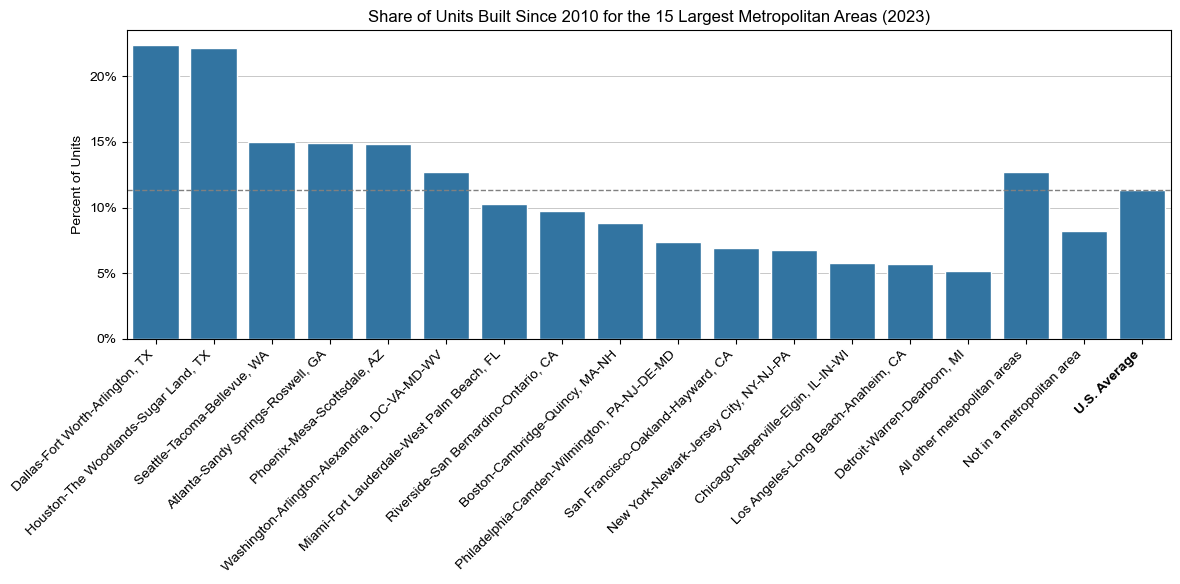

In [47]:
#Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(style="whitegrid")

sns.barplot(
    data=new_constrct_df,
    x="METRO", y="built_since_2010",
    estimator="mean", weights="WEIGHT",
    order=order, ax=ax,
    errorbar=None
)

# Loop through xtick labels and bold the one you want
for label in ax.get_xticklabels():
    if label.get_text() == "U.S. Average":
        label.set_fontweight('bold')

#Add dashed line across chart
ax.axhline(us_share, linestyle="--", color="grey", linewidth=1) #label=f"U.S. avg = {us_share:.1%}"

#Formatting
ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

# Add horizontal gridlines at each tick
ax.yaxis.grid(True, which="major", linestyle="-", linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True) 

ax.set_xlabel("")
ax.set_ylabel("Percent of Units")
ax.set_title("Share of Units Built Since 2010 for the 15 Largest Metropolitan Areas (2023)")
#ax.legend()
plt.xticks(rotation=45, ha="right")

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/weighted_share_units_built_since_2010_2.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [48]:
#Pivot table describing weighted shares of units built since 2010 for each metropolitan area
new_constrct_pt = (
    new_construction_df.pivot_table(
        index="METRO",
        values="built_since_2010",
        aggfunc=lambda x: np.average(x, weights=new_construction_df.loc[x.index, "WEIGHT"]),
        margins=True,                 # add "overall" row
        margins_name="U.S. Average"   # name the "overall" row as U.S. Average
    )
    .rename(columns={"built_since_2010": "share_built_since_2010"})
)

#Decending order
new_constrct_pt = new_constrct_pt.sort_values("share_built_since_2010", ascending=False)

In [49]:
#View
new_constrct_pt

share_built_since_2010
METRO                                                               
Dallas-Fort Worth-Arlington, TX                             0.223757
Houston-The Woodlands-Sugar Land, TX                        0.221898
Seattle-Tacoma-Bellevue, WA                                 0.149772
Atlanta-Sandy Springs-Roswell, GA                           0.149432
Phoenix-Mesa-Scottsdale, AZ                                 0.148442
Washington-Arlington-Alexandria, DC-VA-MD-WV                0.127115
All other metropolitan areas                                0.127018
U.S. Average                                                0.113500
Miami-Fort Lauderdale-West Palm Beach, FL                   0.102359
Riverside-San Bernardino-Ontario, CA                        0.097402
Boston-Cambridge-Quincy, MA-NH                              0.088306
Not in a metropolitan area                                  0.081919
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD                 0.073859
San Francisco-Oakland-Hayward, CA                           0.069371
New York-Newark-Jersey City, NY-NJ-PA                       0.067926
Chicago-Naperville-Elgin, IL-IN-WI                          0.057543
Los Angeles-Long Beach-Anaheim, CA                          0.056914
Detroit-Warren-Dearborn, MI                                 0.051347

## 2. What does the new rental and ownership stock look like compared to building patterns in previous decades?
    - What are the sizes of newer units vs older units (e.g. number of bedrooms)?
    - What building types are more common in the newer vs older housing stock (e.g. number of units per building)? 
    - What were the rent levels across the housing stock in 2023?
    - How have median rents changed throughout the housing stock from 2015 - 2023?

In [50]:
#Only filter to metropolitan areas/CBSAs in "supply cohort"
supply_cbsa = set(supply_cbsa_mapping())  

#Copy of DataFrame for analysis
new_occupied_stock_df = metro_ami_panel_df.loc[
    (metro_ami_panel_df['SRVYEAR'] == 2023) & # limiting to 2023 AHS data
    (metro_ami_panel_df['TENURE'] != '-6') & # omitting vacant units from this DataFrame/analysis
    (metro_ami_panel_df['OMB13CBSA'].isin(supply_cbsa))
].copy()

len(new_occupied_stock_df)

10536

**Note**: The 2023 AHS DataFrame has 600 less observations because "units occupied w/o payment of rent" from the `'TENURE'` variable were dropped.
- Total observations with occupied units: 55,069
- Total observations with vacat units: 7,142

### 2(a). What is the size of newer vs older housing units? Has there been a shift in the number of bedrooms per unit based on when the unit was built?

In [51]:
#Setting bedroom size for plotting and 
bedroom_order = ['0','1','2','3','4+']

new_occupied_stock_df['BEDROOMS_GROUP'] = pd.Categorical(
    new_occupied_stock_df['BEDROOMS']
        .clip(upper=4)          # top-code at 4
        .astype(int)            # convert to ints
        .astype(str)            # '0','1','2','3','4'
        .replace({'4': '4+'}),  # relabel 4 -> '4+'
    categories=bedroom_order,
    ordered=True
)

In [52]:
#Creating the labels for 'YRBUILT'
yr_labels = ['1979 or earlier', '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - 2023']

#Defining bins
new_occupied_stock_df['YRBUILT_BIN'] = pd.cut(
    new_occupied_stock_df['YRBUILT'],
    bins=[-np.inf, 1979, 1989, 1999, 2009, 2023],
    labels=yr_labels,
    include_lowest=True, right=True
)

In [53]:
new_occupied_stock_df['YRBUILT_BIN'] = new_occupied_stock_df['YRBUILT_BIN'].astype(pd.CategoricalDtype
                                                                                   (yr_labels, ordered=True))

In [54]:
#Summing weights by TENURE x YRBUILT_BIN x BEDROOMS_GROUP
g = (new_occupied_stock_df
     .groupby(['TENURE', 'YRBUILT_BIN', 'BEDROOMS_GROUP'], 
              observed=True)['WEIGHT']
     .sum())

In [55]:
#Setting up one table per 'TENURE', preserving full index/column order
full_index = pd.MultiIndex.from_product([['1', '2'], yr_labels], names=['TENURE', 'YRBUILT_BIN'])
wide = (g.unstack('BEDROOMS_GROUP')
          .reindex(index=full_index, columns=bedroom_order)
          .fillna(0))

In [56]:
#Viewing weighted counts by 'TENURE', 'YRBUILT_BIN', 'BEDROOMS_GROUP'
print(wide.to_string(float_format='{:,.0f}'.format))

BEDROOMS_GROUP              0       1       2         3        4+
TENURE YRBUILT_BIN                                               
1      1979 or earlier  1,595  78,177 410,994 1,428,498   990,551
       1980 - 1989          0  32,687 180,168   658,403   430,671
       1990 - 1999      1,862  12,579 101,744   567,659   664,868
       2000 - 2009        646  23,097 141,570   687,217 1,063,662
       2010 - 2023      1,766  12,502  94,563   508,418   864,525
2      1979 or earlier 30,790 476,269 637,084   374,749   148,234
       1980 - 1989      7,497 311,542 347,839   189,163    54,175
       1990 - 1999      1,315 201,988 259,063   146,484    61,786
       2000 - 2009      8,248 253,925 296,005   212,687   128,205
       2010 - 2023     30,728 397,200 308,524   150,029    77,577


In [57]:
#Calculating/setting row-wise percentages
owner_pct  = wide.loc['1'].div(wide.loc['1'].sum(axis=1), axis=0).mul(100)
renter_pct = wide.loc['2'].div(wide.loc['2'].sum(axis=1), axis=0).mul(100)

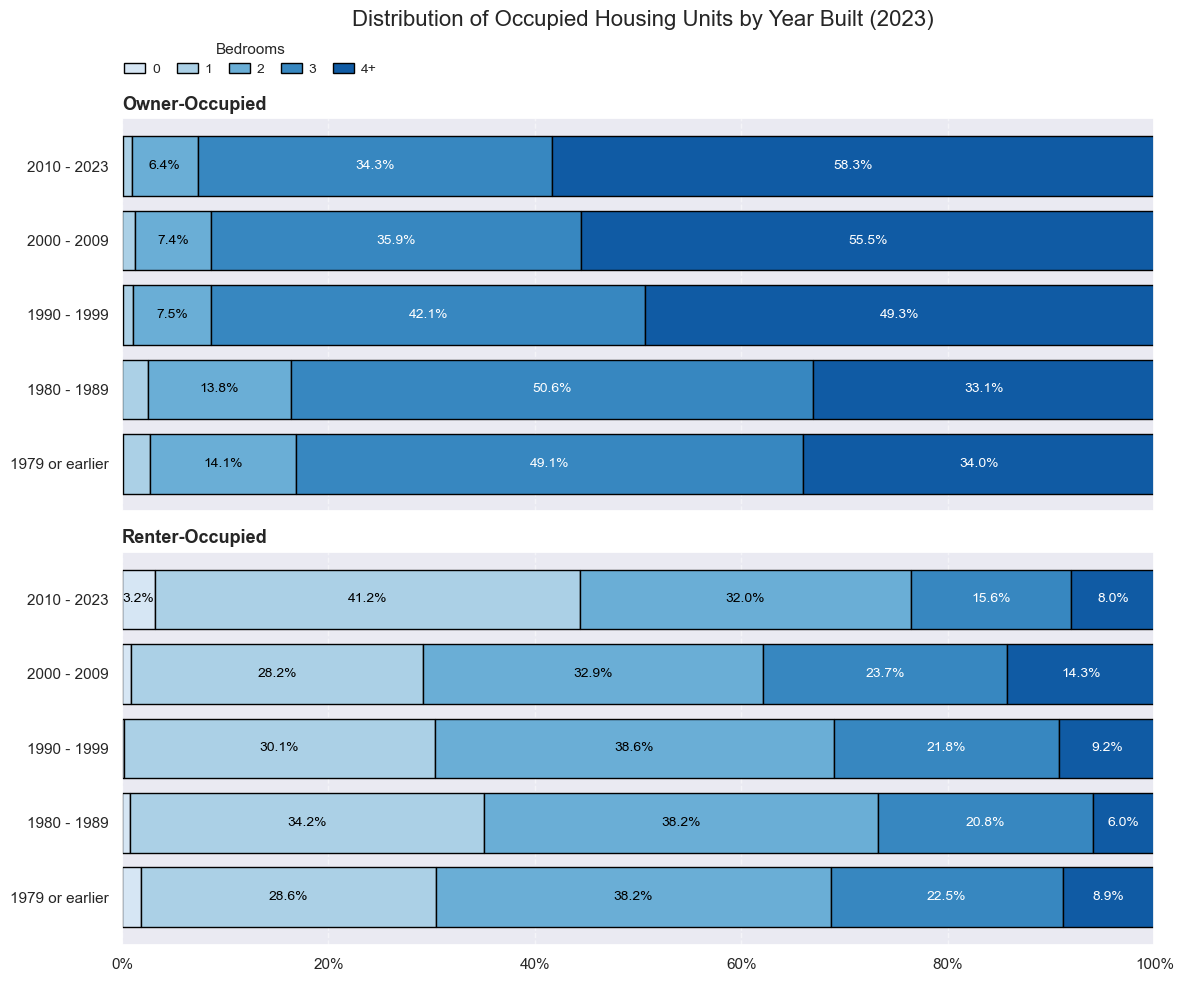

In [58]:
sns.set_theme()
colors = sns.color_palette('Blues', n_colors=len(bedroom_order))

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.subplots_adjust(hspace=0.3)

for i, (ax, data, title) in enumerate(zip(
    axes,
    [owner_pct[bedroom_order], renter_pct[bedroom_order]],
    ['Owner-Occupied', 'Renter-Occupied']
)):
    widths = data.to_numpy(dtype=float)
    n_rows, n_cats = widths.shape
    y_idx = np.arange(n_rows)
    lefts = np.concatenate([np.zeros((n_rows, 1)), widths.cumsum(axis=1)[:, :-1]], axis=1)

    for j in range(n_cats):
        cont = ax.barh(
            y=y_idx,
            width=widths[:, j],
            left=lefts[:, j],
            color=colors[j],
            edgecolor='black',                                  # <-- fixed
            label=bedroom_order[j] if i == 0 else None          # legend from first panel
        )
        show = widths[:, j] > 3
        labels = np.where(show, np.char.mod('%.1f%%', widths[:, j]), '')
        ax.bar_label(
            cont, labels=labels, label_type='center', fontsize=10,
            color=('black' if bedroom_order[j] in ['0','1','2'] else 'white')
        )

    ax.set_yticks(y_idx)
    ax.set_yticklabels(data.index)
    ax.set_title(title, fontsize=13, fontweight='bold', loc='left')
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xlim(0, 100)
    ax.xaxis.set_major_formatter(PercentFormatter(100))  # or mtick.PercentFormatter(100)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Bedrooms",
    loc='upper left', bbox_to_anchor=(0.10, 0.96),
    ncol=len(bedroom_order), frameon=False,
    fontsize=10, title_fontsize=11, handlelength=1.5, handletextpad=0.5, columnspacing=1.2
)

plt.suptitle("Distribution of Occupied Housing Units by Year Built (2023)", fontsize=16, x=0.30, ha='left')

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/unit_size_overtime_2.png', dpi=600, bbox_inches='tight')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [59]:
#Viewing owner_pct DataFrame
owner_pct

BEDROOMS_GROUP          0         1          2          3         4+
YRBUILT_BIN                                                         
1979 or earlier  0.054801  2.686672  14.124406  49.092404  34.041717
1980 - 1989      0.000000  2.510676  13.838506  50.571358  33.079460
1990 - 1999      0.138062  0.932647   7.543766  42.088979  49.296546
2000 - 2009      0.033703  1.205354   7.388078  35.863686  55.509179
2010 - 2023      0.119148  0.843731   6.381760  34.311457  58.343904

In [60]:
#Viewing renter_pct DataFrame
renter_pct

BEDROOMS_GROUP          0          1          2          3         4+
YRBUILT_BIN                                                          
1979 or earlier  1.846918  28.568264  38.214490  22.478716   8.891612
1980 - 1989      0.823656  34.227260  38.214985  20.782241   5.951858
1990 - 1999      0.196013  30.118898  38.629464  21.842552   9.213072
2000 - 2009      0.917415  28.243121  32.923461  23.656303  14.259700
2010 - 2023      3.187330  41.200837  32.002664  15.562229   8.046940

### 2(b). What size is the new housing stock? Is the newer supply of units in large or smaller buildings?
- What building types are more common in the newer vs older housing stock (e.g. number of units per building)? 

In [61]:
#Mapping 'BLD' to bins 
bld_map = {
    '1': 'Mobile Home or Trailer, RV, Van, etc.',
    '2': 'One-Family House',
    '3': 'One-Family House',
    '4': '2 - 4 Units',
    '5': '2 - 4 Units',
    '6': '5 - 9 Units',
    '7': '10 - 49 Units',
    '8': '10 - 49 Units',
    '9': '50+ Units',
    '10': 'Mobile Home or Trailer, RV, Van, etc.'
}

#Setting ordered categorical
bld_order = [
    'One-Family House',
    '2 - 4 Units',
    '5 - 9 Units',
    '10 - 49 Units',
    '50+ Units',
    'Mobile Home or Trailer, RV, Van, etc.'
]

new_occupied_stock_df['BLD_BINNED'] = pd.Categorical(
    new_occupied_stock_df['BLD'].astype(str).map(bld_map),
    categories=bld_order,
    ordered=True
)

In [62]:
#Aggregating weights for owner-occupied and renter-occupied
g_bld = (new_occupied_stock_df
         .groupby(['TENURE','YRBUILT_BIN','BLD_BINNED'], observed=True)['WEIGHT']
         .sum())

In [63]:
#Complete grid of rows, then pivot to wide similar to 'BEDROOM' analysis
row_index = pd.MultiIndex.from_product(
    [['1','2'], new_occupied_stock_df['YRBUILT_BIN'].cat.categories],
    names=['TENURE','YRBUILT_BIN']
)
wide_bld = (g_bld.unstack('BLD_BINNED')
            .reindex(index=row_index, columns=bld_order, fill_value=0))

In [64]:
#Viewing weighted counts by 'TENURE', 'YRBUILT_BIN', 'BLD_BINNED'
print(wide_bld.to_string(float_format='{:,.0f}'.format))

BLD_BINNED              One-Family House  2 - 4 Units  5 - 9 Units  10 - 49 Units  50+ Units  Mobile Home or Trailer, RV, Van, etc.
TENURE YRBUILT_BIN                                                                                                                 
1      1979 or earlier         2,690,772       31,647       23,722         45,745     39,432                                 78,497
       1980 - 1989             1,157,276       15,138       18,226         29,954     20,632                                 60,703
       1990 - 1999             1,244,400       10,405        7,650         17,535      5,638                                 63,083
       2000 - 2009             1,775,381       11,356        7,592         22,450     43,227                                 56,186
       2010 - 2023             1,399,256        8,638        4,438         10,172      6,034                                 53,236
2      1979 or earlier           658,087      191,813      187,314        41

In [65]:
#Calculating row-wise percentages per tenure
owner_bld_pct  = wide_bld.loc['1'].div(wide_bld.loc['1'].sum(axis=1), axis=0).mul(100)
renter_bld_pct = wide_bld.loc['2'].div(wide_bld.loc['2'].sum(axis=1), axis=0).mul(100)

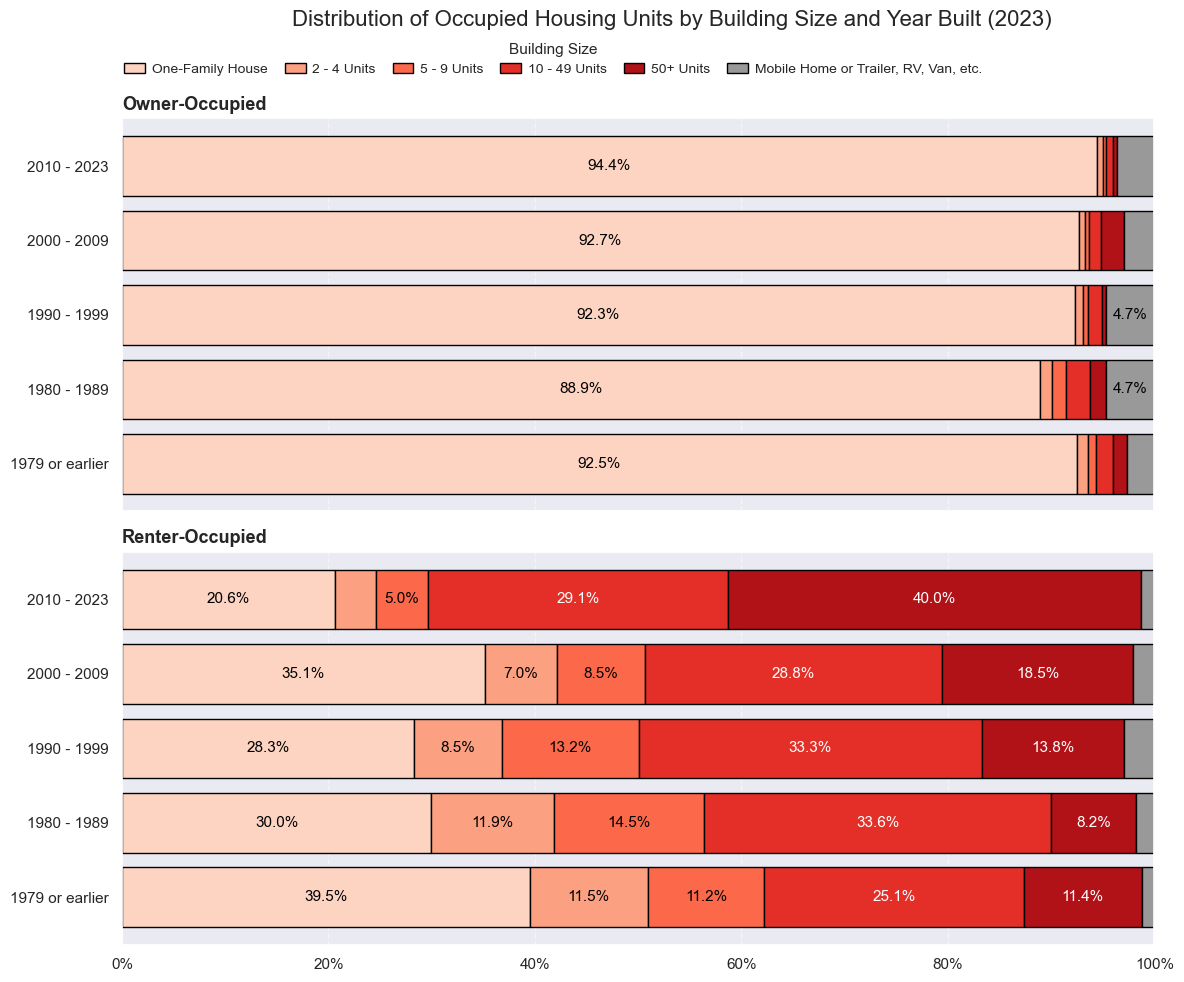

In [66]:
# --- 3) Plot: stacked horizontal bars (vectorized) ---
sns.set_theme()
colors = sns.color_palette("Reds", n_colors=len(bld_order)-1) + [(0.6, 0.6, 0.6)]  # gray for last
label_colors = ['black','black','black','white','white','black']  # per segment

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.subplots_adjust(hspace=0.3)

for ax, data, title in zip(
    axes,
    [owner_bld_pct, renter_bld_pct],
    ["Owner-Occupied", "Renter-Occupied"]
):
    data = data[bld_order]  # ensure consistent column order

    widths = data.to_numpy(dtype=float)     # shape (n_rows, n_cats)
    n_rows, n_cats = widths.shape
    y_idx = np.arange(n_rows)

    lefts = np.concatenate([np.zeros((n_rows, 1)), widths.cumsum(axis=1)[:, :-1]], axis=1)

    #Drawing one container per segment; label with bar_label (vectorized per segment)
    containers = []
    for j in range(n_cats):
        cont = ax.barh(
            y=y_idx,
            width=widths[:, j],
            left=lefts[:, j],
            color=colors[j],
            edgecolor='black',
            label=bld_order[j] if ax is axes[0] else None
        )
        containers.append(cont)

        #Show labels only if value > 4%
        show = widths[:, j] > 4
        labels = np.where(show, np.char.mod('%.1f%%', widths[:, j]), '')
        ax.bar_label(cont, labels=labels, label_type='center', fontsize=11, color=label_colors[j])

    #Axes formatting
    ax.set_yticks(y_idx)
    ax.set_yticklabels(data.index)  # YRBUILT_BIN labels
    ax.set_title(title, fontsize=13, fontweight='bold', loc='left')
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xlim(0, 100)
    ax.xaxis.set_major_formatter(PercentFormatter(100))
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

#Legend 
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Building Size',
    loc='upper left', bbox_to_anchor=(0.10, 0.96),
    ncol=len(labels), frameon=False,
    fontsize=10, title_fontsize=11,
    handlelength=1.5, handletextpad=0.5, columnspacing=1.2
)

plt.suptitle("Distribution of Occupied Housing Units by Building Size and Year Built (2023)",
             fontsize=16, x=0.25, ha='left')

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/bld_size_overtime_2.png', dpi=600, bbox_inches='tight')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [67]:
#Looking at the underlying data
owner_bld_pct

BLD_BINNED       One-Family House  2 - 4 Units  5 - 9 Units  10 - 49 Units  \
YRBUILT_BIN                                                                  
1979 or earlier         92.472296     1.087583     0.815245       1.572098   
1980 - 1989             88.889288     1.162721     1.399958       2.300713   
1990 - 1999             92.265883     0.771448     0.567197       1.300162   
2000 - 2009             92.651584     0.592616     0.396188       1.171570   
2010 - 2023             94.431169     0.582917     0.299482       0.686445   

BLD_BINNED       50+ Units  Mobile Home or Trailer, RV, Van, etc.  
YRBUILT_BIN                                                        
1979 or earlier   1.355121                               2.697657  
1980 - 1989       1.584747                               4.662572  
1990 - 1999       0.418056                               4.677254  
2000 - 2009       2.255862                               2.932179  
2010 - 2023       0.407241                               3.592746

In [68]:
#Looking at the underlying data
renter_bld_pct

BLD_BINNED       One-Family House  2 - 4 Units  5 - 9 Units  10 - 49 Units  \
YRBUILT_BIN                                                                  
1979 or earlier         39.474286    11.505578    11.235757      25.119670   
1980 - 1989             29.965074    11.865270    14.548124      33.612352   
1990 - 1999             28.295110     8.535218    13.205554      33.269335   
2000 - 2009             35.130896     6.998450     8.509733      28.778522   
2010 - 2023             20.618611     3.973994     5.044015      29.090310   

BLD_BINNED       50+ Units  Mobile Home or Trailer, RV, Van, etc.  
YRBUILT_BIN                                                        
1979 or earlier  11.423450                               1.241259  
1980 - 1989       8.195727                               1.813452  
1990 - 1999      13.771376                               2.923408  
2000 - 2009      18.540716                               2.041682  
2010 - 2023      39.958721                               1.314349

### 2(c). What were the rent levels across the housing stock in 2023?

In [69]:
#Isolating renter-occupied units from `new_occupied_stock_df`
renter_occ_df = new_occupied_stock_df.loc[(new_occupied_stock_df['TENURE'] == '2')].copy()
len(renter_occ_df)

3880

In [70]:
#Checking if there are any 0 'RENT' values
renter_occ_df.loc[(renter_occ_df['RENT'] == 0)].value_counts()

Series([], Name: count, dtype: int64)

In [71]:
#Checking if there are any negative 'RENT' values
renter_occ_df.loc[(renter_occ_df['RENT'] < 0)].value_counts()

Series([], Name: count, dtype: int64)

In [72]:
#Checking if there are any '-6' or -6 'RENT' values
renter_occ_df.loc[(renter_occ_df['RENT'] == '-6')].value_counts()

Series([], Name: count, dtype: int64)

In [73]:
#Checking if there are any '-6' or -6 'RENT' values
renter_occ_df.loc[(renter_occ_df['RENT'] == -6)].value_counts()

Series([], Name: count, dtype: int64)

In [74]:
#Checking if there are any Null values
renter_occ_df['RENT'].isna().value_counts()

RENT
False    3880
Name: count, dtype: int64

**Note:** There are no observations where `'RENT' == 0`, `'RENT' < 0`, `'RENT' == -6`, or `'NaN'` for units oocupied by a renter household in the `renter_occ_df`. 

In [75]:
metro_order = [
    "Atlanta-Sandy Springs-Roswell, GA",
    "Dallas-Fort Worth-Arlington, TX",
    "Houston-The Woodlands-Sugar Land, TX",
    "Phoenix-Mesa-Scottsdale, AZ",
    "Seattle-Tacoma-Bellevue, WA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV"
]

In [76]:
#Set style and color palette
sns.set(style='whitegrid')
palette = sns.color_palette('tab10', as_cmap=True)

In [77]:
#Set style and color palette
sns.set(style='whitegrid')
palette = sns.color_palette('tab10', as_cmap=True)

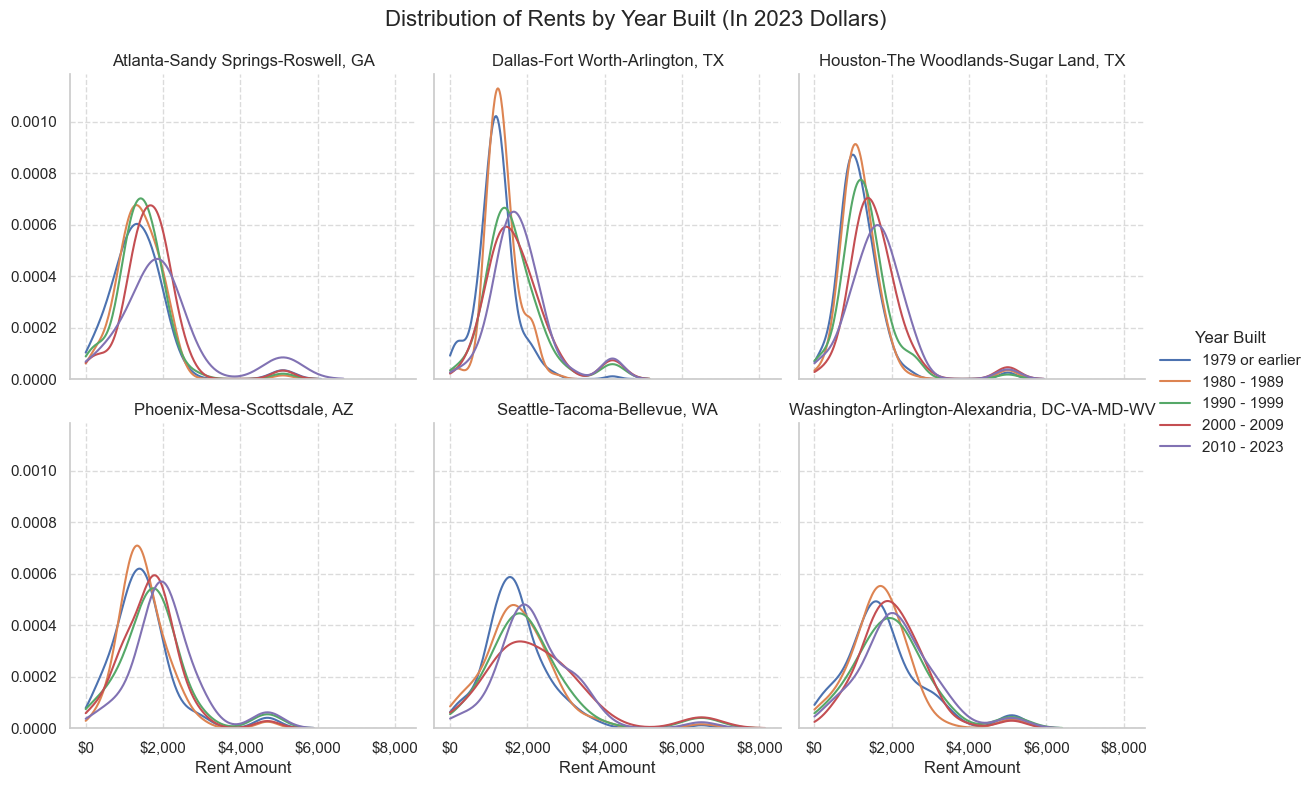

In [78]:
#Create FacetGrid with hue='YRBUILT_BIN'
g = sns.FacetGrid(
    renter_occ_df, 
    col='METRO', 
    col_wrap=3, 
    height=4, 
    sharex=True, 
    sharey=True, 
    hue='YRBUILT_BIN',
    col_order=metro_order
)

#Plot directly using vectorized hue groups
g.map_dataframe(
    sns.kdeplot,
    x='RENT',
    weights='WEIGHT',
    fill=False,
    common_norm=False,
    alpha=1,
    linewidth=1.5,
    clip=(0, None)
)

# Format each subplot
for ax in g.axes.flatten():
    # Dollar formatting for x-axis
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    # Dashed grid
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)

#Labeling
g.add_legend(title="Year Built")
g.set_axis_labels("Rent Amount", "")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Rents by Year Built (In 2023 Dollars)", fontsize=16)

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/weighted_rent_distribution_2023_2.png', dpi=300, bbox_inches='tight')

plt.show()

#### Creating functions to view weighted summary statistics

In [79]:
#Compute weighted median rents by groups
def weighted_median(df, group_cols, value_col, weight_col):
    d = df.loc[
        df[value_col].notna() & df[weight_col].notna() & (df[weight_col] > 0),
        group_cols + [value_col, weight_col]
    ].copy()
    d = d.sort_values(group_cols + [value_col], kind='mergesort')

    g = d.groupby(group_cols, observed=True)
    d['w_cum'] = g[weight_col].cumsum()
    cutoff = 0.5 * g[weight_col].transform('sum')

    # first index in each group where cum weight >= 50%
    idx = (d['w_cum'] >= cutoff).groupby([d[c] for c in group_cols], observed=True).idxmax()

    return (d.loc[idx, group_cols + [value_col]]
              .rename(columns={value_col: 'weighted_median'})
              .reset_index(drop=True))

In [80]:
medians_yr_built = weighted_median(
    renter_occ_df, 
    group_cols=['YRBUILT_BIN','METRO'],
    value_col='RENT',        
    weight_col='WEIGHT'
)

In [81]:
#Viewing DataFrame as pivot table
median_rent_pivot = medians_yr_built.pivot(
    index="YRBUILT_BIN", columns="METRO", values="weighted_median"
)

In [82]:
median_rent_pivot

METRO            Atlanta-Sandy Springs-Roswell, GA  \
YRBUILT_BIN                                          
1979 or earlier                               1300   
1980 - 1989                                   1400   
1990 - 1999                                   1500   
2000 - 2009                                   1600   
2010 - 2023                                   1900   

METRO            Dallas-Fort Worth-Arlington, TX  \
YRBUILT_BIN                                        
1979 or earlier                             1200   
1980 - 1989                                 1300   
1990 - 1999                                 1500   
2000 - 2009                                 1600   
2010 - 2023                                 1800   

METRO            Houston-The Woodlands-Sugar Land, TX  \
YRBUILT_BIN                                             
1979 or earlier                                  1100   
1980 - 1989                                      1100   
1990 - 1999                                      1200   
2000 - 2009                                      1500   
2010 - 2023                                      1600   

METRO            Phoenix-Mesa-Scottsdale, AZ  Seattle-Tacoma-Bellevue, WA  \
YRBUILT_BIN                                                                 
1979 or earlier                         1400                         1600   
1980 - 1989                             1400                         1700   
1990 - 1999                             1700                         1900   
2000 - 2009                             1700                         2000   
2010 - 2023                             2000                         2100   

METRO            Washington-Arlington-Alexandria, DC-VA-MD-WV  
YRBUILT_BIN                                                    
1979 or earlier                                          1700  
1980 - 1989                                              1700  
1990 - 1999                                              1900  
2000 - 2009                                              2000  
2010 - 2023                                              2000

In [83]:
#Using `weighted_mean_by_group' defined earlier in notebook to view weighted average rents for this DataFrame
avg_yr_built = weighted_mean_by_group(renter_occ_df, ['YRBUILT_BIN','METRO'], 'RENT')

In [84]:
#Viewing DataFrame as pivot table
avg_rent_pivot = avg_yr_built.pivot(
    index="YRBUILT_BIN", columns="METRO", values="RENT_weighted_mean"
)

In [85]:
avg_rent_pivot

METRO            Atlanta-Sandy Springs-Roswell, GA  \
YRBUILT_BIN                                          
1979 or earlier                        1369.651719   
1980 - 1989                            1399.904174   
1990 - 1999                            1439.277274   
2000 - 2009                            1664.553368   
2010 - 2023                            2049.091049   

METRO            Dallas-Fort Worth-Arlington, TX  \
YRBUILT_BIN                                        
1979 or earlier                      1196.177605   
1980 - 1989                          1339.958874   
1990 - 1999                          1651.704428   
2000 - 2009                          1737.826649   
2010 - 2023                          1834.923203   

METRO            Houston-The Woodlands-Sugar Land, TX  \
YRBUILT_BIN                                             
1979 or earlier                           1157.726322   
1980 - 1989                               1226.741852   
1990 - 1999                               1315.308749   
2000 - 2009                               1611.044022   
2010 - 2023                               1650.376500   

METRO            Phoenix-Mesa-Scottsdale, AZ  Seattle-Tacoma-Bellevue, WA  \
YRBUILT_BIN                                                                 
1979 or earlier                  1473.925582                  1707.500103   
1980 - 1989                      1509.311540                  1779.555532   
1990 - 1999                      1774.629180                  2072.874836   
2000 - 2009                      1666.148296                  2284.922101   
2010 - 2023                      2079.548087                  2228.047244   

METRO            Washington-Arlington-Alexandria, DC-VA-MD-WV  
YRBUILT_BIN                                                    
1979 or earlier                                   1812.979801  
1980 - 1989                                       1736.638812  
1990 - 1999                                       2040.813687  
2000 - 2009                                       2034.968433  
2010 - 2023                                       2160.405712

In [86]:
#Creating a function to view weighted percentages/shares 
def weighted_rent_pcts_and_shares(
    df,
    value_col="RENT",
    weight_col="WEIGHT",
    group_cols=None,
    bins=(0, 1000, 2000, 3000, 4000, 6000, np.inf),
    labels=("<1k", "1–2k", "2–3k", "3–4k", "4–6k", "6k+"),
    share_decimals=2
):
    """
      - weighted p25/p75/p90 (step quantiles; first value with CDF >= q)
      - weighted shares in bins (rows sum to 100 within each group)
    Drops rows with NaN/nonpositive weights.
    """
    if group_cols is None:
        group_cols = []
    #Dummy group to unify single/all-group code paths
    d = df[[*(group_cols), value_col, weight_col]].dropna().copy()
    d = d[d[weight_col] > 0]
    if not group_cols:
        d["_g"] = 0
        group_cols2 = ["_g"]
    else:
        group_cols2 = group_cols

    #Weighted quantiles
    #Sort within groups by value
    d = d.sort_values(group_cols2 + [value_col], kind="mergesort")
    g = d.groupby(group_cols2, observed=True)

    #Normalized cumulative weights per group
    wsum = g[weight_col].transform("sum")
    d["cdf"] = g[weight_col].cumsum() / wsum

    def pick_q(q, name):
        mask = d["cdf"] >= q
        # idxmax on booleans returns first True index per group
        idx = mask.groupby([d[c] for c in group_cols2], observed=True).idxmax()
        out = d.loc[idx, group_cols2 + [value_col]].copy()
        out = out.rename(columns={value_col: name})
        return out.set_index(group_cols2)

    q25 = pick_q(0.25, "p25")
    q75 = pick_q(0.75, "p75")
    q90 = pick_q(0.90, "p90")

    quants = q25.join([q75, q90]).reset_index()

    #Weighted shares in bins
    db = d[[*(group_cols2), value_col, weight_col]].copy()
    db["bin"] = pd.cut(db[value_col], bins=bins, labels=labels, include_lowest=True, right=True)

    w_by = db.groupby(group_cols2 + ["bin"], observed=True)[weight_col].sum()
    den  = w_by.groupby(level=tuple(range(len(group_cols2))), observed=True).transform("sum")
    share = (w_by / den).rename("share")

    share_wide = (share.unstack("bin")
                       .reindex(columns=labels)   # enforce bin order
                       .fillna(0.0)
                       .mul(100)
                       .rename(columns={lab: f"share_{lab}" for lab in labels})
                       .reset_index())

    #Assembling
    out = quants.merge(share_wide, on=group_cols2, how="left")
    if not group_cols:
        out = out.drop(columns=["_g"])
    share_cols = [c for c in out.columns if c.startswith("share_")]
    out[share_cols] = out[share_cols].round(share_decimals)
    return out

In [87]:
weight_stats = weighted_rent_pcts_and_shares(
    df=renter_occ_df,
    value_col="RENT",
    weight_col="WEIGHT",
    group_cols=["METRO","YRBUILT_BIN"],  
    bins=(0,1000,2000,3000,4000,6000,np.inf),
    labels=("<1k","1–2k","2–3k","3–4k","4–6k","6k+"),
    share_decimals=2
)
weight_stats

METRO      YRBUILT_BIN   p25   p75  \
0              Atlanta-Sandy Springs-Roswell, GA  1979 or earlier   900  1700   
1              Atlanta-Sandy Springs-Roswell, GA      1980 - 1989  1000  1800   
2              Atlanta-Sandy Springs-Roswell, GA      1990 - 1999  1100  1800   
3              Atlanta-Sandy Springs-Roswell, GA      2000 - 2009  1300  2000   
4              Atlanta-Sandy Springs-Roswell, GA      2010 - 2023  1400  2200   
5                Dallas-Fort Worth-Arlington, TX  1979 or earlier   950  1400   
6                Dallas-Fort Worth-Arlington, TX      1980 - 1989  1100  1500   
7                Dallas-Fort Worth-Arlington, TX      1990 - 1999  1200  1900   
8                Dallas-Fort Worth-Arlington, TX      2000 - 2009  1200  2100   
9                Dallas-Fort Worth-Arlington, TX      2010 - 2023  1400  2100   
10          Houston-The Woodlands-Sugar Land, TX  1979 or earlier   820  1400   
11          Houston-The Woodlands-Sugar Land, TX      1980 - 1989   900  1400   
12          Houston-The Woodlands-Sugar Land, TX      1990 - 1999  1000  1500   
13          Houston-The Woodlands-Sugar Land, TX      2000 - 2009  1200  1900   
14          Houston-The Woodlands-Sugar Land, TX      2010 - 2023  1200  2000   
15                   Phoenix-Mesa-Scottsdale, AZ  1979 or earlier  1000  1700   
16                   Phoenix-Mesa-Scottsdale, AZ      1980 - 1989  1100  1800   
17                   Phoenix-Mesa-Scottsdale, AZ      1990 - 1999  1300  2100   
18                   Phoenix-Mesa-Scottsdale, AZ      2000 - 2009  1100  2000   
19                   Phoenix-Mesa-Scottsdale, AZ      2010 - 2023  1600  2300   
20                   Seattle-Tacoma-Bellevue, WA  1979 or earlier  1200  2100   
21                   Seattle-Tacoma-Bellevue, WA      1980 - 1989  1300  2300   
22                   Seattle-Tacoma-Bellevue, WA      1990 - 1999  1500  2300   
23                   Seattle-Tacoma-Bellevue, WA      2000 - 2009  1400  2800   
24                   Seattle-Tacoma-Bellevue, WA      2010 - 2023  1700  2700   
25  Washington-Arlington-Alexandria, DC-VA-MD-WV  1979 or earlier  1200  2200   
26  Washington-Arlington-Alexandria, DC-VA-MD-WV      1980 - 1989  1300  2200   
27  Washington-Arlington-Alexandria, DC-VA-MD-WV      1990 - 1999  1500  2400   
28  Washington-Arlington-Alexandria, DC-VA-MD-WV      2000 - 2009  1500  2500   
29  Washington-Arlington-Alexandria, DC-VA-MD-WV      2010 - 2023  1600  2700   

     p90  share_<1k  share_1–2k  share_2–3k  share_3–4k  share_4–6k  share_6k+  
0   2000      30.27       62.22        4.84        0.00        2.66       0.00  
1   2000      27.53       62.68        8.92        0.00        0.88       0.00  
2   2000      22.74       68.61        7.10        0.00        1.55       0.00  
3   2300      13.75       69.67       14.18        0.00        2.41       0.00  
4   5100      15.41       54.35       19.15        0.00       11.09       0.00  
5   1700      34.47       60.17        4.88        0.00        0.47       0.00  
6   2000      21.99       69.55        8.46        0.00        0.00       0.00  
7   2400      14.77       64.18       16.43        0.00        4.62       0.00  
8   2600      13.77       60.08       20.40        0.00        5.74       0.00  
9   2600       9.34       64.77       18.93        1.09        5.88       0.00  
10  1800      49.61       46.62        2.42        0.00        1.35       0.00  
11  1700      43.88       53.20        0.73        0.00        2.18       0.00  
12  2000      34.89       57.90        5.98        0.00        1.23       0.00  
13  2400      15.95       69.81       10.80        0.00        3.44       0.00  
14  2500      21.03       57.79       18.27        0.00        2.91       0.00  
15  2200      26.36       60.98        9.48        0.00        3.18       0.00  
16  2200      22.05       62.34       13.93        0.00        1.69       0.00  
17  2800      20.13       47.37       27.25        0.00        5.26      

### 2(d). How have median rents changed throughout the housing stock from 2015 - 2023?

In [88]:
#New Dataframe to compare changes in median rents overtime

#Apply mapping of Metro Area
cbsa_map = supply_cbsa_mapping()

#Filter data to included CBSAs only
median_rent_change_df = metro_ami_panel_df[
    (metro_ami_panel_df['OMB13CBSA'].isin(cbsa_map.keys())) &
    (metro_ami_panel_df['TENURE'] == '2')].copy()

len(median_rent_change_df)

23791

In [89]:
#New YRBUILT_BIN varibale for DataFrame
#Creating the labels for 'YRBUILT'
yr_labels = ['1979 or earlier', '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - 2023']

#Defining bins
median_rent_change_df['YRBUILT_BIN'] = pd.cut(
    median_rent_change_df['YRBUILT'],
    bins=[-np.inf, 1979, 1989, 1999, 2009, 2023],
    labels=yr_labels,
    include_lowest=True, right=True
)

In [90]:
median_rent_change_df['YRBUILT_BIN'] = median_rent_change_df['YRBUILT_BIN'].astype(pd.CategoricalDtype
                                                                                   (yr_labels, ordered=True))

In [91]:
#Using weighted median function from above
median_rent_chng_yr_built = weighted_median(
    median_rent_change_df, 
    group_cols=['SRVYEAR','YRBUILT_BIN','METRO'],
    value_col='RENT_INFLTN_ADJ',        
    weight_col='WEIGHT'
)

In [92]:
#Viewing DataFrame as pivot table
median_rent_chng_yr_built_pt = median_rent_chng_yr_built.pivot(
    index='YRBUILT_BIN', columns=['SRVYEAR','METRO'], values='weighted_median'
)

In [93]:
#Temporarily expanding to max columns for viewing
with pd.option_context('display.float_format', '{:,.0f}'.format, 'display.max_columns', None):
    display(median_rent_chng_yr_built_pt)

SRVYEAR                                      2015  \
METRO           Atlanta-Sandy Springs-Roswell, GA   
YRBUILT_BIN                                         
1979 or earlier                              1169   
1980 - 1989                                  1386   
1990 - 1999                                  1503   
2000 - 2009                                  1503   
2010 - 2023                                  1503   

SRVYEAR                                          \
METRO           Dallas-Fort Worth-Arlington, TX   
YRBUILT_BIN                                       
1979 or earlier                            1126   
1980 - 1989                                1204   
1990 - 1999                                1329   
2000 - 2009                                1564   
2010 - 2023                                1720   

SRVYEAR                                               \
METRO           Houston-The Woodlands-Sugar Land, TX   
YRBUILT_BIN                                            
1979 or earlier                                  943   
1980 - 1989                                     1064   
1990 - 1999                                     1078   
2000 - 2009                                     1347   
2010 - 2023                                     1078   

SRVYEAR                                                                  \
METRO           Phoenix-Mesa-Scottsdale, AZ Seattle-Tacoma-Bellevue, WA   
YRBUILT_BIN                                                               
1979 or earlier                        1265                        1523   
1980 - 1989                            1446                        1676   
1990 - 1999                            1626                        1828   
2000 - 2009                            1807                        2133   
2010 - 2023                            2169                        2285   

SRVYEAR                                                       \
METRO           Washington-Arlington-Alexandria, DC-VA-MD-WV   
YRBUILT_BIN                                                    
1979 or earlier                                         1575   
1980 - 1989                                             1696   
1990 - 1999                                             1575   
2000 - 2009                                             1938   
2010 - 2023                                             1696   

SRVYEAR                                      2017  \
METRO           Atlanta-Sandy Springs-Roswell, GA   
YRBUILT_BIN                                         
1979 or earlier                              1195   
1980 - 1989                                  1345   
1990 - 1999                                  1494   
2000 - 2009                                  1494   
2010 - 2023                                  1644   

SRVYEAR                                          \
METRO           Dallas-Fort Worth-Arlington, TX   
YRBUILT_BIN                                       
1979 or earlier                            1111   
1980 - 1989                                1222   
1990 - 1999                                1389   
2000 - 2009                                1528   
2010 - 2023                                1806   

SRVYEAR                                               \
METRO           Houston-The Woodlands-Sugar Land, TX   
YRBUILT_BIN                                            
1979 or earlier                                  956   
1980 - 1989                                     1056   
1990 - 1999                                     1118   
2000 - 2009                                     1242   
2010 - 2023                                     1491   

SRVYEAR                                                                  \
METRO           Phoenix-Mesa-Scottsdale, AZ Seattle-Tacoma-Bellevue, WA   
YRBUILT_BIN                                                               
1979 or earlier                        1298                        1608   
1980 - 1989         

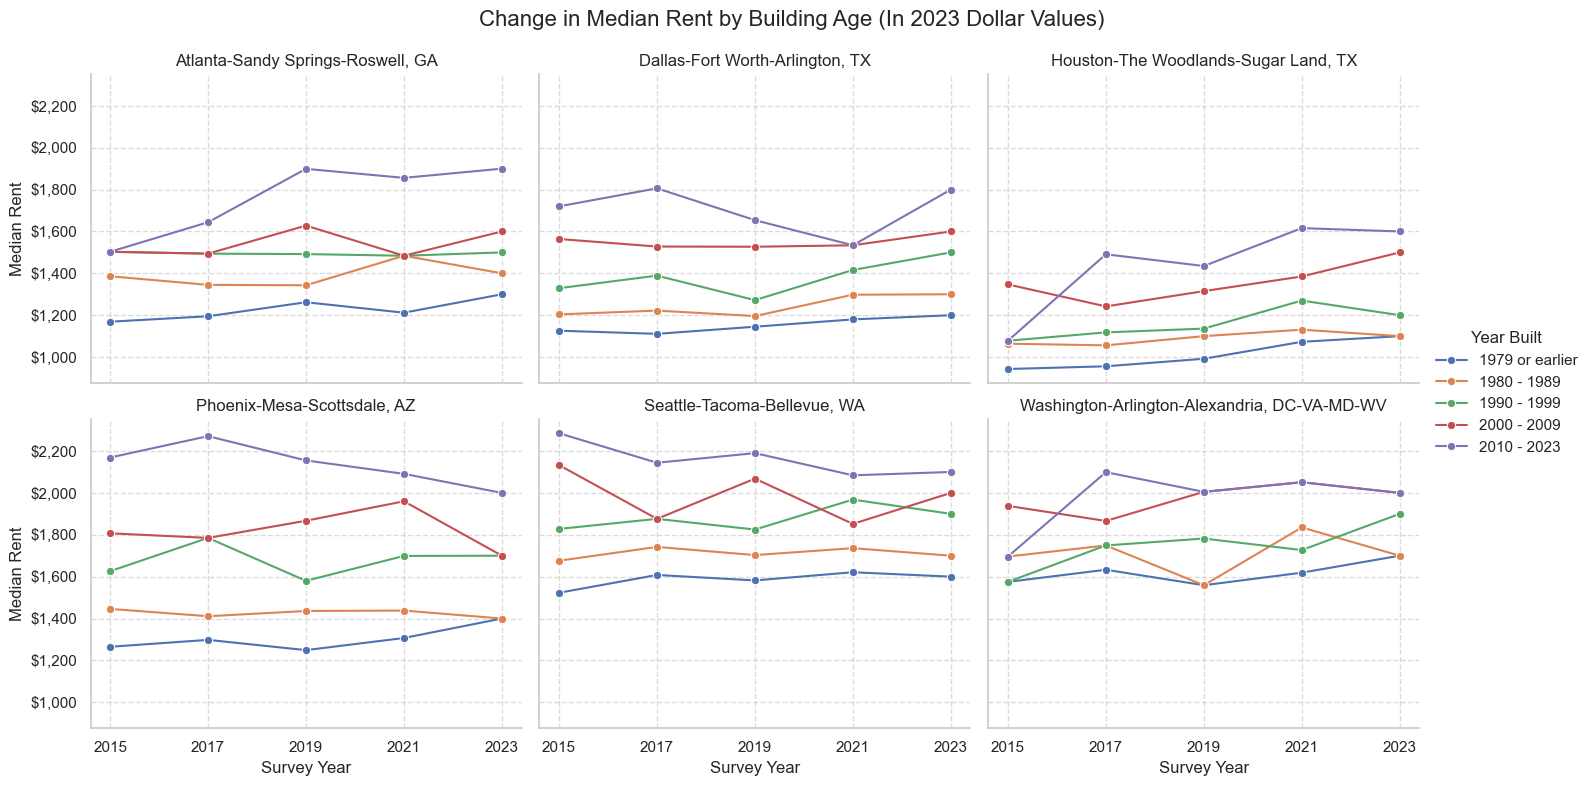

In [94]:
#Plotting

#FacetGrid with hue='YRBUILT_BIN'
g = sns.FacetGrid(
    median_rent_chng_yr_built, 
    col='METRO', 
    col_wrap=3, 
    height=4, 
    aspect=1.2, 
    sharey=True,
    hue='YRBUILT_BIN'
)

#Plot directly using hue groups
g.map_dataframe(
    sns.lineplot, 
    x='SRVYEAR', 
    y='weighted_median',
    marker='o'
)

# Add dashed grids to each subplot
for ax in g.axes.flatten():
        # Dollar formatting for x-axis
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    # Dashed grid
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)

#Labeling
g.add_legend(title="Year Built")
g.set_axis_labels("Survey Year", "Median Rent")
g.set_titles("{col_name}")
g.set(xticks=[2015, 2017, 2019, 2021, 2023])

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Change in Median Rent by Building Age (In 2023 Dollar Values)", fontsize=16)

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/change_weighted_median_rent_INFLN_ADJ_2015-2023_3.png', dpi=300, bbox_inches='tight')

plt.show()

## 3. Are vacancy rates higher for newer units? 
    - What is distribution of rents for vancant units?

**NOTE:** I am using `new_construction_df` as defined in the beginning of the notebook

In [95]:
new_construction_df['TENURE'].value_counts()

TENURE
1     28192
2     19735
-6     7142
Name: count, dtype: int64

In [96]:
new_construction_df['VACANCY'].value_counts()

VACANCY
-6    47927
1      2794
7      1308
6       933
3       504
8       409
10      358
9       251
5       248
4       155
2       151
11       31
Name: count, dtype: int64

`'TENURE' == '-6'` is the same as `'VACANCY' != '-6'`

In [97]:
#Setting indicators
new_construction_df['vacant_dv'] = (new_construction_df['TENURE'] == '-6').astype(int)
new_construction_df["Group"] = np.where(new_construction_df['built_since_2010'], 'Built since 2010', 'Built before 2010')

In [98]:
#Checking grouping/dummy variable
new_construction_df['Group'].value_counts()

Group
Built before 2010    49713
Built since 2010      5356
Name: count, dtype: int64

In [99]:
#Order metropolitan areas in the "supply cohort" only for visualization ---
cbsa_to_metro = supply_cbsa_mapping()            # {CBSA -> "Metro Name"}
allowed_metros = list(cbsa_to_metro.values())    # preserves insertion order

In [100]:
# Keep only those metros for plotting
new_cnstrt_vac = new_construction_df[new_construction_df['METRO'].isin(allowed_metros)].copy()

In [101]:
#Adding "U.S. Average" bar computed over all observations
us_vac_avg = new_construction_df.assign(METRO='U.S. Average')
new_cnstrt_vac = pd.concat([new_cnstrt_vac, us_vac_avg], ignore_index=True)

In [102]:
# Order the x-axis categories
ordered_metros = allowed_metros + ['U.S. Average']
new_cnstrt_vac['METRO'] = pd.Categorical(new_cnstrt_vac['METRO'], categories=ordered_metros, ordered=True)
hue_order = ['Built before 2010', 'Built since 2010']

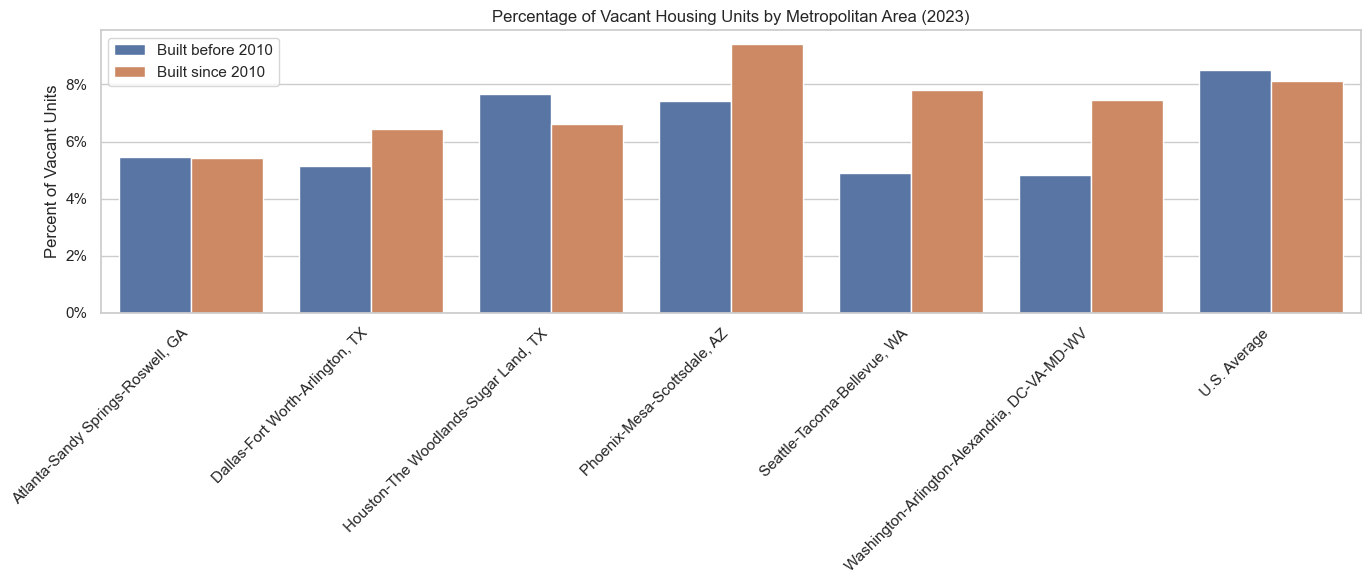

In [103]:
#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=new_cnstrt_vac,
    x='METRO', y='vacant_dv',
    hue='Group', hue_order=hue_order,
    estimator='mean', weights='WEIGHT',
    order=ordered_metros,
    errorbar=None
)

ax.set_title("Percentage of Vacant Housing Units by Metropolitan Area (2023)")
ax.set_xlabel("")
ax.set_ylabel("Percent of Vacant Units")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.xticks(rotation=45, ha='right')
plt.legend(title=None)

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/percent_units_vacant_2.png', dpi=600, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [104]:
new_vac_pivot = (
    new_cnstrt_vac.pivot_table(
        index="METRO",
        columns="Group",
        values="vacant_dv",
        aggfunc=lambda x: np.average(x, weights=new_cnstrt_vac.loc[x.index, "WEIGHT"]),
        observed=True  # <-- add this
    )
    .mul(100).round(1)
    .reindex(index=ordered_metros)     # enforce x-axis order
    .reindex(columns=hue_order)        # enforce hue order
    .reset_index()
)


In [105]:
new_vac_pivot

Group                                         METRO  Built before 2010  \
0                 Atlanta-Sandy Springs-Roswell, GA                5.5   
1                   Dallas-Fort Worth-Arlington, TX                5.1   
2              Houston-The Woodlands-Sugar Land, TX                7.7   
3                       Phoenix-Mesa-Scottsdale, AZ                7.4   
4                       Seattle-Tacoma-Bellevue, WA                4.9   
5      Washington-Arlington-Alexandria, DC-VA-MD-WV                4.8   
6                                      U.S. Average                8.5   

Group  Built since 2010  
0                   5.4  
1                   6.4  
2                   6.6  
3                   9.4  
4                   7.8  
5                   7.4  
6                   8.1

### 3(a). What is distribution of rents for vancant units that are for rent by building age?

#### A few notes on vacancy analysis:
- I am limiting the observations under the `'VACANCY'` variable to the `01` (For rent only) and `02` (For rent or for sale) codes. However, I am only including `02` observations if `'RENT' > 0`.
- Observations where `'VACANCY' == '03'` (For sale only) are not included for this analysis becuase corresponding housing cost variables (`'MORTAMT'`, `'TOTHCAMT'`) are not available.

In [106]:
# Filter to CBSAs in mapping only
included_cbsas_3a = list(supply_cbsa_mapping().keys())

#Createing new DataFrame for vacany units that are specifically for rent and have a non-zero value for the 'RENT' variable
vac_rent_df = metro_ami_panel_df[
    (metro_ami_panel_df['SRVYEAR'] == 2023) & 
    (metro_ami_panel_df['VACANCY'].isin(['1', '2'])) & 
    (metro_ami_panel_df['RENT'] > 0) & 
    (metro_ami_panel_df['OMB13CBSA'].isin(included_cbsas_3a))
].copy()

len(vac_rent_df)

677

In [107]:
#Creating the labels for 'YRBUILT'
vac_yr_labels = ['1979 or earlier', '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - 2023']

#Defining bins
vac_rent_df['YRBUILT_BIN'] = pd.cut(
    vac_rent_df['YRBUILT'],
    bins=[-np.inf, 1979, 1989, 1999, 2009, 2023],
    labels=vac_yr_labels,
    include_lowest=True, right=True
)

In [108]:
vac_rent_df['YRBUILT_BIN'] = vac_rent_df['YRBUILT_BIN'].astype(pd.CategoricalDtype(vac_yr_labels, ordered=True))

In [109]:
#Set style and color palette
sns.set(style='whitegrid')
palette = sns.color_palette('tab10', as_cmap=True)

In [110]:
metro_order = [
    "Atlanta-Sandy Springs-Roswell, GA",
    "Dallas-Fort Worth-Arlington, TX",
    "Houston-The Woodlands-Sugar Land, TX",
    "Phoenix-Mesa-Scottsdale, AZ",
    "Seattle-Tacoma-Bellevue, WA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV"
]

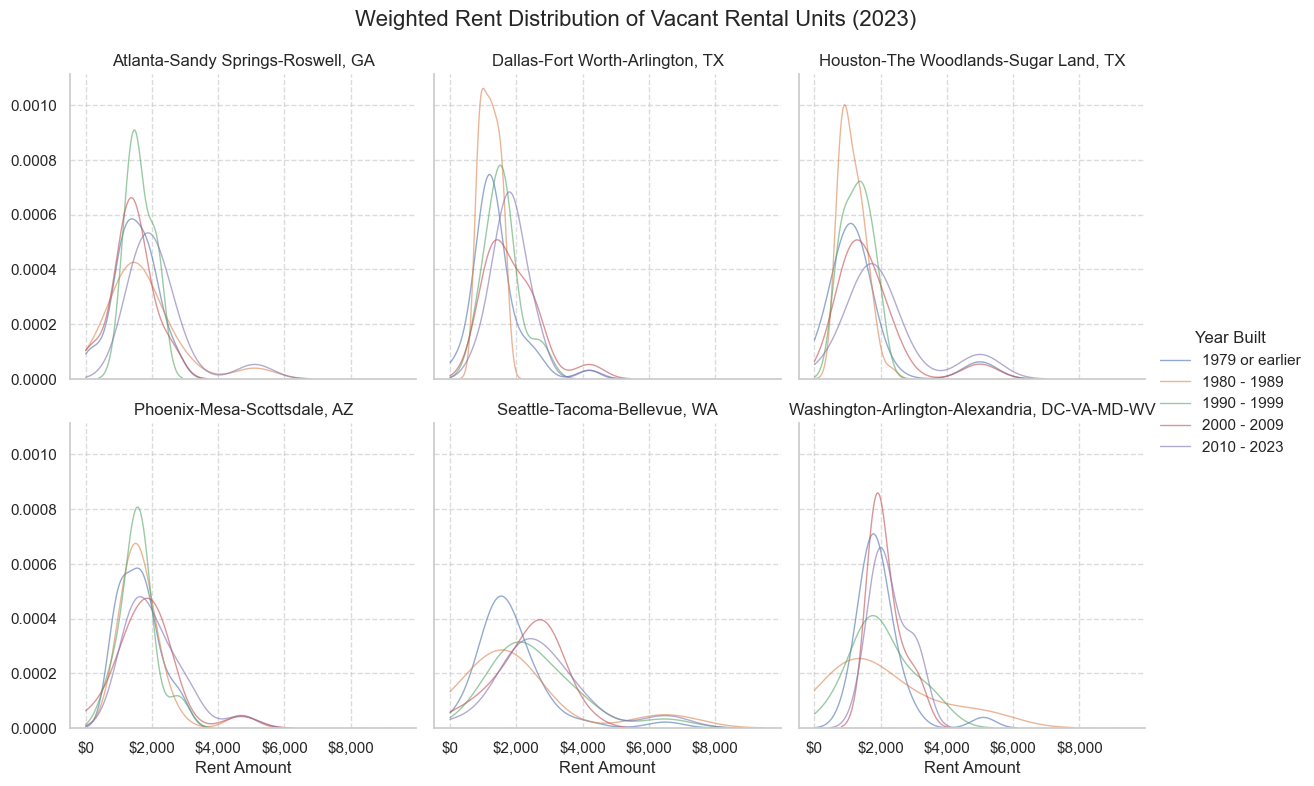

In [111]:
#Create FacetGrid with hue='YRBUILT_BIN'
g = sns.FacetGrid(
    vac_rent_df, 
    col='METRO', 
    col_wrap=3, 
    height=4, 
    sharex=True, 
    sharey=True, 
    hue='YRBUILT_BIN',
    col_order=metro_order
)

#Plot directly using vectorized hue groups
g.map_dataframe(
    sns.kdeplot,
    x='RENT',
    weights='WEIGHT',
    fill=False,
    common_norm=False,
    alpha=0.6,
    linewidth=1,
    clip=(0, None)
)

# Format each subplot
for ax in g.axes.flatten():
    # Dollar formatting for x-axis
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    # Dashed grid
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)

#Labeling
g.add_legend(title="Year Built")
g.set_axis_labels("Rent Amount", "")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Weighted Rent Distribution of Vacant Rental Units (2023)", fontsize=16)

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/units_vacant_rent.png', dpi=300, bbox_inches='tight')

plt.show()

## 4. Which income groups (defined by Area Median Income) are occupying different segments of the housing stock?
- Using `renter_occ_df` defined in 2(c)

In [112]:
#Setting AMI order for plotting
ami_order = ['Moderate, Middle, and High-Income', 'Low-Income', 'Very Low-Income', 'Extremely Low-Income']
renter_occ_df['AMI'] = pd.Categorical(renter_occ_df['AMI'], categories=ami_order, ordered=True)

In [113]:
#Calculating weighted shares of 'AMI' within each YRBUILT_BIN: sum weights, then normalize within bin
s = renter_occ_df.groupby(['YRBUILT_BIN','AMI'], observed=True)['WEIGHT'].sum()
den = s.groupby(level='YRBUILT_BIN', observed=True).transform('sum')
wt_share = (s / den).rename('share').reset_index()  # share in 0–1

In [114]:
#Pivot table (percentages sum to 100 per row)
ami_by_yrbuilt_pct = (wt_share.pivot(index='YRBUILT_BIN', columns='AMI', values='share')
                      .reindex(index=yr_labels, columns=ami_order)
                      .mul(100).round(1))

print(ami_by_yrbuilt_pct.to_string(float_format='{:,.1f}'.format))

AMI              Moderate, Middle, and High-Income  Low-Income  Very Low-Income  Extremely Low-Income
YRBUILT_BIN                                                                                          
1979 or earlier                               37.2        18.1             17.8                  26.8
1980 - 1989                                   38.6        22.3             18.9                  20.2
1990 - 1999                                   45.2        19.2             17.1                  18.6
2000 - 2009                                   50.1        20.0             13.5                  16.5
2010 - 2023                                   55.2        19.4              9.4                  16.1


In [115]:
#Normalize weights within each bin, then summing by AMI
tot_w = renter_occ_df.groupby('YRBUILT_BIN', observed=True)['WEIGHT'].transform('sum')
renter_occ_df['w_norm'] = np.where(tot_w > 0, renter_occ_df['WEIGHT']/tot_w, 0.0)

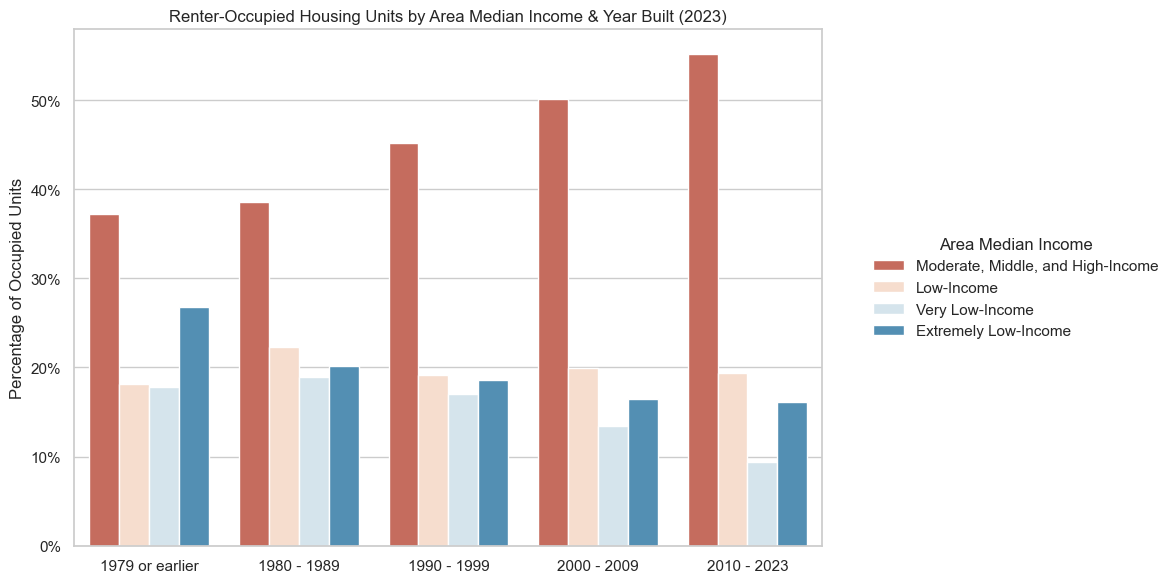

In [116]:
#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=renter_occ_df, x='YRBUILT_BIN', y='w_norm',
    hue='AMI', hue_order=ami_order,
    estimator='sum',           # sum of normalized weights => share within bin
    order=yr_labels,
    palette='RdBu',
    errorbar=None
)

ax.set_title("Renter-Occupied Housing Units by Area Median Income & Year Built (2023)")
ax.set_xlabel(""); ax.set_ylabel("Percentage of Occupied Units")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.xticks(rotation=0)

plt.legend(title="Area Median Income", 
           bbox_to_anchor=(1.05, 0.5), 
           loc='center left',
           frameon=False)

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/renter_unit_occupy_ami_year_built.png', dpi=600, bbox_inches='tight')

plt.tight_layout(); plt.show()

## 5. Are pubic rental subsidies more prevalent in newer or older housing stock? How has that changed from 2015 - 2023?

In [117]:
#New DataFrame for subsidy analysis
sub_23_df = metro_ami_panel_df[(metro_ami_panel_df['SRVYEAR'] == 2023) &
                                (metro_ami_panel_df['TENURE'] == '2') &
                                (metro_ami_panel_df['OMB13CBSA'].isin(['47900', '19100', '26420', # supply cohort codes
                                                                       '38060', '42660', '12060']))].copy()
len(sub_23_df)

3880

In [118]:
#Creating the labels for 'YRBUILT' for new DataFrame
yr_labels_sub_df = ['1979 or earlier', '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - 2023']

#Defining bins
sub_23_df['YRBUILT_BIN'] = pd.cut(
    sub_23_df['YRBUILT'],
    bins=[-np.inf, 1979, 1989, 1999, 2009, 2023],
    labels=yr_labels_sub_df,
    include_lowest=True, right=True
)

In [119]:
sub_23_df['YRBUILT_BIN'] = sub_23_df['YRBUILT_BIN'].astype(pd.CategoricalDtype
                                                           (yr_labels_sub_df, ordered=True))

In [120]:
sub_23_df['RENTSUB'].unique()

array(['8', '4', '5', '1', '7', '-9', '3', '2', '6'], dtype=object)

In [121]:
#Weighted counts per bin (denominator: ALL renter-occupied units)
g_all = (sub_23_df.groupby('YRBUILT_BIN', observed=True)['WEIGHT']
         .sum()
         .rename('all_weighted'))

In [122]:
#Weighted counts per bin for public subsidy values of interest (1–5)
subsidy_codes = set(list('12345'))
g_sub = (sub_23_df.loc[sub_23_df['RENTSUB'].isin(subsidy_codes)]
         .groupby('YRBUILT_BIN', observed=True)['WEIGHT']
         .sum()
         .rename('subsidy_weighted'))

In [123]:
# Combine, order rows, compute share
pivot = (pd.concat([g_all, g_sub], axis=1)
           .reindex(yr_labels_sub_df)
           .fillna({'subsidy_weighted': 0})
           .assign(share_pct=lambda t: np.where(t['all_weighted'] > 0,
                                               100 * t['subsidy_weighted'] / t['all_weighted'],
                                               np.nan)))

# Display with two decimals for the percent column
print(pivot.assign(share_pct=pivot['share_pct'].round(2))
          .to_string(float_format='{:,.2f}'.format))

                 all_weighted  subsidy_weighted  share_pct
YRBUILT_BIN                                               
1979 or earlier  1,667,127.09        324,161.35      19.44
1980 - 1989        910,215.81        138,262.72      15.19
1990 - 1999        670,634.61        109,975.39      16.40
2000 - 2009        899,069.28        103,745.78      11.54
2010 - 2023        964,058.07        143,386.35      14.87


### 5(a). How has share of units built between 2010 - 2023 with a public subsidy changed throughout the panel dataset (2015 - 2023)?

In [124]:
#New DataFrame for panel subsidy analysis
sub_panel_df = metro_ami_panel_df[(metro_ami_panel_df['TENURE'] == '2') &
                                (metro_ami_panel_df['OMB13CBSA'].isin(['47900', '19100', '26420', # supply cohort codes
                                                                       '38060', '42660', '12060']))].copy()
len(sub_panel_df)

23791

In [125]:
#Recreating the labels for 'YRBUILT' for new DataFrame
yr_labels_sub_panel = ['1979 or earlier', '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - 2023']

#Defining bins
sub_panel_df['YRBUILT_BIN'] = pd.cut(
    sub_panel_df['YRBUILT'],
    bins=[-np.inf, 1979, 1989, 1999, 2009, 2023],
    labels=yr_labels_sub_panel,
    include_lowest=True, right=True
)

In [126]:
sub_panel_df['YRBUILT_BIN'] = sub_panel_df['YRBUILT_BIN'].astype(pd.CategoricalDtype
                                                           (yr_labels_sub_panel, ordered=True))

In [127]:
#Filter to the target year-built bin
sub_built_2010 = sub_panel_df.loc[sub_panel_df['YRBUILT_BIN'] == '2010 - 2023'].copy()

In [128]:
#Creating 1/0 dummy variable any public subsidy codes 1–5 (robust to string/int)
sub_built_2010['sub_2010_dv'] = sub_built_2010['RENTSUB'].astype(str).isin(list('12345')).astype(int)

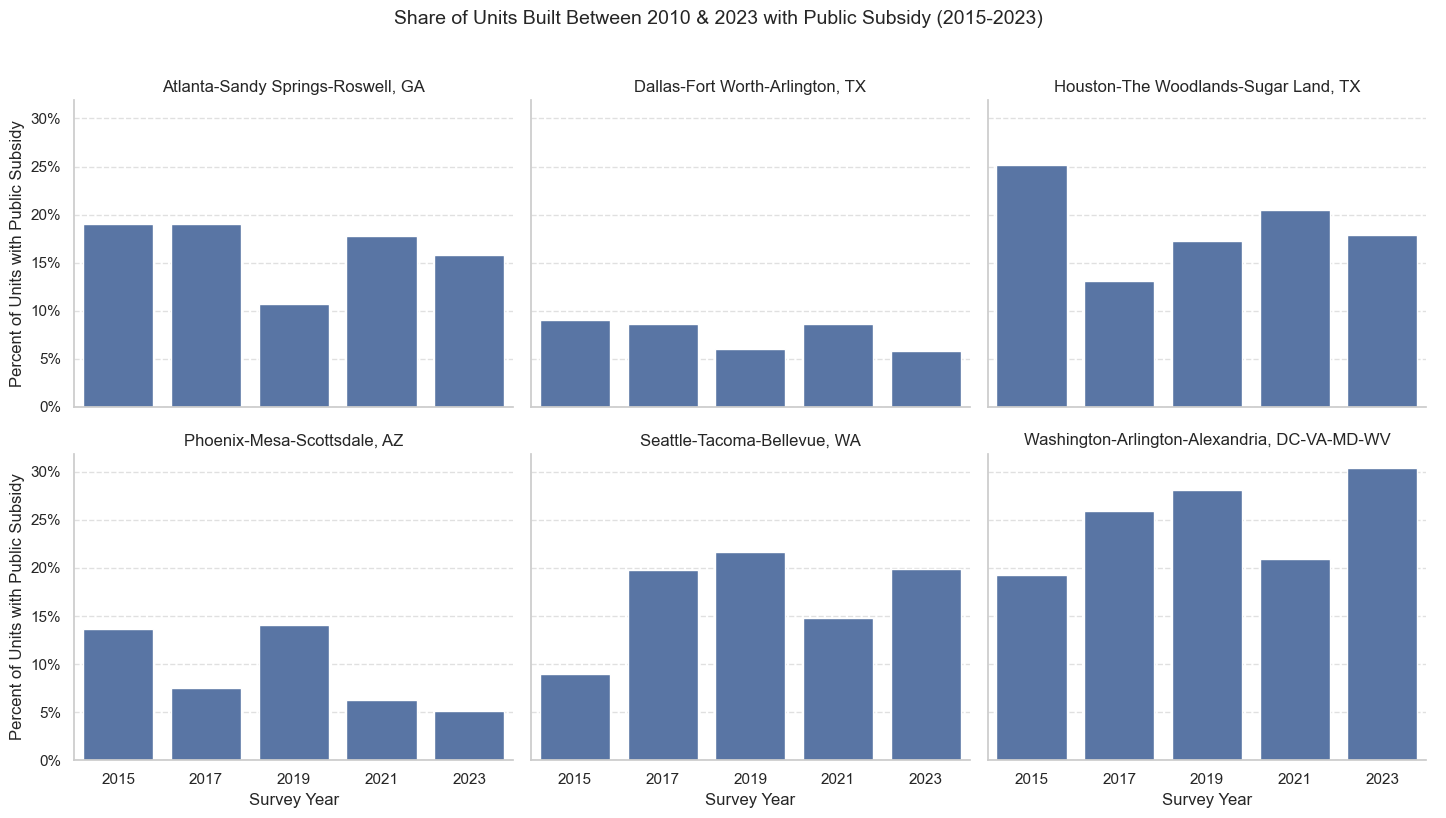

In [129]:
sns.set(style='whitegrid')
g = sns.catplot(
    data=sub_built_2010,
    kind='bar',
    x='SRVYEAR', y='sub_2010_dv',
    col='METRO', col_wrap=3,
    estimator='mean',            # weighted mean of 0/1 -> share
    weights='WEIGHT',            # year-based weights used within each SRVYEAR & METRO
    col_order=metro_order,
    errorbar=None,               
    height=4, aspect=1.2
)

for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
    ax.grid(True, axis="y", linestyle="--", alpha=0.6)
    ax.set_xlabel("Survey Year")
    ax.set_ylabel("Percent of Units with Public Subsidy")

g.set_titles("{col_name}")
g.fig.suptitle("Share of Units Built Between 2010 & 2023 with Public Subsidy (2015-2023)", y=1.02, fontsize=14)

#Save and export image as png file
#plt.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/subsidy_share_trend.png', dpi=600, bbox_inches='tight')


plt.tight_layout()
plt.show()

Creating a function to calculate weighted subsidy share

In [130]:
def weighted_subsidy_share(df, group_cols, cat_col='RENTSUB', wt_col='WEIGHT'):
    """
    Vectorized: Calculate weighted share of units with government rental subsidy (codes 1–5).
    """
    subsidy_codes = {'1', '2', '3', '4', '5'}
    
    # Copy + make subsidy flag
    df = df.copy()
    df['subsidy_flag'] = df[cat_col].isin(subsidy_codes).astype(int)
    
    # Numerator: weighted subsidy units
    df['subsidy_weight'] = df['subsidy_flag'] * df[wt_col]
    
    # Group + aggregate both numerator and denominator
    grouped = (
        df.groupby(group_cols)
          .agg(total_weighted=(wt_col, 'sum'),
               subsidy_weighted=('subsidy_weight', 'sum'))
          .reset_index()
    )
    
    # Compute share
    grouped['subsidy_share'] = (grouped['subsidy_weighted'] / grouped['total_weighted']) * 100
    
    return grouped

The output below tells me the percentage of all renter households in a given metro and survey year who occupy a subsidized unit.

In [131]:
#Examining percent of subsides units from each survey year
trend_subsidy_share_by_year = weighted_subsidy_share(
    sub_panel_df,
    group_cols=['METRO','SRVYEAR'],
    cat_col='RENTSUB',
    wt_col='WEIGHT'
)
trend_subsidy_share_by_year

METRO  SRVYEAR  total_weighted  \
0              Atlanta-Sandy Springs-Roswell, GA     2015    6.964009e+05   
1              Atlanta-Sandy Springs-Roswell, GA     2017    7.776101e+05   
2              Atlanta-Sandy Springs-Roswell, GA     2019    7.543309e+05   
3              Atlanta-Sandy Springs-Roswell, GA     2021    8.082318e+05   
4              Atlanta-Sandy Springs-Roswell, GA     2023    7.755778e+05   
5                Dallas-Fort Worth-Arlington, TX     2015    9.956292e+05   
6                Dallas-Fort Worth-Arlington, TX     2017    1.037123e+06   
7                Dallas-Fort Worth-Arlington, TX     2019    1.054624e+06   
8                Dallas-Fort Worth-Arlington, TX     2021    1.134920e+06   
9                Dallas-Fort Worth-Arlington, TX     2023    1.186878e+06   
10          Houston-The Woodlands-Sugar Land, TX     2015    8.661802e+05   
11          Houston-The Woodlands-Sugar Land, TX     2017    8.662001e+05   
12          Houston-The Woodlands-Sugar Land, TX     2019    8.768432e+05   
13          Houston-The Woodlands-Sugar Land, TX     2021    1.025627e+06   
14          Houston-The Woodlands-Sugar Land, TX     2023    1.052278e+06   
15                   Phoenix-Mesa-Scottsdale, AZ     2015    5.992369e+05   
16                   Phoenix-Mesa-Scottsdale, AZ     2017    5.742995e+05   
17                   Phoenix-Mesa-Scottsdale, AZ     2019    5.888401e+05   
18                   Phoenix-Mesa-Scottsdale, AZ     2021    6.007665e+05   
19                   Phoenix-Mesa-Scottsdale, AZ     2023    6.289921e+05   
20                   Seattle-Tacoma-Bellevue, WA     2015    5.828884e+05   
21                   Seattle-Tacoma-Bellevue, WA     2017    6.004345e+05   
22                   Seattle-Tacoma-Bellevue, WA     2019    5.829927e+05   
23                   Seattle-Tacoma-Bellevue, WA     2021    6.396097e+05   
24                   Seattle-Tacoma-Bellevue, WA     2023    6.455531e+05   
25  Washington-Arlington-Alexandria, DC-VA-MD-WV     2015    7.841589e+05   
26  Washington-Arlington-Alexandria, DC-VA-MD-WV     2017    7.889926e+05   
27  Washington-Arlington-Alexandria, DC-VA-MD-WV     2019    8.359413e+05   
28  Washington-Arlington-Alexandria, DC-VA-MD-WV     2021    8.911055e+05   
29  Washington-Arlington-Alexandria, DC-VA-MD-WV     2023    8.218258e+05   

    subsidy_weighted  subsidy_share  
0       87504.810526      12.565293  
1       95816.414334      12.321909  
2      110068.342655      14.591519  
3      150457.366082      18.615622  
4      114058.903438      14.706314  
5      123392.632153      12.393433  
6      143465.581825      13.833031  
7      110373.546126      10.465678  
8      148505.510572      13.085106  
9      132409.509658      11.156120  
10     106029.243489      12.241015  
11     110609.566660      12.769516  
12     144173.279757      16.442310  
13     155619.700500      15.173123  
14     144831.113186      13.763575  
15      52930.083763       8.832915  
16      67732.428327      11.793920  
17      81073.573621      13.768352  
18      88687.691843      14.762424  
19      86344.226995      13.727394  
20      75701.177458      12.987251  
21     103167.052688      17.182065  
22      99255.427793      17.025159  
23      98479.384923      15.396794  
24     111260.311806      17.234881  
25     131322.614345      16.746939  
26     166787.448952      21.139292  
27     190700.796813      22.812702  
28     177135.173618      19.878138  
29     230627.529583      28.062826

The code below tells me the percent of renter households in that AMI group who live in a subsidized unit. It’s **_not_** “the share of all subsidies going to a given AMI.” It’s “within each AMI group, what fraction of households are subsidized?”

In [132]:
#Examining the percent of renter households in that AMI group who live in a subsidized unit for each METRO/SRVYEAR/AMI group.
trend_subsidy_share_within_ami = weighted_subsidy_share(
    sub_panel_df, 
    group_cols=['SRVYEAR', 'METRO', 'AMI'], 
    cat_col='RENTSUB', wt_col='WEIGHT'
) 

trend_subsidy_share_within_ami

SRVYEAR                                         METRO  \
0       2015             Atlanta-Sandy Springs-Roswell, GA   
1       2015             Atlanta-Sandy Springs-Roswell, GA   
2       2015             Atlanta-Sandy Springs-Roswell, GA   
3       2015             Atlanta-Sandy Springs-Roswell, GA   
4       2015               Dallas-Fort Worth-Arlington, TX   
..       ...                                           ...   
115     2023                   Seattle-Tacoma-Bellevue, WA   
116     2023  Washington-Arlington-Alexandria, DC-VA-MD-WV   
117     2023  Washington-Arlington-Alexandria, DC-VA-MD-WV   
118     2023  Washington-Arlington-Alexandria, DC-VA-MD-WV   
119     2023  Washington-Arlington-Alexandria, DC-VA-MD-WV   

                                   AMI  total_weighted  subsidy_weighted  \
0                 Extremely Low-Income   153274.661403      40504.136386   
1                           Low-Income   141143.800227       8813.532960   
2    Moderate, Middle, and High-Income   290971.752169      10566.189997   
3                      Very Low-Income   111010.645216      27620.951183   
4                 Extremely Low-Income   218718.971192      54621.129155   
..                                 ...             ...               ...   
115                    Very Low-Income   109114.289454      23336.552991   
116               Extremely Low-Income   220027.267528     112693.048802   
117                         Low-Income    74790.383770      13322.987669   
118  Moderate, Middle, and High-Income   392196.353389      57585.265200   
119                    Very Low-Income   134811.752294      47026.227912   

     subsidy_share  
0        26.425853  
1         6.244364  
2         3.631346  
3        24.881354  
4        24.973201  
..             ...  
115      21.387257  
116      51.217765  
117      17.813771  
118      14.682764  
119      34.882885  

[120 rows x 6 columns]

In [133]:
#Pivot table, one table per AMI
pivot_subsidy_within_ami = (
    trend_subsidy_share_within_ami
    .pivot_table(
        index='METRO',
        columns=['AMI', 'SRVYEAR'],
        values='subsidy_share'
    )
    .sort_index(axis=1, level=[0, 1])
)

#Modifying 'pivot_renter_share_ami' to show rounded percentages
pivot_subsidy_distribution__within_ami_pct = (pivot_subsidy_within_ami).round(2)

#View pivot table
with pd.option_context('display.max_columns', None):
    display(pivot_subsidy_distribution__within_ami_pct)  

AMI                                          Extremely Low-Income         \
SRVYEAR                                                      2015   2017   
METRO                                                                      
Atlanta-Sandy Springs-Roswell, GA                           26.43  24.83   
Dallas-Fort Worth-Arlington, TX                             24.97  31.96   
Houston-The Woodlands-Sugar Land, TX                        24.75  25.07   
Phoenix-Mesa-Scottsdale, AZ                                 18.06  27.87   
Seattle-Tacoma-Bellevue, WA                                 39.28  44.08   
Washington-Arlington-Alexandria, DC-VA-MD-WV                41.95  44.71   

AMI                                                               Low-Income  \
SRVYEAR                                        2019   2021   2023       2015   
METRO                                                                          
Atlanta-Sandy Springs-Roswell, GA             31.57  35.07  31.79       6.24   
Dallas-Fort Worth-Arlington, TX               27.67  32.94  27.12      11.62   
Houston-The Woodlands-Sugar Land, TX          27.43  27.05  26.04      11.78   
Phoenix-Mesa-Scottsdale, AZ                   23.53  33.28  29.77       7.60   
Seattle-Tacoma-Bellevue, WA                   52.52  40.10  37.93       4.39   
Washington-Arlington-Alexandria, DC-VA-MD-WV  43.74  41.77  51.22       9.65   

AMI                                                                       \
SRVYEAR                                        2017   2019   2021   2023   
METRO                                                                      
Atlanta-Sandy Springs-Roswell, GA             10.00   9.22  11.97  13.51   
Dallas-Fort Worth-Arlington, TX               13.46   6.32  11.38   9.27   
Houston-The Woodlands-Sugar Land, TX          13.05  14.19  10.81  10.53   
Phoenix-Mesa-Scottsdale, AZ                   11.44  12.81  11.07  12.87   
Seattle-Tacoma-Bellevue, WA                   10.24  12.10   9.24  11.50   
Washington-Arlington-Alexandria, DC-VA-MD-WV  16.58  18.41  12.33  17.81   

AMI                                          Moderate, Middle, and High-Income  \
SRVYEAR                                                                   2015   
METRO                                                                            
Atlanta-Sandy Springs-Roswell, GA                                         3.63   
Dallas-Fort Worth-Arlington, TX                                           4.67   
Houston-The Woodlands-Sugar Land, TX                                      4.91   
Phoenix-Mesa-Scottsdale, AZ                                               4.40   
Seattle-Tacoma-Bellevue, WA                                               3.65   
Washington-Arlington-Alexandria, DC-VA-MD-WV                              5.37   

AMI                                                                       \
SRVYEAR                                        2017   2019   2021   2023   
METRO                                                                      
Atlanta-Sandy Springs-Roswell, GA              5.65   7.54   9.44   4.52   
Dallas-Fort Worth-Arlington, TX                5.82   4.61   6.88   6.28   
Houston-The Woodlands-Sugar Land, TX           5.72   9.85   8.96   9.76   
Phoenix-Mesa-Scottsdale, AZ                    5.59   7.32  10.36   7.03   
Seattle-Tacoma-Bellevue, WA                    6.45   2.78   4.29   7.94   
Washington-Arlington-Alexandria, DC-VA-MD-WV  11.13  12.87  11.06  14.68   

AMI                                          Very Low-Income                \
SRVYEAR                                                 2015   2017   2019   
METRO                                                                        
Atlanta-Sandy Springs-Roswell, GA                      24.88  21.83  20.16   
Dallas-Fort Worth-Arlington, TX                        16.33  16.75   8.43   
Houston-The Woodlands-Sugar Land, TX                    9.76   8.96  19.77   
Phoenix-Mesa-Scot

The function and code below tells me the distribution of subsidies across AMI groups (i.e., “what share of all subsidies are going to each AMI?”)

In [134]:
#Examining percent of subsides units from each survey year with AMI in group
def subsidy_distribution_by_ami(df, group_cols, cat_col='RENTSUB', wt_col='WEIGHT'):
    """
    Calculate the distribution of subsidized units across AMI groups.
    
    For each grouping (e.g., Metro x Year), return the share of all subsidized
    households that fall into each AMI group.
    """
    subsidy_codes = {'1', '2', '3', '4', '5'}
    
    df = df.copy()
    df['subsidy_flag'] = df[cat_col].isin(subsidy_codes).astype(int)
    df['subsidy_weight'] = df['subsidy_flag'] * df[wt_col]

    #Aggregating by AMI within each grouping
    grouped = (
        df.groupby(group_cols)
          .agg(subsidy_weighted=('subsidy_weight', 'sum'))
          .reset_index()
    )

    #Computing denominator: total subsidized within each parent group (excluding AMI)
    parent_cols = [c for c in group_cols if c != 'AMI']
    totals = (
        grouped.groupby(parent_cols)['subsidy_weighted']
               .transform('sum')
    )

    #Share of all subsidized households
    grouped['subsidy_share'] = (grouped['subsidy_weighted'] / totals) * 100

    return grouped

In [135]:
trend_subsidy_distribution = subsidy_distribution_by_ami(
    sub_panel_df,
    group_cols=['METRO','SRVYEAR','AMI'],
    cat_col='RENTSUB',
    wt_col='WEIGHT'
)
trend_subsidy_distribution

METRO  SRVYEAR  \
0               Atlanta-Sandy Springs-Roswell, GA     2015   
1               Atlanta-Sandy Springs-Roswell, GA     2015   
2               Atlanta-Sandy Springs-Roswell, GA     2015   
3               Atlanta-Sandy Springs-Roswell, GA     2015   
4               Atlanta-Sandy Springs-Roswell, GA     2017   
..                                            ...      ...   
115  Washington-Arlington-Alexandria, DC-VA-MD-WV     2021   
116  Washington-Arlington-Alexandria, DC-VA-MD-WV     2023   
117  Washington-Arlington-Alexandria, DC-VA-MD-WV     2023   
118  Washington-Arlington-Alexandria, DC-VA-MD-WV     2023   
119  Washington-Arlington-Alexandria, DC-VA-MD-WV     2023   

                                   AMI  subsidy_weighted  subsidy_share  
0                 Extremely Low-Income      40504.136386      46.287897  
1                           Low-Income       8813.532960      10.072055  
2    Moderate, Middle, and High-Income      10566.189997      12.074982  
3                      Very Low-Income      27620.951183      31.565066  
4                 Extremely Low-Income      37418.983577      39.052791  
..                                 ...               ...            ...  
115                    Very Low-Income      20352.443443      11.489781  
116               Extremely Low-Income     112693.048802      48.863659  
117                         Low-Income      13322.987669       5.776842  
118  Moderate, Middle, and High-Income      57585.265200      24.968947  
119                    Very Low-Income      47026.227912      20.390553  

[120 rows x 5 columns]

In [136]:
#Pivot table: Rows = Metro, Columns = SRVYEAR, Values = share (one table per AMI)
pivot_subsidy_ami_dist = (
    trend_subsidy_distribution
    .pivot_table(
        index='METRO',
        columns=['AMI', 'SRVYEAR'],
        values='subsidy_share'
    )
    .sort_index(axis=1, level=[0, 1])
)

#Modifying 'pivot_renter_share_ami' to show rounded percentages
pivot_subsidy_distribution_ami_pct = (pivot_subsidy_ami_dist).round(2)

#View pivot table
with pd.option_context('display.max_columns', None):
    display(pivot_subsidy_distribution_ami_pct)  

AMI                                          Extremely Low-Income         \
SRVYEAR                                                      2015   2017   
METRO                                                                      
Atlanta-Sandy Springs-Roswell, GA                           46.29  39.05   
Dallas-Fort Worth-Arlington, TX                             44.27  42.49   
Houston-The Woodlands-Sugar Land, TX                        52.96  50.11   
Phoenix-Mesa-Scottsdale, AZ                                 48.47  48.76   
Seattle-Tacoma-Bellevue, WA                                 60.06  50.50   
Washington-Arlington-Alexandria, DC-VA-MD-WV                64.37  45.82   

AMI                                                               Low-Income  \
SRVYEAR                                        2019   2021   2023       2015   
METRO                                                                          
Atlanta-Sandy Springs-Roswell, GA             45.25  45.03  45.19      10.07   
Dallas-Fort Worth-Arlington, TX               56.33  38.25  44.22      17.29   
Houston-The Woodlands-Sugar Land, TX          38.69  47.01  41.70      20.70   
Phoenix-Mesa-Scottsdale, AZ                   35.29  36.69  31.02      16.57   
Seattle-Tacoma-Bellevue, WA                   58.66  63.23  47.09       5.38   
Washington-Arlington-Alexandria, DC-VA-MD-WV  44.57  53.75  48.86       5.09   

AMI                                                                       \
SRVYEAR                                        2017   2019   2021   2023   
METRO                                                                      
Atlanta-Sandy Springs-Roswell, GA             17.12  12.15  14.12  19.51   
Dallas-Fort Worth-Arlington, TX               21.43  15.28  18.26  19.42   
Houston-The Woodlands-Sugar Land, TX          22.75  19.49  13.67  17.05   
Phoenix-Mesa-Scottsdale, AZ                   18.11  18.11  15.04  20.75   
Seattle-Tacoma-Bellevue, WA                    9.20  15.75  10.93  11.32   
Washington-Arlington-Alexandria, DC-VA-MD-WV  10.99   7.56   5.67   5.78   

AMI                                          Moderate, Middle, and High-Income  \
SRVYEAR                                                                   2015   
METRO                                                                            
Atlanta-Sandy Springs-Roswell, GA                                        12.07   
Dallas-Fort Worth-Arlington, TX                                          16.08   
Houston-The Woodlands-Sugar Land, TX                                     15.53   
Phoenix-Mesa-Scottsdale, AZ                                              21.07   
Seattle-Tacoma-Bellevue, WA                                              13.17   
Washington-Arlington-Alexandria, DC-VA-MD-WV                             15.07   

AMI                                                                       \
SRVYEAR                                        2017   2019   2021   2023   
METRO                                                                      
Atlanta-Sandy Springs-Roswell, GA             21.50  23.98  20.13  13.17   
Dallas-Fort Worth-Arlington, TX               19.21  17.60  24.21  24.44   
Houston-The Woodlands-Sugar Land, TX          16.82  23.23  23.70  28.18   
Phoenix-Mesa-Scottsdale, AZ                   23.27  26.00  35.35  25.21   
Seattle-Tacoma-Bellevue, WA                   17.92   6.87  12.49  20.62   
Washington-Arlington-Alexandria, DC-VA-MD-WV  26.12  28.78  29.10  24.97   

AMI                                          Very Low-Income                \
SRVYEAR                                                 2015   2017   2019   
METRO                                                                        
Atlanta-Sandy Springs-Roswell, GA                      31.57  22.33  18.61   
Dallas-Fort Worth-Arlington, TX                        22.37  16.88  10.78   
Houston-The Woodlands-Sugar Land, TX                   10.81  10.32  18.59   
Phoenix-Mesa-Scot

## 6. How has the share of rental housing units occupied by AMI (LI/VLI/ELI) households changed from 2015 - 2023?
    - Visualize by count as well and by household income  

In [137]:
#Looking at the total weighted estimate of of renter-occupied units by metropolitan area from year to year
renter_df = metro_ami_panel_df[metro_ami_panel_df['TENURE'] == '2'].copy()

#Mapping for all metropolitan areas, including "All other metropolitan areas" and "Not in a metropolitan area"
total_cbsa_map = combine_all_cbsa_mappings()

# Ensure CBSA codes are strings before mapping
renter_df.loc[:, 'METRO'] = renter_df['OMB13CBSA'].astype(str).map(total_cbsa_map)

pivot_table = pd.pivot_table(
    renter_df,
    values='WEIGHT',
    index='METRO',
    columns='SRVYEAR',
    aggfunc='sum',
    fill_value=0
)

with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(pivot_table)  

SRVYEAR                                            2015       2017       2019  \
METRO                                                                           
All other metropolitan areas                 21,707,520 21,737,499 22,404,204   
Atlanta-Sandy Springs-Roswell, GA               696,401    777,610    754,331   
Boston-Cambridge-Quincy, MA-NH                  687,055    694,908    730,619   
Chicago-Naperville-Elgin, IL-IN-WI            1,255,408  1,204,712  1,210,738   
Dallas-Fort Worth-Arlington, TX                 995,629  1,037,123  1,054,624   
Detroit-Warren-Dearborn, MI                     485,692    502,380    472,295   
Houston-The Woodlands-Sugar Land, TX            866,180    866,200    876,843   
Los Angeles-Long Beach-Anaheim, CA            2,267,207  2,240,640  2,265,472   
Miami-Fort Lauderdale-West Palm Beach, FL       826,383    829,741    839,680   
New York-Newark-Jersey City, NY-NJ-PA         3,509,656  3,524,499  3,643,812   
Not in a metropolitan area                    4,616,475  4,710,868  4,573,450   
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD     681,107    712,487    687,632   
Phoenix-Mesa-Scottsdale, AZ                     599,237    574,300    588,840   
Riverside-San Bernardino-Ontario, CA            512,601    470,362    463,583   
San Francisco-Oakland-Hayward, CA               778,680    759,240    758,958   
Seattle-Tacoma-Bellevue, WA                     582,888    600,435    582,993   
Washington-Arlington-Alexandria, DC-VA-MD-WV    784,159    788,993    835,941   

SRVYEAR                                            2021       2023  
METRO                                                               
All other metropolitan areas                 23,059,620 23,392,287  
Atlanta-Sandy Springs-Roswell, GA               808,232    775,578  
Boston-Cambridge-Quincy, MA-NH                  774,484    748,237  
Chicago-Naperville-Elgin, IL-IN-WI            1,241,962  1,341,991  
Dallas-Fort Worth-Arlington, TX               1,134,920  1,186,878  
Detroit-Warren-Dearborn, MI                     491,067    473,353  
Houston-The Woodlands-Sugar Land, TX          1,025,627  1,052,278  
Los Angeles-Long Beach-Anaheim, CA            2,416,401  2,427,746  
Miami-Fort Lauderdale-West Palm Beach, FL       836,463    900,193  
New York-Newark-Jersey City, NY-NJ-PA         3,671,932  3,760,537  
Not in a metropolitan area                    4,444,247  4,279,597  
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD     779,895    761,522  
Phoenix-Mesa-Scottsdale, AZ                     600,766    628,992  
Riverside-San Bernardino-Ontario, CA            477,266    444,282  
San Francisco-Oakland-Hayward, CA               768,707    775,601  
Seattle-Tacoma-Bellevue, WA                     639,610    645,553  
Washington-Arlington-Alexandria, DC-VA-MD-WV    891,105    821,826

In [138]:
#New DataFrame for renter-occupied units thate are in the "supply cohort" metropolitan areas
cbsa_ami_map = supply_cbsa_mapping()

renter_ami_df = metro_ami_panel_df.loc[
    (metro_ami_panel_df['TENURE'] == '2') &
    (metro_ami_panel_df['OMB13CBSA'].isin(list(cbsa_ami_map.keys())))].copy()

len(renter_ami_df)

23791

In [139]:
#Weighted count of renter-occupied housing units by year, AMI, and CBSA
ami_weighted = (
    renter_ami_df
    .groupby(['SRVYEAR', 'AMI', 'METRO'])['WEIGHT']
    .sum()
    .reset_index(name='ami_weighted_count')
)

In [140]:
#Total weighted renter-occupied housing units per year and CBSA (denominator)
total_weighted = (
    renter_ami_df
    .groupby(['SRVYEAR', 'METRO'])['WEIGHT']
    .sum()
    .reset_index(name='total_weighted')
)

In [141]:
#Merge numerator and denominator
ami_share = pd.merge(ami_weighted, total_weighted, on=['SRVYEAR', 'METRO'])

In [142]:
#Calculate share
ami_share['share'] = ami_share['ami_weighted_count'] / ami_share['total_weighted']

In [143]:
ami_order = ['Extremely Low-Income', 'Very Low-Income', 'Low-Income', 'Moderate, Middle, and High-Income']
ami_share['AMI'] = pd.Categorical(ami_share['AMI'], categories=ami_order, ordered=True)

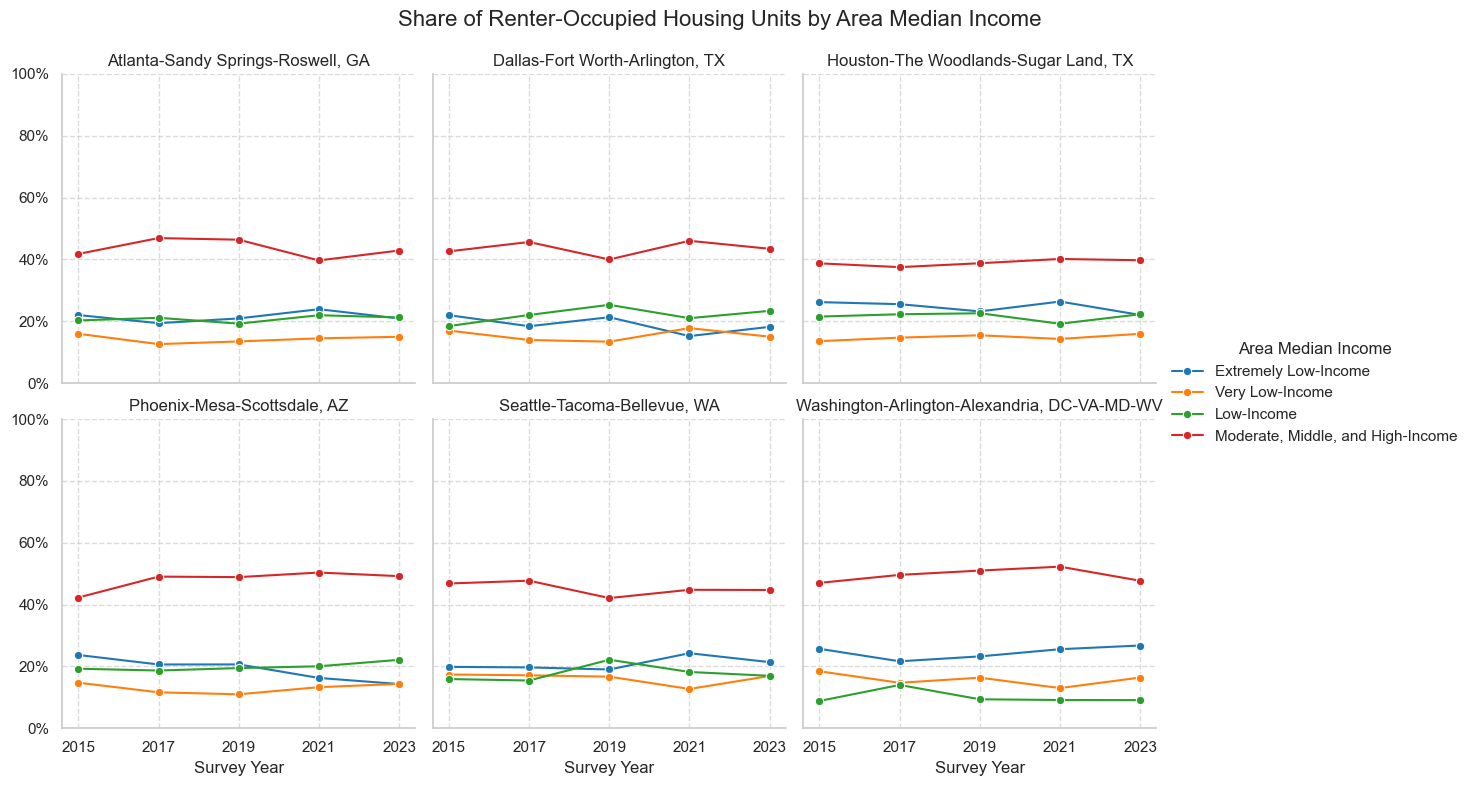

<Figure size 1600x1000 with 0 Axes>

In [144]:
#Plot weighted share
g = sns.FacetGrid(
    ami_share,
    col='METRO',
    col_wrap=3,
    height=4,
    sharey=True,
    hue='AMI',
    hue_order=ami_order,
    palette='tab10'
)

g.map_dataframe(
    sns.lineplot, 
    x='SRVYEAR', 
    y='share', 
    marker='o'
)

#Format plot axes and labels
g.add_legend(title="Area Median Income")
g.set_axis_labels('Survey Year', '')

#Set years
actual_years = [2015, 2017, 2019, 2021, 2023]
g.set(xticks=actual_years)

g.set_titles(col_template="{col_name}")
g.set(ylim=(0, 1))
for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)  

#Title and layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Share of Renter-Occupied Housing Units by Area Median Income', fontsize=16)

actual_years = [2015, 2017, 2019, 2021, 2023]
g.set(xticks=actual_years)

#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/estimated_share_renter_households_by_AMI_2.png', dpi=300, bbox_inches='tight')

#plt.tight_layout()
plt.figure(figsize=(16, 10))
plt.show()

In [145]:
#Pivot table: Rows = Metro, Columns = SRVYEAR, Values = share (one table per AMI)
pivot_renter_share_ami = (
    ami_share.pivot(index='METRO', columns=['AMI','SRVYEAR'], values='share')
             .sort_index(axis=1, level=[0,1])
)

pivot_renter_share_ami_pct = (pivot_renter_share_ami * 100).round(2)


#view pivot table
with pd.option_context('display.max_columns', None):
    display(pivot_renter_share_ami_pct)  

AMI                                          Extremely Low-Income         \
SRVYEAR                                                      2015   2017   
METRO                                                                      
Atlanta-Sandy Springs-Roswell, GA                           22.01  19.38   
Dallas-Fort Worth-Arlington, TX                             21.97  18.39   
Houston-The Woodlands-Sugar Land, TX                        26.19  25.53   
Phoenix-Mesa-Scottsdale, AZ                                 23.70  20.64   
Seattle-Tacoma-Bellevue, WA                                 19.86  19.68   
Washington-Arlington-Alexandria, DC-VA-MD-WV                25.70  21.66   

AMI                                                                \
SRVYEAR                                        2019   2021   2023   
METRO                                                               
Atlanta-Sandy Springs-Roswell, GA             20.92  23.90  20.90   
Dallas-Fort Worth-Arlington, TX               21.30  15.20  18.19   
Houston-The Woodlands-Sugar Land, TX          23.19  26.37  22.04   
Phoenix-Mesa-Scottsdale, AZ                   20.65  16.27  14.31   
Seattle-Tacoma-Bellevue, WA                   19.01  24.28  21.39   
Washington-Arlington-Alexandria, DC-VA-MD-WV  23.25  25.58  26.77   

AMI                                          Very Low-Income                \
SRVYEAR                                                 2015   2017   2019   
METRO                                                                        
Atlanta-Sandy Springs-Roswell, GA                      15.94  12.60  13.47   
Dallas-Fort Worth-Arlington, TX                        16.97  13.94  13.39   
Houston-The Woodlands-Sugar Land, TX                   13.56  14.70  15.45   
Phoenix-Mesa-Scottsdale, AZ                            14.74  11.63  10.98   
Seattle-Tacoma-Bellevue, WA                            17.39  17.13  16.69   
Washington-Arlington-Alexandria, DC-VA-MD-WV           18.43  14.71  16.36   

AMI                                                        Low-Income         \
SRVYEAR                                        2021   2023       2015   2017   
METRO                                                                          
Atlanta-Sandy Springs-Roswell, GA             14.47  14.98      20.27  21.11   
Dallas-Fort Worth-Arlington, TX               17.78  15.00      18.44  22.03   
Houston-The Woodlands-Sugar Land, TX          14.28  15.94      21.52  22.26   
Phoenix-Mesa-Scottsdale, AZ                   13.29  14.34      19.26  18.68   
Seattle-Tacoma-Bellevue, WA                   12.71  16.90      15.92  15.44   
Washington-Arlington-Alexandria, DC-VA-MD-WV  13.00  16.40       8.84  14.01   

AMI                                                                \
SRVYEAR                                        2019   2021   2023   
METRO                                                               
Atlanta-Sandy Springs-Roswell, GA             19.23  21.95  21.23   
Dallas-Fort Worth-Arlington, TX               25.32  20.99  23.36   
Houston-The Woodlands-Sugar Land, TX          22.58  19.19  22.28   
Phoenix-Mesa-Scottsdale, AZ                   19.47  20.05  22.14   
Seattle-Tacoma-Bellevue, WA                   22.17  18.21  16.96   
Washington-Arlington-Alexandria, DC-VA-MD-WV   9.37   9.14   9.10   

AMI                                          Moderate, Middle, and High-Income  \
SRVYEAR                                                                   2015   
METRO                                                                            
Atlanta-Sandy Springs-Roswell, GA                                        41.78   
Dallas-Fort Worth-Arlington, TX                                          42.62   
Houston-The Woodlands-Sugar Land, TX                                     38.74   
Phoenix-Mesa-Scottsdale, AZ                                              42.30   
Seattle-Tacoma-Bellevue, WA                                              

### 6(a). How has the (weighted) _count_ of rental units occupied by LI/VLI/ELI households changed from 2015 - 2023 in select metro areas?

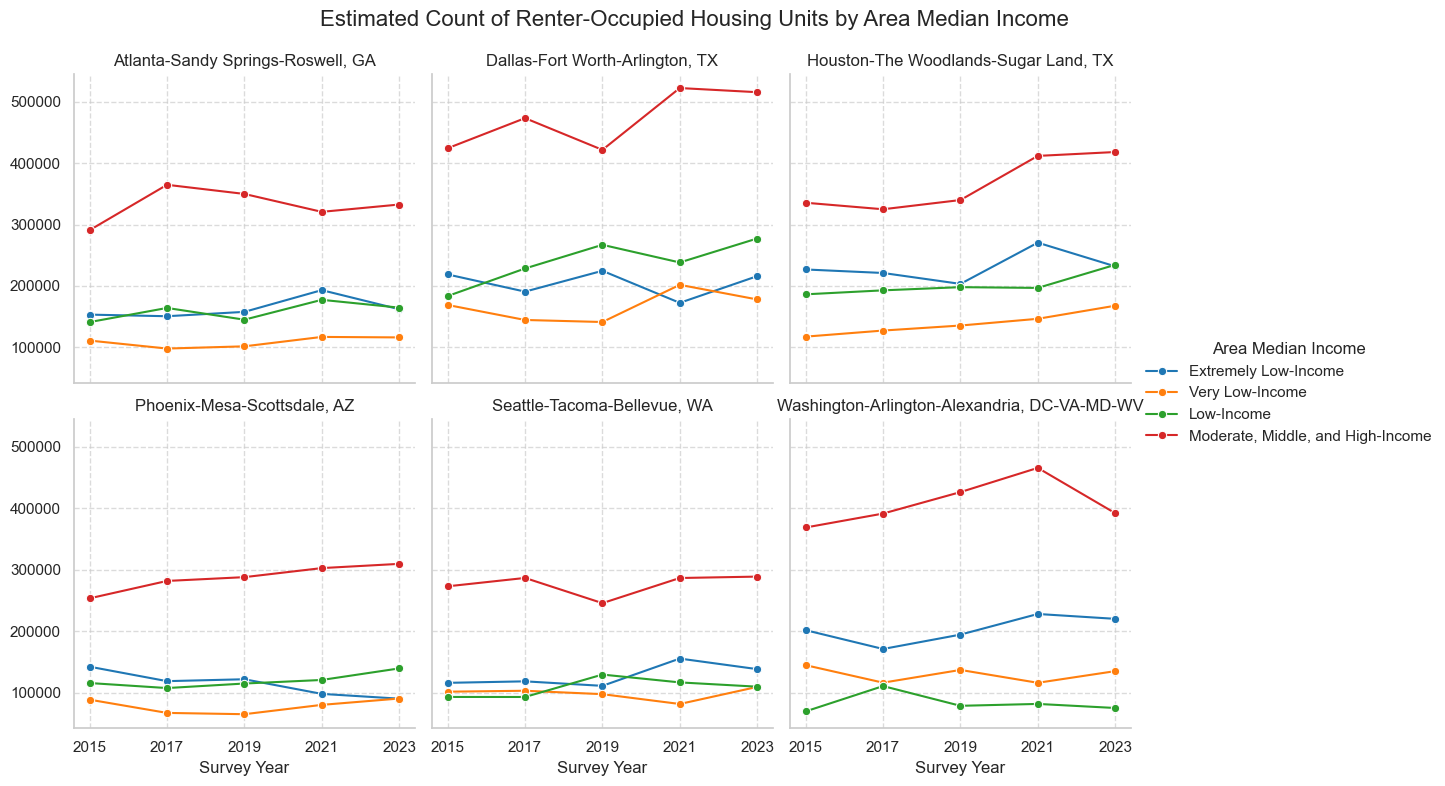

In [146]:
#Plot weighted share
g = sns.FacetGrid(
    ami_share,
    col='METRO',
    col_wrap=3,
    height=4,
    sharey=True,
    hue='AMI',
    hue_order=ami_order,
    palette='tab10'
)

g.map_dataframe(
    sns.lineplot, 
    x='SRVYEAR', 
    y='ami_weighted_count', 
    marker='o'
)

#Format plot axes and labels
g.add_legend(title="Area Median Income")
g.set_axis_labels('Survey Year', '')

#Set years
actual_years = [2015, 2017, 2019, 2021, 2023]
g.set(xticks=actual_years)

g.set_titles(col_template="{col_name}")
for ax in g.axes.flatten():
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)  

#Title and layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Estimated Count of Renter-Occupied Housing Units by Area Median Income', fontsize=16)

actual_years = [2015, 2017, 2019, 2021, 2023]
g.set(xticks=actual_years)

#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/estimated_count_renter_households_by_AMI_2.png', dpi=300, bbox_inches='tight')

#plt.tight_layout()
plt.show()

In [147]:
#Pivot table: Rows = Metro, Columns = SRVYEAR, Values = share (one table per AMI)
pivot_renter_count_ami = (
    ami_share.pivot(index='METRO', columns=['AMI','SRVYEAR'], values='ami_weighted_count')
             .sort_index(axis=1, level=[0,1])
)

#view pivot table
with pd.option_context('display.max_columns', None):
    display(pivot_renter_count_ami)  

AMI                                          Extremely Low-Income  \
SRVYEAR                                                      2015   
METRO                                                               
Atlanta-Sandy Springs-Roswell, GA                   153274.661403   
Dallas-Fort Worth-Arlington, TX                     218718.971192   
Houston-The Woodlands-Sugar Land, TX                226842.335543   
Phoenix-Mesa-Scottsdale, AZ                         142041.846919   
Seattle-Tacoma-Bellevue, WA                         115754.592685   
Washington-Arlington-Alexandria, DC-VA-MD-WV        201520.149657   

AMI                                                                         \
SRVYEAR                                                2017           2019   
METRO                                                                        
Atlanta-Sandy Springs-Roswell, GA             150677.371632  157772.670846   
Dallas-Fort Worth-Arlington, TX               190736.794539  224679.849162   
Houston-The Woodlands-Sugar Land, TX          221112.063739  203349.956448   
Phoenix-Mesa-Scottsdale, AZ                   118509.609256  121597.664656   
Seattle-Tacoma-Bellevue, WA                   118194.620672  110852.721765   
Washington-Arlington-Alexandria, DC-VA-MD-WV  170922.192629  194337.987092   

AMI                                                                         \
SRVYEAR                                                2021           2023   
METRO                                                                        
Atlanta-Sandy Springs-Roswell, GA             193185.808491  162120.909415   
Dallas-Fort Worth-Arlington, TX               172470.020607  215926.615196   
Houston-The Woodlands-Sugar Land, TX          270508.576068  231940.900619   
Phoenix-Mesa-Scottsdale, AZ                    97774.570045   89987.661019   
Seattle-Tacoma-Bellevue, WA                   155281.971708  138109.382498   
Washington-Arlington-Alexandria, DC-VA-MD-WV  227934.404284  220027.267528   

AMI                                          Very Low-Income                 \
SRVYEAR                                                 2015           2017   
METRO                                                                         
Atlanta-Sandy Springs-Roswell, GA              111010.645216   98004.076989   
Dallas-Fort Worth-Arlington, TX                168992.587222  144572.026533   
Houston-The Woodlands-Sugar Land, TX           117436.851545  127331.837736   
Phoenix-Mesa-Scottsdale, AZ                     88319.054682   66771.661168   
Seattle-Tacoma-Bellevue, WA                    101345.206901  102870.568778   
Washington-Arlington-Alexandria, DC-VA-MD-WV   144514.976439  116052.099327   

AMI                                                                         \
SRVYEAR                                                2019           2021   
METRO                                                                        
Atlanta-Sandy Springs-Roswell, GA             101635.069184  116946.278704   
Dallas-Fort Worth-Arlington, TX               141248.595119  201824.512073   
Houston-The Woodlands-Sugar Land, TX          135512.970604  146481.323443   
Phoenix-Mesa-Scottsdale, AZ                    64669.856771   79871.077035   
Seattle-Tacoma-Bellevue, WA                    97313.113773   81313.381441   
Washington-Arlington-Alexandria, DC-VA-MD-WV  136779.321917  115831.900421   

AMI                                                             Low-Income  \
SRVYEAR                                                2023           2015   
METRO                                                                        
Atlanta-Sandy Springs-Roswell, GA             116161.265183  141143.800227   
Dallas-Fort Worth-Arlington, TX               178024.316488  183577.879747   
Houston-The Woodlands-Sugar Land, TX          167771.302666  186364.482320   
Phoenix-Mesa-Scottsdale, AZ                    90190.230793  115427.988383   
Seattle-Tac

### 6(b). How has the weighted count changed using reported household income buckets?

In [148]:
#Creating new DataFrame to analyze changes in the count of renter-occupied housing units by hard-coded income buckets
renter_income_buckets_df = metro_ami_panel_df.loc[
    (metro_ami_panel_df['TENURE'] == '2') &
    (metro_ami_panel_df['OMB13CBSA'].isin(list(cbsa_ami_map.keys())))].copy() # mapping defined above for "supply cohort"
len(renter_income_buckets_df)

23791

In [149]:
#Defining valid income bin edges and labels
earn_bins   = np.array([-np.inf, 30_000, 60_000, 100_000, 150_000, np.inf], dtype=float)
earn_labels = [
    'Less than $30,000',
    '$30,000 - $60,000',
    '$60,000 - $100,000',
    '$100,000 - $150,000',
    'More than $150,000'
]
cat_dtype = pd.CategoricalDtype(categories=earn_labels, ordered=True)


#Binning so it ensures $0 and negatives go in the first bin)
renter_income_buckets_df['INCOME'] = pd.cut(
    renter_income_buckets_df['HINCP'],
    bins=earn_bins,
    labels=earn_labels,
    include_lowest=True,
    right=True
).astype(cat_dtype)

In [150]:
metro_order = [
    "Atlanta-Sandy Springs-Roswell, GA",
    "Dallas-Fort Worth-Arlington, TX",
    "Houston-The Woodlands-Sugar Land, TX",
    "Phoenix-Mesa-Scottsdale, AZ",
    "Seattle-Tacoma-Bellevue, WA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV"
]

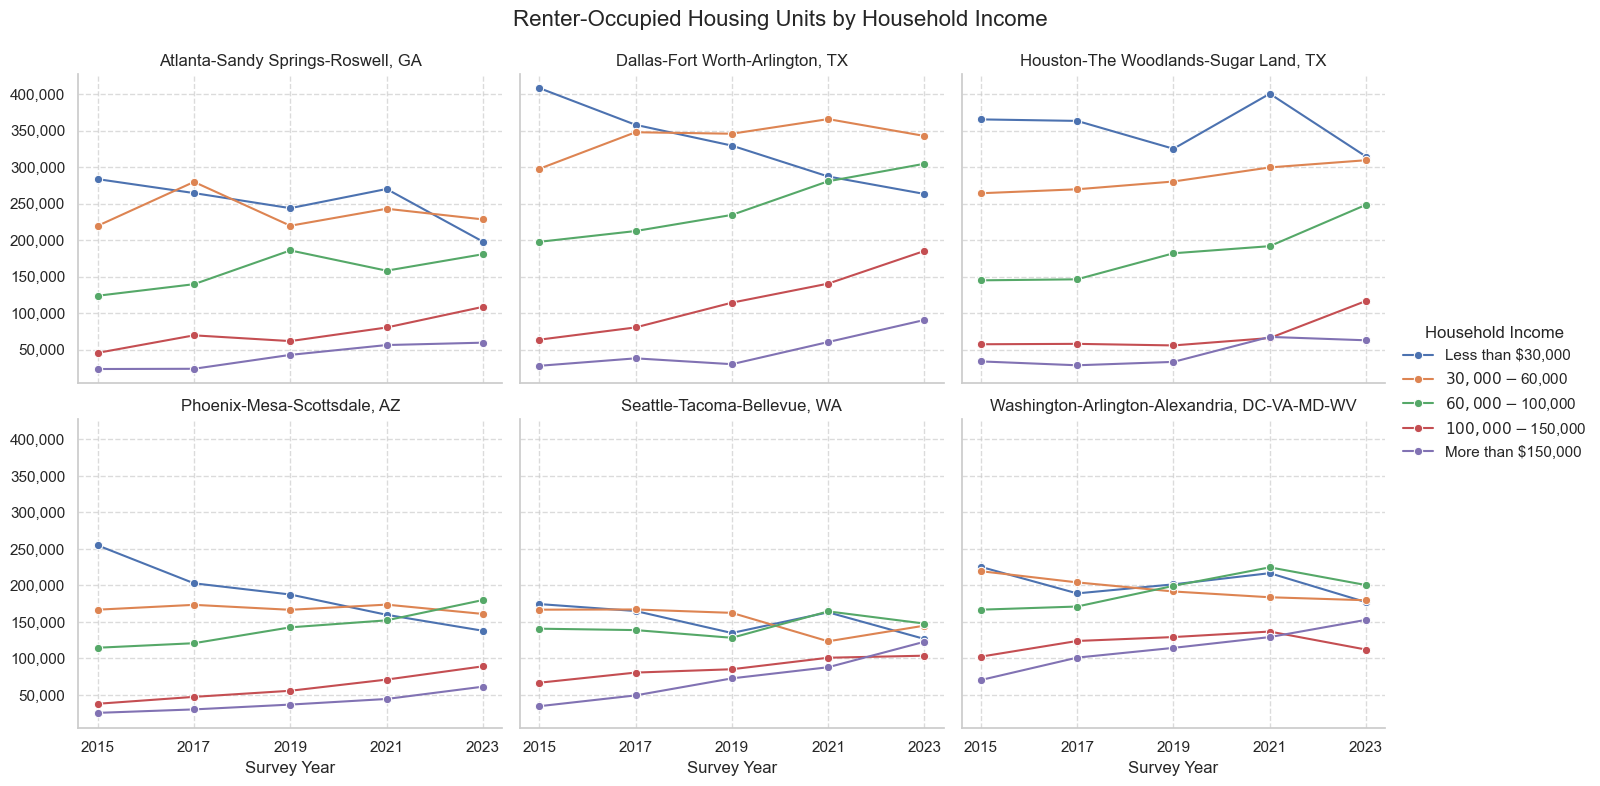

In [151]:
#Plotting
sns.set(style='whitegrid')
g = sns.FacetGrid(
    renter_income_buckets_df, col='METRO', col_wrap=3, col_order=metro_order, height=4, aspect=1.2,
    hue='INCOME', hue_order=earn_labels, sharey=True  \
)

g.map_dataframe(
    sns.lineplot,
    x='SRVYEAR', y='WEIGHT',
    estimator='sum',           # sum of weights in DataFrame (renter-occupied units)
    marker='o', errorbar=None
)

#Format plot axes and labels
g.add_legend(title="Household Income")
g.set_axis_labels('Survey Year', '')
g.set_titles(col_template="{col_name}")

# Format y-axis with commas + add grid
for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7) 

#Title and layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Renter-Occupied Housing Units by Household Income', fontsize=16)

actual_years = [2015, 2017, 2019, 2021, 2023]
g.set(xticks=actual_years)

#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/estimated_count_renter_households_by_income_2.png', dpi=300, bbox_inches='tight')

#plt.tight_layout()
plt.show()

In [152]:
# Create pivot table: Rows = Metro, Columns = Income Bucket x SRVYEAR, Values = Weighted Count
pivot_renter_count_income = (
    renter_income_buckets_df
    .pivot_table(
        index='METRO',
        columns=['INCOME', 'SRVYEAR'],
        values='WEIGHT',
        aggfunc='sum',
        fill_value=0,
        observed=True   
    )
    .sort_index(axis=1, level=[0, 1])  # Sort by income_bucket, then SRVYEAR
)

# View the result
with pd.option_context('display.float_format', '{:,.0f}'.format, 'display.max_columns', None):
    display(pivot_renter_count_income)

INCOME                                       Less than $30,000          \
SRVYEAR                                                   2015    2017   
METRO                                                                    
Atlanta-Sandy Springs-Roswell, GA                      283,636 264,558   
Dallas-Fort Worth-Arlington, TX                        408,429 358,068   
Houston-The Woodlands-Sugar Land, TX                   365,484 363,419   
Phoenix-Mesa-Scottsdale, AZ                            254,793 202,843   
Seattle-Tacoma-Bellevue, WA                            174,390 164,890   
Washington-Arlington-Alexandria, DC-VA-MD-WV           225,343 189,010   

INCOME                                                                \
SRVYEAR                                         2019    2021    2023   
METRO                                                                  
Atlanta-Sandy Springs-Roswell, GA            243,873 270,149 198,028   
Dallas-Fort Worth-Arlington, TX              329,580 287,263 263,350   
Houston-The Woodlands-Sugar Land, TX         325,243 400,664 314,567   
Phoenix-Mesa-Scottsdale, AZ                  187,489 159,707 137,846   
Seattle-Tacoma-Bellevue, WA                  134,754 163,093 126,579   
Washington-Arlington-Alexandria, DC-VA-MD-WV 201,405 216,738 176,972   

INCOME                                       $30,000 - $60,000          \
SRVYEAR                                                   2015    2017   
METRO                                                                    
Atlanta-Sandy Springs-Roswell, GA                      219,715 279,834   
Dallas-Fort Worth-Arlington, TX                        297,785 347,898   
Houston-The Woodlands-Sugar Land, TX                   264,317 269,759   
Phoenix-Mesa-Scottsdale, AZ                            166,709 173,327   
Seattle-Tacoma-Bellevue, WA                            166,711 166,989   
Washington-Arlington-Alexandria, DC-VA-MD-WV           219,433 204,087   

INCOME                                                                \
SRVYEAR                                         2019    2021    2023   
METRO                                                                  
Atlanta-Sandy Springs-Roswell, GA            219,809 243,086 228,476   
Dallas-Fort Worth-Arlington, TX              345,853 365,888 342,785   
Houston-The Woodlands-Sugar Land, TX         280,396 299,690 309,557   
Phoenix-Mesa-Scottsdale, AZ                  166,532 173,631 160,864   
Seattle-Tacoma-Bellevue, WA                  162,343 123,390 144,855   
Washington-Arlington-Alexandria, DC-VA-MD-WV 191,633 183,719 179,631   

INCOME                                       $60,000 - $100,000          \
SRVYEAR                                                    2015    2017   
METRO                                                                     
Atlanta-Sandy Springs-Roswell, GA                       123,886 139,725   
Dallas-Fort Worth-Arlington, TX                         197,775 212,527   
Houston-The Woodlands-Sugar Land, TX                    145,005 146,394   
Phoenix-Mesa-Scottsdale, AZ                             114,576 120,769   
Seattle-Tacoma-Bellevue, WA                             140,668 138,747   
Washington-Arlington-Alexandria, DC-VA-MD-WV            166,701 171,021   

INCOME                                                                \
SRVYEAR                                         2019    2021    2023   
METRO                                                                  
Atlanta-Sandy Springs-Roswell, GA            185,989 158,237 180,792   
Dallas-Fort Worth-Arlington, TX              234,640 280,754 304,718   
Houston-The Woodlands-Sugar Land, TX         182,078 191,810 248,522   
Phoenix-Mesa-Scottsdale, AZ                  142,505 152,113 179,922   
Seattle-Tacoma-Bellevue, WA                  128,200 164,382 147,661   
Washington-Arlington-Alexandria, DC-VA-MD-WV 199,325 224,725 200,409   

INCOME                                     

## 7. Changes in rent for renter-occupied households of market-rate units (i.e., unsubsidized, not income-restricted housing)
    - How have rents changed for units occupied by unassisted lower-income households (<= 80% AMI) in relation to units occupied by higher-income households (>80 AMI)? 
    - What is the percent change of rent for renter occupied units in each income group over time (2015-2023)?
    - Are rent increases higher for ELI, VLI, or LI renter-occupied units than for units occupied by higher-income renters?
    - How has rents growth occured for ELI, VLI, LI renter-occupied units in relation to one another using 2015 as a baseline (cumulative growth)?

In [153]:
#Filter to unassisted renter households in market-rate units
unassisted_df = renter_df.loc[
    (renter_df['HUDSUB'] == '3') &
    (renter_df['RENTSUB'] == '8'), #Limiting sample/analysis to observations that explicitly reported no rental subsidy or reduction
    ['OMB13CBSA', 'SRVYEAR', 'RENT', 'RENT_INFLTN_ADJ', 'AMI', 'WEIGHT']
].copy()

In [154]:
#Map CBSA codes to metro names
unassisted_df['METRO'] = unassisted_df['OMB13CBSA'].map(supply_cbsa_mapping())
unassisted_df = unassisted_df.dropna(subset=['METRO'])

### 7(a). How have rents changed for units occupied by unassisted lower-income households (<= 80% AMI) in relation to units occupied by higher-income households (>80 AMI)?

In [155]:
#Calculate weighted average rent disaggregated by AMI and SRVYEAR
weighted_avg_rent_df = weighted_mean_by_group(unassisted_df, ['METRO', 'AMI','SRVYEAR'], 'RENT')

In [156]:
#Set AMI order
ami_order = ['Extremely Low-Income', 'Very Low-Income', 'Low-Income', 'Moderate, Middle, and High-Income']
weighted_avg_rent_df['AMI'] = pd.Categorical(weighted_avg_rent_df['AMI'], categories=ami_order, ordered=True)

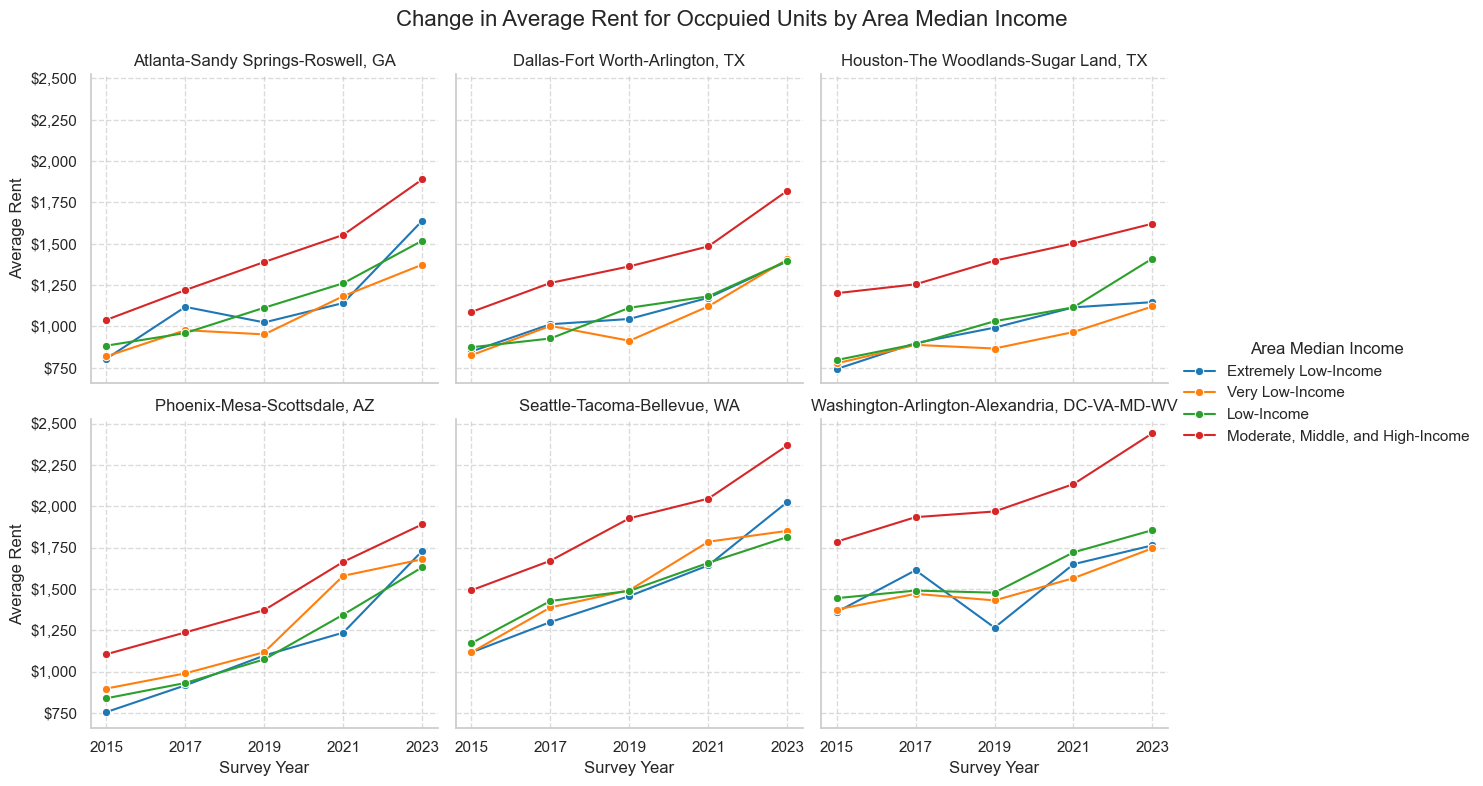

In [157]:
#Plot
g = sns.FacetGrid(
    weighted_avg_rent_df, 
    col='METRO', 
    col_wrap=3, 
    height=4, 
    sharey=True,
    hue='AMI',
    palette='tab10'
)

g.map_dataframe(sns.lineplot, x='SRVYEAR', y='RENT_weighted_mean', marker='o')
g.set_titles("{col_name}")

# Set consistent axis labels
g.add_legend(title="Area Median Income")
g.set_axis_labels("Survey Year", "Average Rent")

# Set consistent x-ticks (for AHS: 2017, 2019, 2021, 2023)
for ax in g.axes.flat:
    ax.set_xticks([2015, 2017, 2019, 2021, 2023])
    ax.set_xticklabels([2015, 2017, 2019, 2021, 2023])
    
    # Add grid
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)
    
    # Format y-axis with dollar signs + commas
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

#Title and layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Change in Average Rent for Occpuied Units by Area Median Income', fontsize=16)

#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/weighted_avg_rent_change_AMI.png', dpi=300, bbox_inches='tight')

plt.show()

#### Inflation Adjusted Analysis

In [158]:
#Calculate weighted average rent disaggregated by AMI and SRVYEAR adjusted for inflation 
weighted_avg_rent_infl_df = weighted_mean_by_group(unassisted_df, ['METRO', 'AMI','SRVYEAR'], 'RENT_INFLTN_ADJ')

In [159]:
#Set AMI order
ami_order = ['Extremely Low-Income', 'Very Low-Income', 'Low-Income', 'Moderate, Middle, and High-Income']
weighted_avg_rent_infl_df['AMI'] = pd.Categorical(weighted_avg_rent_infl_df['AMI'], categories=ami_order, ordered=True)

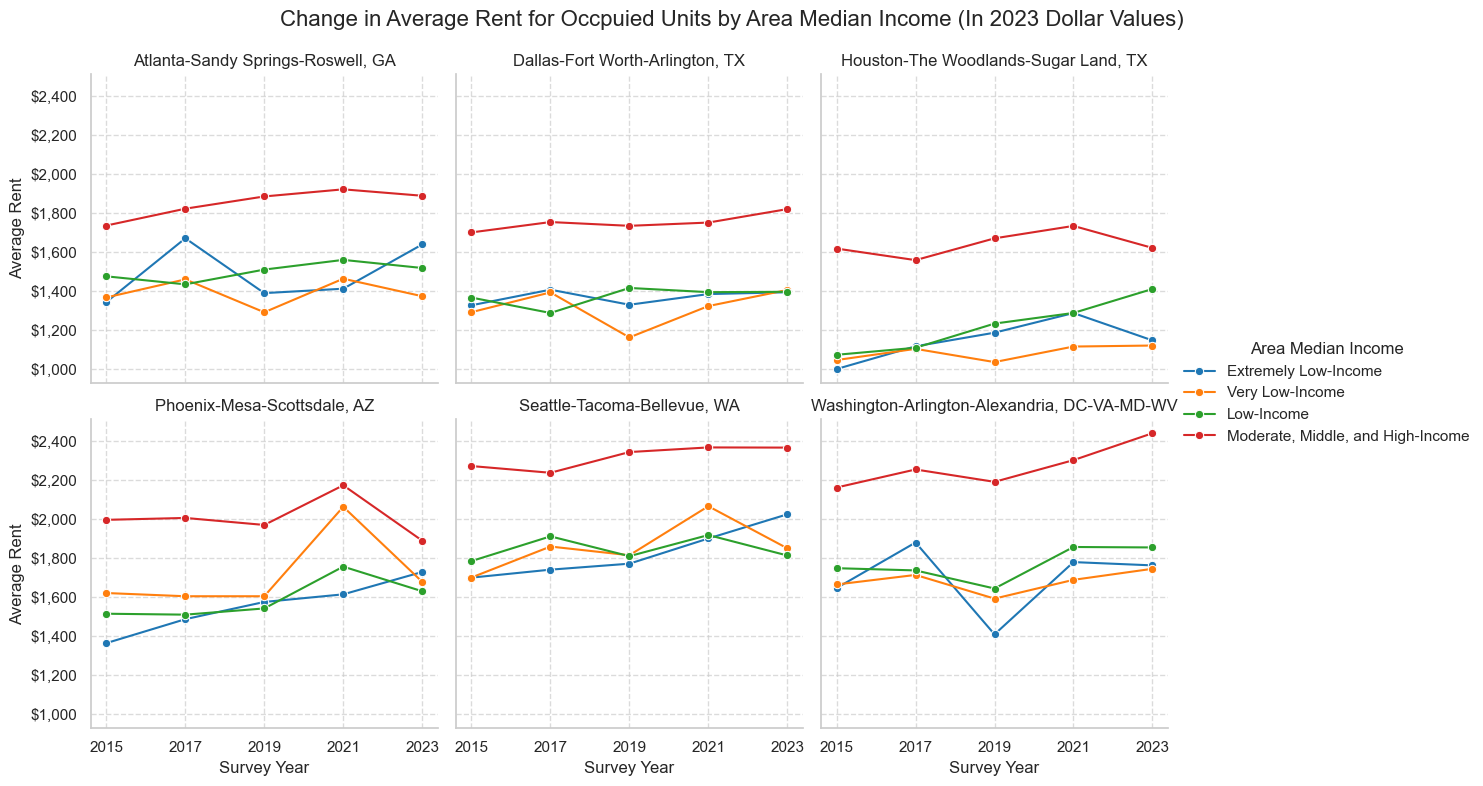

In [160]:
#Plot
g = sns.FacetGrid(
    weighted_avg_rent_infl_df, 
    col='METRO', 
    col_wrap=3, 
    height=4, 
    sharey=True,
    hue='AMI',
    palette='tab10'
)

g.map_dataframe(sns.lineplot, x='SRVYEAR', y='RENT_INFLTN_ADJ_weighted_mean', marker='o')
g.set_titles("{col_name}")

# Set consistent axis labels
g.add_legend(title="Area Median Income")
g.set_axis_labels("Survey Year", "Average Rent")

# Set consistent x-ticks (for AHS: 2017, 2019, 2021, 2023)
for ax in g.axes.flat:
    ax.set_xticks([2015, 2017, 2019, 2021, 2023])
    ax.set_xticklabels([2015, 2017, 2019, 2021, 2023])
    
    # Add grid
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)
    
    # Format y-axis with dollar signs + commas
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

#Title and layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Change in Average Rent for Occpuied Units by Area Median Income (In 2023 Dollar Values)', fontsize=16)


#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/weighted_avg_rent_change_INFLTN_ADJ_AMI_3.png', dpi=300, bbox_inches='tight')

plt.show()

In [161]:
#Pivot so that you see Metro rows and SRVYEAR/AMI
avg_rent_change_ami_table = (
    weighted_avg_rent_infl_df
    .pivot_table(index='METRO',
                 columns=['SRVYEAR', 'AMI'],
                 values='RENT_INFLTN_ADJ_weighted_mean',
                 observed=True)
)

# Optional: sort columns for readability
avg_rent_change_ami_table = avg_rent_change_ami_table.sort_index(axis=1)

# View the result
with pd.option_context('display.float_format', '{:,.0f}'.format, 'display.max_columns', None):
    display(avg_rent_change_ami_table)

SRVYEAR                                                      2015  \
AMI                                          Extremely Low-Income   
METRO                                                               
Atlanta-Sandy Springs-Roswell, GA                           1,344   
Dallas-Fort Worth-Arlington, TX                             1,328   
Houston-The Woodlands-Sugar Land, TX                        1,000   
Phoenix-Mesa-Scottsdale, AZ                                 1,365   
Seattle-Tacoma-Bellevue, WA                                 1,701   
Washington-Arlington-Alexandria, DC-VA-MD-WV                1,648   

SRVYEAR                                                                  \
AMI                                          Very Low-Income Low-Income   
METRO                                                                     
Atlanta-Sandy Springs-Roswell, GA                      1,368      1,476   
Dallas-Fort Worth-Arlington, TX                        1,292      1,367   
Houston-The Woodlands-Sugar Land, TX                   1,046      1,073   
Phoenix-Mesa-Scottsdale, AZ                            1,622      1,516   
Seattle-Tacoma-Bellevue, WA                            1,702      1,786   
Washington-Arlington-Alexandria, DC-VA-MD-WV           1,666      1,750   

SRVYEAR                                                                         \
AMI                                          Moderate, Middle, and High-Income   
METRO                                                                            
Atlanta-Sandy Springs-Roswell, GA                                        1,737   
Dallas-Fort Worth-Arlington, TX                                          1,701   
Houston-The Woodlands-Sugar Land, TX                                     1,618   
Phoenix-Mesa-Scottsdale, AZ                                              1,998   
Seattle-Tacoma-Bellevue, WA                                              2,274   
Washington-Arlington-Alexandria, DC-VA-MD-WV                             2,164   

SRVYEAR                                                      2017  \
AMI                                          Extremely Low-Income   
METRO                                                               
Atlanta-Sandy Springs-Roswell, GA                           1,671   
Dallas-Fort Worth-Arlington, TX                             1,408   
Houston-The Woodlands-Sugar Land, TX                        1,117   
Phoenix-Mesa-Scottsdale, AZ                                 1,488   
Seattle-Tacoma-Bellevue, WA                                 1,742   
Washington-Arlington-Alexandria, DC-VA-MD-WV                1,881   

SRVYEAR                                                                  \
AMI                                          Very Low-Income Low-Income   
METRO                                                                     
Atlanta-Sandy Springs-Roswell, GA                      1,460      1,435   
Dallas-Fort Worth-Arlington, TX                        1,394      1,288   
Houston-The Woodlands-Sugar Land, TX                   1,104      1,109   
Phoenix-Mesa-Scottsdale, AZ                            1,606      1,511   
Seattle-Tacoma-Bellevue, WA                            1,861      1,913   
Washington-Arlington-Alexandria, DC-VA-MD-WV           1,715      1,738   

SRVYEAR                                                                         \
AMI                                          Moderate, Middle, and High-Income   
METRO                                                                            
Atlanta-Sandy Springs-Roswell, GA                                        1,823   
Dallas-Fort Worth-Arlington, TX                                          1,755   
Houston-The Woodlands-Sugar Land, TX                                     1,559   
Phoenix-Mesa-Scottsdale, AZ                                              2,007   
Seattle-Tacoma-Bellevue, WA                                              2,239   
Washingto

### 7(b). What is the percent change of rent for renter occupied units in each income group over time (2015-2023)?

In [162]:
#Calculate the percent change in average rents and aggregate by AMI and metropolitan area
weighted_avg_rent_df['rent_pct_change'] = (
    weighted_avg_rent_df
    .groupby(['METRO','AMI'], observed=False, sort=False)['RENT_weighted_mean']
    .pct_change()
    .mul(100)
    .round(2)
    .fillna(0) # this sets 2015 at zero
)

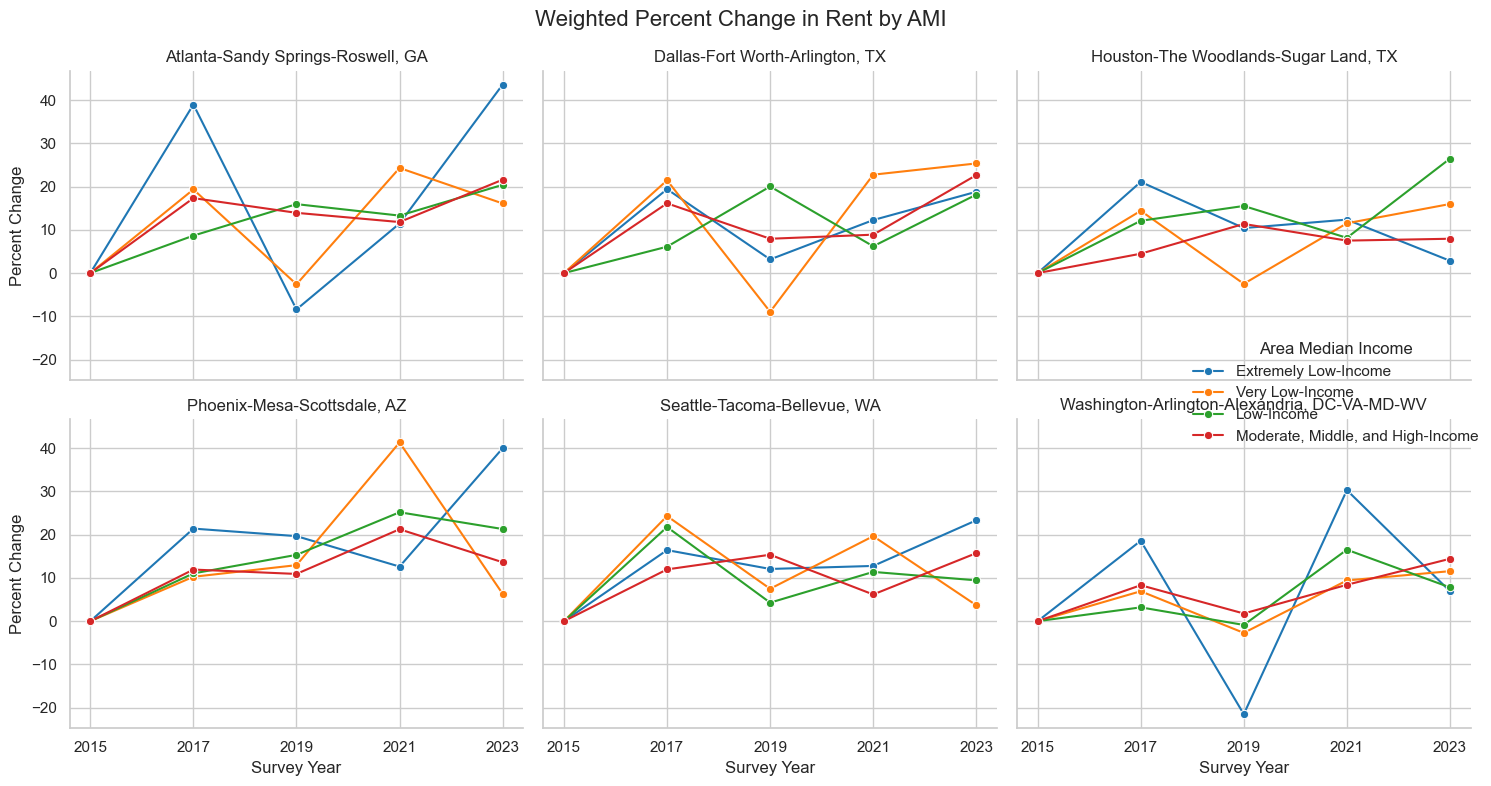

In [163]:
#Plot
g = sns.FacetGrid(
    weighted_avg_rent_df, 
    col='METRO', 
    col_wrap=3, 
    height=4, 
    sharey=True,
    hue='AMI',
    palette='tab10'
)

g.map_dataframe(sns.lineplot, x='SRVYEAR', y='rent_pct_change', marker='o')
g.set_titles("{col_name}")

#Set consistent axis labels
g.add_legend(title="Area Median Income")
g.set_axis_labels("Survey Year", "Percent Change")

#Set consistent x-ticks (for AHS: 2017, 2019, 2021, 2023)
for ax in g.axes.flat:
    ax.set_xticks([2015, 2017, 2019, 2021, 2023])
    ax.set_xticklabels([2015, 2017, 2019, 2021, 2023])

#Title and layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Weighted Percent Change in Rent by AMI', fontsize=16)
plt.tight_layout()

#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/weighted_percent_rent_change_AMI.png', dpi=300, bbox_inches='tight')

plt.show()

In [164]:
#Checking DataFrame
weighted_avg_rent_df[['AMI', 'SRVYEAR', 'METRO', 'RENT_weighted_mean', 'rent_pct_change']]

with pd.option_context('display.max_rows', None):
    display(weighted_avg_rent_df)  

METRO  \
0               Atlanta-Sandy Springs-Roswell, GA   
1               Atlanta-Sandy Springs-Roswell, GA   
2               Atlanta-Sandy Springs-Roswell, GA   
3               Atlanta-Sandy Springs-Roswell, GA   
4               Atlanta-Sandy Springs-Roswell, GA   
5               Atlanta-Sandy Springs-Roswell, GA   
6               Atlanta-Sandy Springs-Roswell, GA   
7               Atlanta-Sandy Springs-Roswell, GA   
8               Atlanta-Sandy Springs-Roswell, GA   
9               Atlanta-Sandy Springs-Roswell, GA   
10              Atlanta-Sandy Springs-Roswell, GA   
11              Atlanta-Sandy Springs-Roswell, GA   
12              Atlanta-Sandy Springs-Roswell, GA   
13              Atlanta-Sandy Springs-Roswell, GA   
14              Atlanta-Sandy Springs-Roswell, GA   
15              Atlanta-Sandy Springs-Roswell, GA   
16              Atlanta-Sandy Springs-Roswell, GA   
17              Atlanta-Sandy Springs-Roswell, GA   
18              Atlanta-Sandy Springs-Roswell, GA   
19              Atlanta-Sandy Springs-Roswell, GA   
20                Dallas-Fort Worth-Arlington, TX   
21                Dallas-Fort Worth-Arlington, TX   
22                Dallas-Fort Worth-Arlington, TX   
23                Dallas-Fort Worth-Arlington, TX   
24                Dallas-Fort Worth-Arlington, TX   
25                Dallas-Fort Worth-Arlington, TX   
26                Dallas-Fort Worth-Arlington, TX   
27                Dallas-Fort Worth-Arlington, TX   
28                Dallas-Fort Worth-Arlington, TX   
29                Dallas-Fort Worth-Arlington, TX   
30                Dallas-Fort Worth-Arlington, TX   
31                Dallas-Fort Worth-Arlington, TX   
32                Dallas-Fort Worth-Arlington, TX   
33                Dallas-Fort Worth-Arlington, TX   
34                Dallas-Fort Worth-Arlington, TX   
35                Dallas-Fort Worth-Arlington, TX   
36                Dallas-Fort Worth-Arlington, TX   
37                Dallas-Fort Worth-Arlington, TX   
38                Dallas-Fort Worth-Arlington, TX   
39                Dallas-Fort Worth-Arlington, TX   
40           Houston-The Woodlands-Sugar Land, TX   
41           Houston-The Woodlands-Sugar Land, TX   
42           Houston-The Woodlands-Sugar Land, TX   
43           Houston-The Woodlands-Sugar Land, TX   
44           Houston-The Woodlands-Sugar Land, TX   
45           Houston-The Woodlands-Sugar Land, TX   
46           Houston-The Woodlands-Sugar Land, TX   
47           Houston-The Woodlands-Sugar Land, TX   
48           Houston-The Woodlands-Sugar Land, TX   
49           Houston-The Woodlands-Sugar Land, TX   
50           Houston-The Woodlands-Sugar Land, TX   
51           Houston-The Woodlands-Sugar Land, TX   
52           Houston-The Woodlands-Sugar Land, TX   
53           Houston-The Woodlands-Sugar Land, TX   
54           Houston-The Woodlands-Sugar Land, TX   
55           Houston-The Woodlands-Sugar Land, TX   
56           Houston-The Woodlands-Sugar Land, TX   
57           Houston-The Woodlands-Sugar Land, TX   
58           Houston-The Woodlands-Sugar Land, TX   
59           Houston-The Woodlands-Sugar Land, TX   
60                    Phoenix-Mesa-Scottsdale, AZ   
61                    Phoenix-Mesa-Scottsdale, AZ   
62                    Phoenix-Mesa-Scottsdale, AZ   
63                    Phoenix-Mesa-Scottsdale, AZ   
64                    Phoenix-Mesa-Scottsdale, AZ   
65                    Phoenix-Mesa-Scottsdale, AZ   
66                    Phoenix-Mesa-Scottsdale, AZ   
67                    Phoenix-Mesa-Scottsdale, AZ   
68                    Phoenix-Mesa-Scottsdale, AZ   
69                    Phoenix-Mesa-Scottsdale, AZ   
70                    Phoenix-Mesa-Scottsdale, AZ   
71                    Phoenix-Mesa-Scottsdale, AZ   
72                    Phoenix-Mesa-Scottsdale, AZ   
73                    Phoenix-Mesa-Scottsdale, AZ   
74                    Phoenix-Mesa-Scottsdale, AZ   
75              

### Inflation Adjusted Analysis

In [165]:
#Calculate the percent change in average rents and aggregate by AMI and metropolitan area
weighted_avg_rent_infl_df['rent_infl_pct_change'] = (
    weighted_avg_rent_infl_df
    .groupby(['METRO','AMI'], observed=False, sort=False)['RENT_INFLTN_ADJ_weighted_mean']
    .pct_change()
    .mul(100)
    .round(2)
    .fillna(0) # this sets 2015 at zero
)

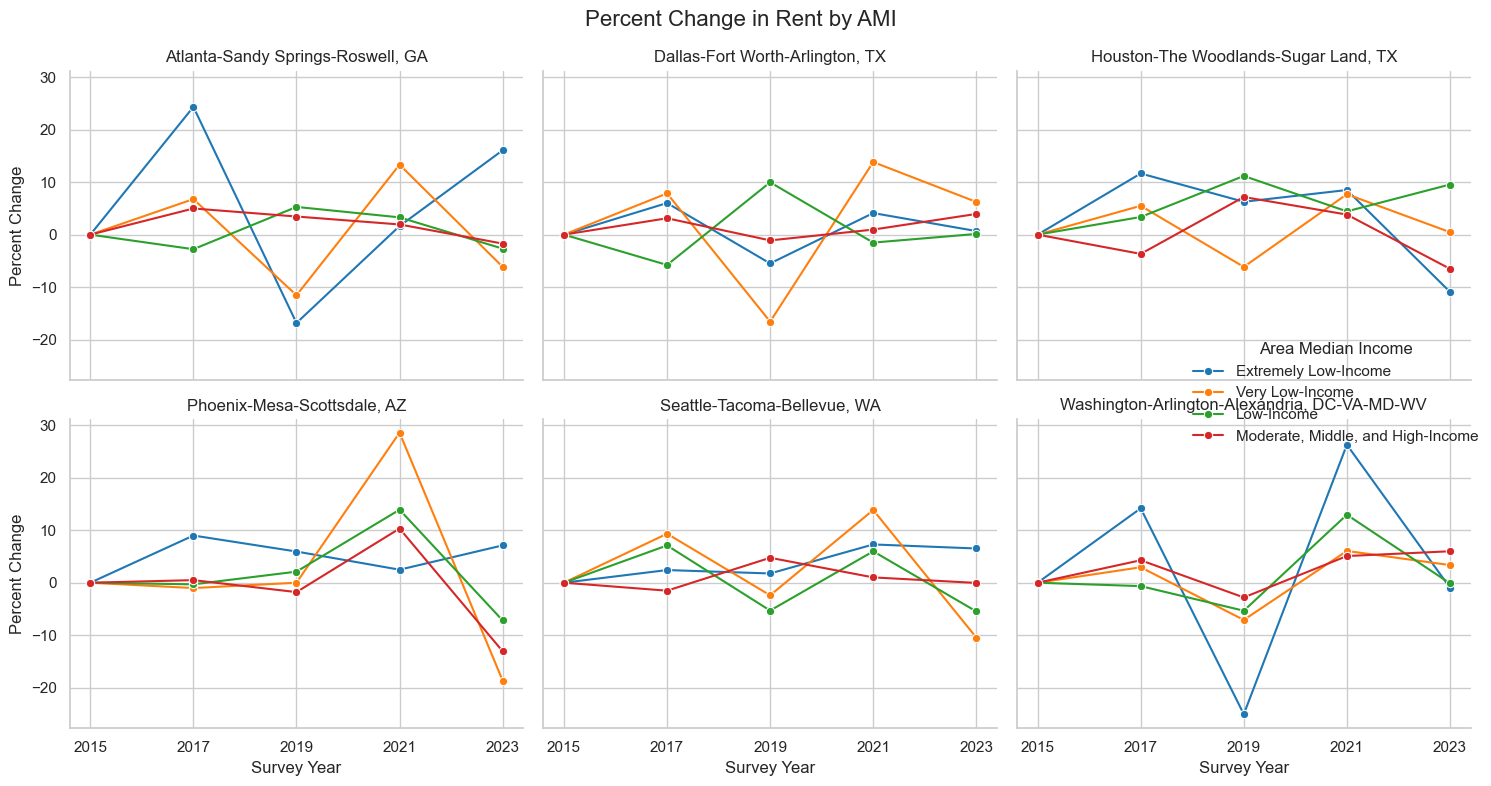

In [166]:
#Plot
g = sns.FacetGrid(
    weighted_avg_rent_infl_df, 
    col='METRO', 
    col_wrap=3, 
    height=4, 
    sharey=True,
    hue='AMI',
    palette='tab10'
)

g.map_dataframe(sns.lineplot, x='SRVYEAR', y='rent_infl_pct_change', marker='o')
g.set_titles("{col_name}")

# Set consistent axis labels
g.add_legend(title="Area Median Income")
g.set_axis_labels("Survey Year", "Percent Change")

# Set consistent x-ticks (for AHS: 2017, 2019, 2021, 2023)
for ax in g.axes.flat:
    ax.set_xticks([2015, 2017, 2019, 2021, 2023])
    ax.set_xticklabels([2015, 2017, 2019, 2021, 2023])


#Title and layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Percent Change in Rent by AMI', fontsize=16)
plt.tight_layout()

#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/weighted_percent_rent_change_INFLN_ADJ_AMI.png', dpi=300, bbox_inches='tight')

plt.show()

In [167]:
#Checking DataFrame
weighted_avg_rent_infl_df[['AMI', 'SRVYEAR', 'METRO', 'RENT_INFLTN_ADJ_weighted_mean', 'rent_infl_pct_change']]

with pd.option_context('display.max_rows', None):
    display(weighted_avg_rent_infl_df)  

METRO  \
0               Atlanta-Sandy Springs-Roswell, GA   
1               Atlanta-Sandy Springs-Roswell, GA   
2               Atlanta-Sandy Springs-Roswell, GA   
3               Atlanta-Sandy Springs-Roswell, GA   
4               Atlanta-Sandy Springs-Roswell, GA   
5               Atlanta-Sandy Springs-Roswell, GA   
6               Atlanta-Sandy Springs-Roswell, GA   
7               Atlanta-Sandy Springs-Roswell, GA   
8               Atlanta-Sandy Springs-Roswell, GA   
9               Atlanta-Sandy Springs-Roswell, GA   
10              Atlanta-Sandy Springs-Roswell, GA   
11              Atlanta-Sandy Springs-Roswell, GA   
12              Atlanta-Sandy Springs-Roswell, GA   
13              Atlanta-Sandy Springs-Roswell, GA   
14              Atlanta-Sandy Springs-Roswell, GA   
15              Atlanta-Sandy Springs-Roswell, GA   
16              Atlanta-Sandy Springs-Roswell, GA   
17              Atlanta-Sandy Springs-Roswell, GA   
18              Atlanta-Sandy Springs-Roswell, GA   
19              Atlanta-Sandy Springs-Roswell, GA   
20                Dallas-Fort Worth-Arlington, TX   
21                Dallas-Fort Worth-Arlington, TX   
22                Dallas-Fort Worth-Arlington, TX   
23                Dallas-Fort Worth-Arlington, TX   
24                Dallas-Fort Worth-Arlington, TX   
25                Dallas-Fort Worth-Arlington, TX   
26                Dallas-Fort Worth-Arlington, TX   
27                Dallas-Fort Worth-Arlington, TX   
28                Dallas-Fort Worth-Arlington, TX   
29                Dallas-Fort Worth-Arlington, TX   
30                Dallas-Fort Worth-Arlington, TX   
31                Dallas-Fort Worth-Arlington, TX   
32                Dallas-Fort Worth-Arlington, TX   
33                Dallas-Fort Worth-Arlington, TX   
34                Dallas-Fort Worth-Arlington, TX   
35                Dallas-Fort Worth-Arlington, TX   
36                Dallas-Fort Worth-Arlington, TX   
37                Dallas-Fort Worth-Arlington, TX   
38                Dallas-Fort Worth-Arlington, TX   
39                Dallas-Fort Worth-Arlington, TX   
40           Houston-The Woodlands-Sugar Land, TX   
41           Houston-The Woodlands-Sugar Land, TX   
42           Houston-The Woodlands-Sugar Land, TX   
43           Houston-The Woodlands-Sugar Land, TX   
44           Houston-The Woodlands-Sugar Land, TX   
45           Houston-The Woodlands-Sugar Land, TX   
46           Houston-The Woodlands-Sugar Land, TX   
47           Houston-The Woodlands-Sugar Land, TX   
48           Houston-The Woodlands-Sugar Land, TX   
49           Houston-The Woodlands-Sugar Land, TX   
50           Houston-The Woodlands-Sugar Land, TX   
51           Houston-The Woodlands-Sugar Land, TX   
52           Houston-The Woodlands-Sugar Land, TX   
53           Houston-The Woodlands-Sugar Land, TX   
54           Houston-The Woodlands-Sugar Land, TX   
55           Houston-The Woodlands-Sugar Land, TX   
56           Houston-The Woodlands-Sugar Land, TX   
57           Houston-The Woodlands-Sugar Land, TX   
58           Houston-The Woodlands-Sugar Land, TX   
59           Houston-The Woodlands-Sugar Land, TX   
60                    Phoenix-Mesa-Scottsdale, AZ   
61                    Phoenix-Mesa-Scottsdale, AZ   
62                    Phoenix-Mesa-Scottsdale, AZ   
63                    Phoenix-Mesa-Scottsdale, AZ   
64                    Phoenix-Mesa-Scottsdale, AZ   
65                    Phoenix-Mesa-Scottsdale, AZ   
66                    Phoenix-Mesa-Scottsdale, AZ   
67                    Phoenix-Mesa-Scottsdale, AZ   
68                    Phoenix-Mesa-Scottsdale, AZ   
69                    Phoenix-Mesa-Scottsdale, AZ   
70                    Phoenix-Mesa-Scottsdale, AZ   
71                    Phoenix-Mesa-Scottsdale, AZ   
72                    Phoenix-Mesa-Scottsdale, AZ   
73                    Phoenix-Mesa-Scottsdale, AZ   
74                    Phoenix-Mesa-Scottsdale, AZ   
75              

### 7(d). Are rent increases higher for ELI, VLI, or LI renter-occupied units than for units occupied by higher-income renters? How has rents growth occured for ELI, VLI, LI renter-occupied units in relation to one another using 2015 as a baseline (cumulative growth)?

In [168]:
#Calculate baseline rent (2015) for each Metro–AMI
base_rent = (
    weighted_avg_rent_df[weighted_avg_rent_df['SRVYEAR'] == 2015]
    .set_index(['METRO', 'AMI'])['RENT_weighted_mean']
    .rename('base_rent')
)

In [169]:
#Merge base_rent into full dataframe
weighted_avg_rent_df = weighted_avg_rent_df.merge(base_rent, on=['METRO', 'AMI'], how='left')

In [170]:
#Calculate cumulative rent change relative to 2015
weighted_avg_rent_df['cumulative_rent_change'] = (
    (weighted_avg_rent_df['RENT_weighted_mean'] / weighted_avg_rent_df['base_rent']) - 1
) * 100

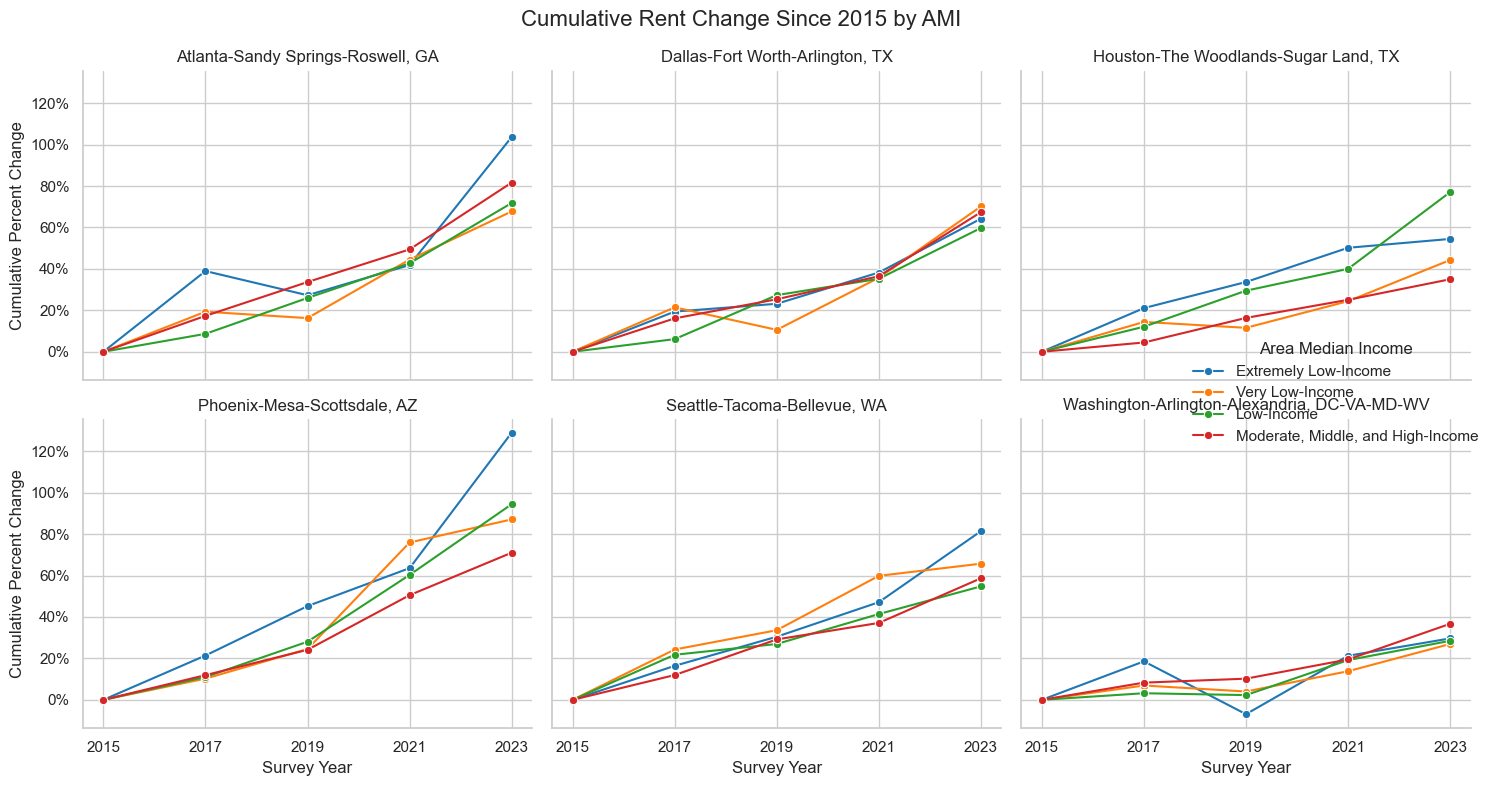

In [171]:
#Plot
sns.set(style="whitegrid")

g = sns.FacetGrid(
    weighted_avg_rent_df,
    col='METRO',
    col_wrap=3,
    height=4,
    sharey=True,
    hue='AMI',
    palette='tab10'
)

g.map_dataframe(
    sns.lineplot,
    x='SRVYEAR',
    y='cumulative_rent_change',
    marker='o'
)

g.add_legend(title="Area Median Income")
g.set_axis_labels("Survey Year", "Cumulative Percent Change")
g.set_titles("{col_name}")
g.set(xticks=[2015, 2017, 2019, 2021, 2023])

#Format y-axis as percentage
for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(PercentFormatter(1.0 if weighted_avg_rent_df['cumulative_rent_change'].max() < 1 else 100))

#Add overall title
g.fig.suptitle("Cumulative Rent Change Since 2015 by AMI", fontsize=16)
plt.subplots_adjust(top=0.92, bottom=0.08)
plt.tight_layout()

#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/cumulative_rent_change.png', dpi=300, bbox_inches='tight')

plt.show()

#### Inflation Adjusted Analysis

In [172]:
#Calculate baseline rent (2015) for each Metro–AMI
base_rent_infl = (
    weighted_avg_rent_infl_df[weighted_avg_rent_infl_df['SRVYEAR'] == 2015]
    .set_index(['METRO', 'AMI'])['RENT_INFLTN_ADJ_weighted_mean']
    .rename('base_rent_infl')
)

In [173]:
#Merge base_rent into full dataframe
weighted_avg_rent_infl_df = weighted_avg_rent_infl_df.merge(base_rent_infl, on=['METRO', 'AMI'], how='left')

In [174]:
#Calculate cumulative rent change relative to 2015
weighted_avg_rent_infl_df['cumulative_rent_infl_change'] = (
    (weighted_avg_rent_infl_df['RENT_INFLTN_ADJ_weighted_mean'] / weighted_avg_rent_infl_df['base_rent_infl']) - 1
) * 100

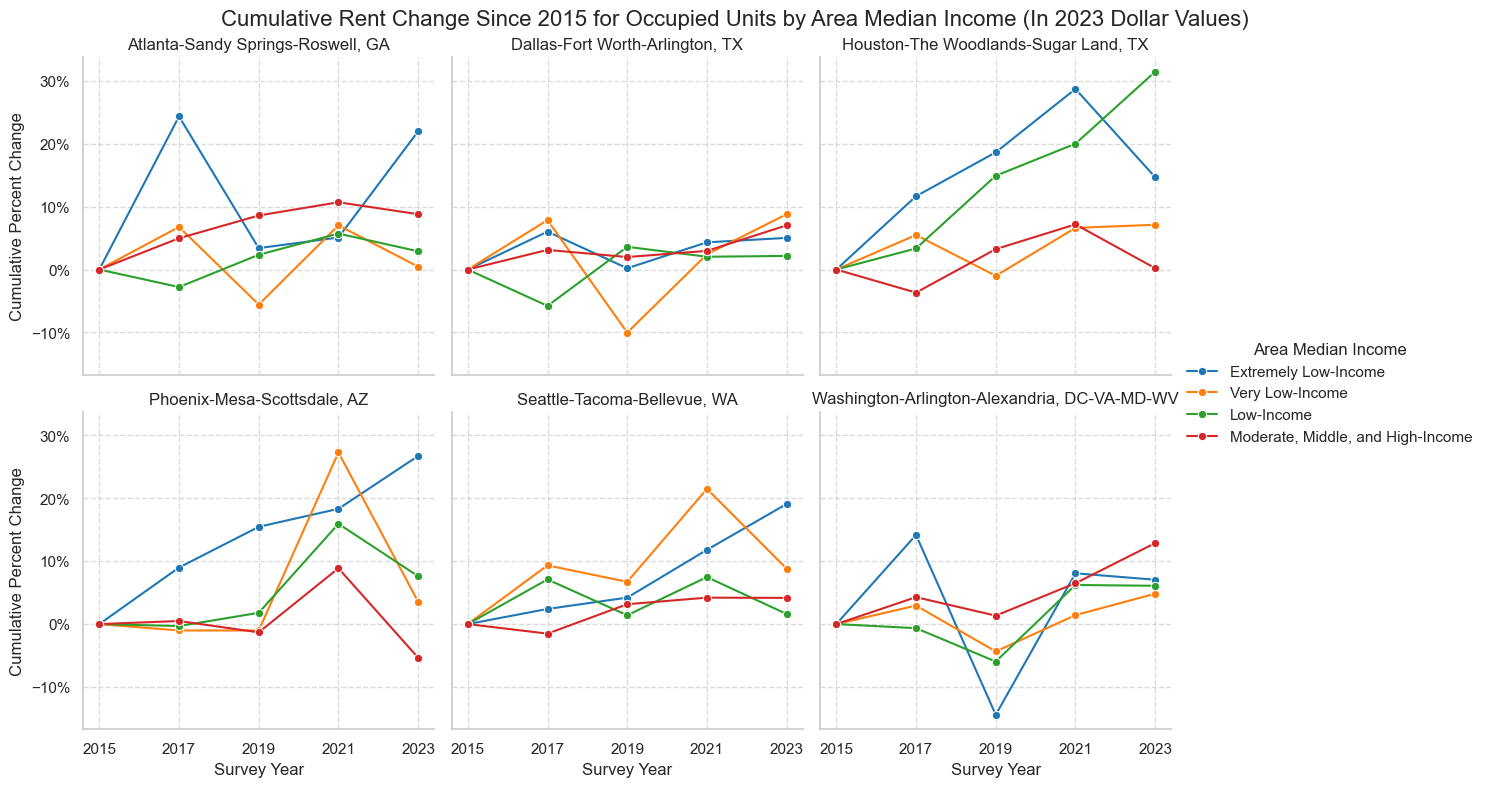

In [175]:
#Plot
sns.set(style="whitegrid")

g = sns.FacetGrid(
    weighted_avg_rent_infl_df,
    col='METRO',
    col_wrap=3,
    height=4,
    sharey=True,
    hue='AMI',
    palette='tab10'
)

g.map_dataframe(
    sns.lineplot,
    x='SRVYEAR',
    y='cumulative_rent_infl_change',
    marker='o'
)

#Legend and axis titles
g.add_legend(title="Area Median Income")
g.set_axis_labels("Survey Year", "Cumulative Percent Change")
g.set_titles("{col_name}")
g.set(xticks=[2015, 2017, 2019, 2021, 2023])

#Format y-axis as percentage
for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(PercentFormatter(1.0 if weighted_avg_rent_infl_df['cumulative_rent_infl_change'].max() < 1 else 100))
    
    #Dashed grid
    ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)

#Add overall title
g.fig.suptitle("Cumulative Rent Change Since 2015 for Occupied Units by Area Median Income (In 2023 Dollar Values)", fontsize=16)
plt.subplots_adjust(top=0.92, bottom=0.08)
#plt.tight_layout()

#Save and export image as png file
#g.savefig('/Volumes/LaCie/GCPI 2025 Visiting Fellowship/Policy Brief 1/Data/Analysis Visualizations/cumulative_rent_INFLN_ADJ_change_3.png', dpi=300, bbox_inches='tight')

plt.show()